In [2]:
import pandas as pd
import numpy as np
from numpy import percentile
from scipy import stats
from scipy.stats import skew
from scipy.special import boxcox1p
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
df  = pd.read_csv("CO2 Emissions_Canada.csv")

In [4]:
df

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...
7380,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,10.7,7.7,9.4,30,219
7381,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,11.2,8.3,9.9,29,232
7382,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,4,AS8,Z,11.7,8.6,10.3,27,240
7383,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4,AS8,Z,11.2,8.3,9.9,29,232


In [5]:
df.isnull().sum()

Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
dtype: int64

In [6]:
# collecting the information about the data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

In [7]:
df.shape

(7385, 12)

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Engine Size(L),7385.0,3.160068,1.354170,0.9,2.0,3.0,3.7,8.4
Cylinders,7385.0,5.615030,1.828307,3.0,4.0,6.0,6.0,16.0
Fuel Consumption City (L/100 km),7385.0,12.556534,3.500274,4.2,10.1,12.1,14.6,30.6
Fuel Consumption Hwy (L/100 km),7385.0,9.041706,2.224456,4.0,7.5,8.7,10.2,20.6
Fuel Consumption Comb (L/100 km),7385.0,10.975071,2.892506,4.1,8.9,10.6,12.6,26.1
Fuel Consumption Comb (mpg),7385.0,27.481652,7.231879,11.0,22.0,27.0,32.0,69.0
CO2 Emissions(g/km),7385.0,250.584699,58.512679,96.0,208.0,246.0,288.0,522.0


In [9]:
print("We have total",len(df['Make'].unique()),"Car Companies Data")
df_brand = df['Make'].value_counts().reset_index().rename(columns={'index':'Make','Make':'Make'})
df_brand.head(20)

We have total 42 Car Companies Data


,Make,count
0,FORD,628
1,CHEVROLET,588
2,BMW,527
3,MERCEDES-BENZ,419
4,PORSCHE,376
5,TOYOTA,330
6,GMC,328
7,AUDI,286
8,NISSAN,259
9,JEEP,251


In [10]:
import warnings
warnings.filterwarnings('ignore')

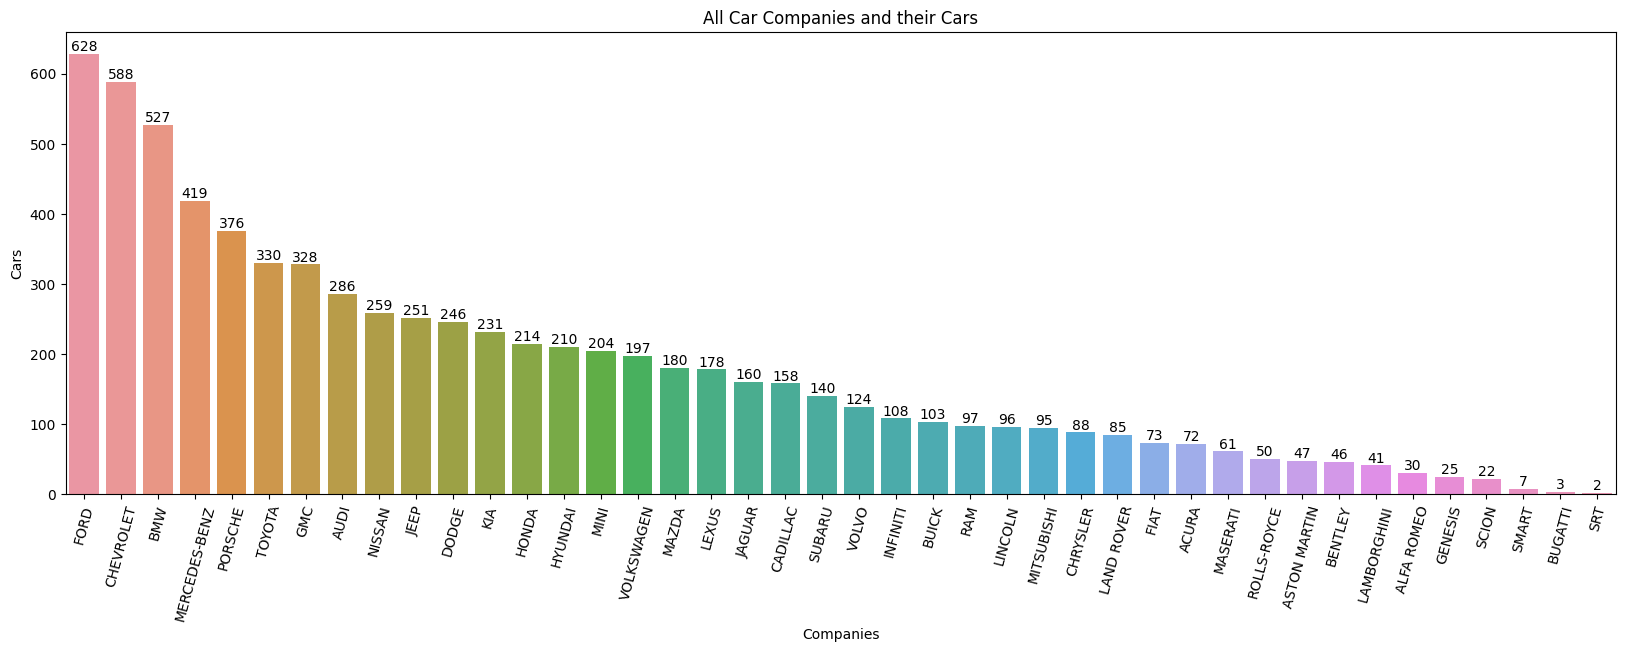

In [11]:
plt.figure(figsize=(20,6))
figure1 = sns.barplot(  x= "Make", y= "count", data = df_brand)
plt.xticks(rotation = 75)
plt.title("All Car Companies and their Cars")
plt.xlabel("Companies")
plt.ylabel("Cars")
plt.bar_label(figure1.containers[0])
plt.show()

In [12]:

print("We have total",len(df['Model'].unique()),"Car Models")
df_model = df['Model'].value_counts().reset_index().rename(columns={'index':'Model','Model':'Model'})[:25]
df_model.head(20)

We have total 2053 Car Models


,Model,count
0,F-150 FFV 4X4,32
1,F-150 FFV,32
2,MUSTANG,27
3,FOCUS FFV,24
4,SONIC,20
5,SONIC 5,20
6,F-150 4X4,20
7,F-150,20
8,ACCORD,19
9,COMPASS,19


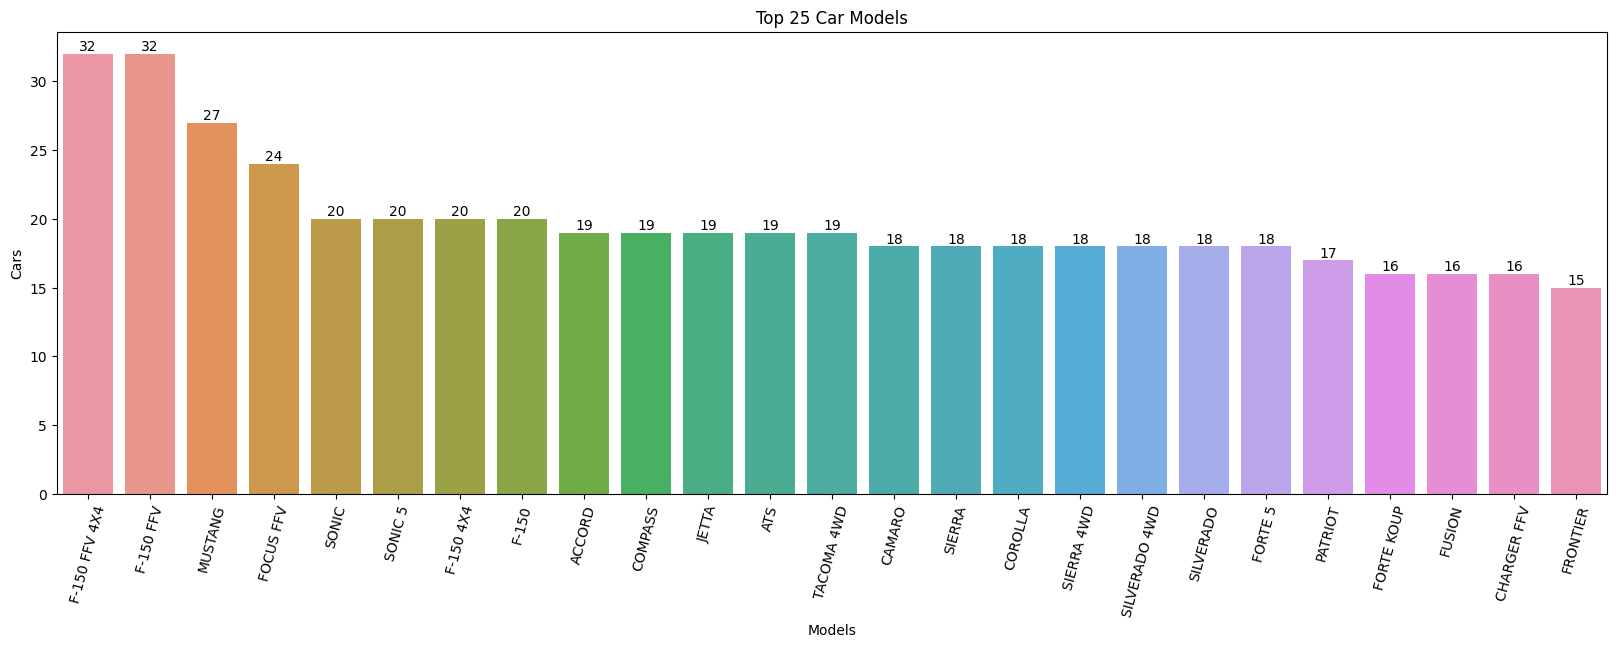

In [13]:
plt.figure(figsize=(20,6))
figure2 = sns.barplot(data = df_model, x = "Model",  y= "count")
plt.xticks(rotation = 75)
plt.title("Top 25 Car Models")
plt.xlabel("Models")
plt.ylabel("Cars")
plt.bar_label(figure2.containers[0])
plt.show()

In [14]:
print("We have total",len(df['Vehicle Class'].unique()),"Vehicle Class")
df_vehicle_class = df['Vehicle Class'].value_counts().reset_index().rename(columns={'index':'Vehicle Class','Vehicle Class':'Vehicle Class'})
df_vehicle_class

We have total 16 Vehicle Class


,Vehicle Class,count
0,SUV - SMALL,1217
1,MID-SIZE,1133
2,COMPACT,1022
3,SUV - STANDARD,735
4,FULL-SIZE,639
5,SUBCOMPACT,606
6,PICKUP TRUCK - STANDARD,538
7,TWO-SEATER,460
8,MINICOMPACT,326
9,STATION WAGON - SMALL,252


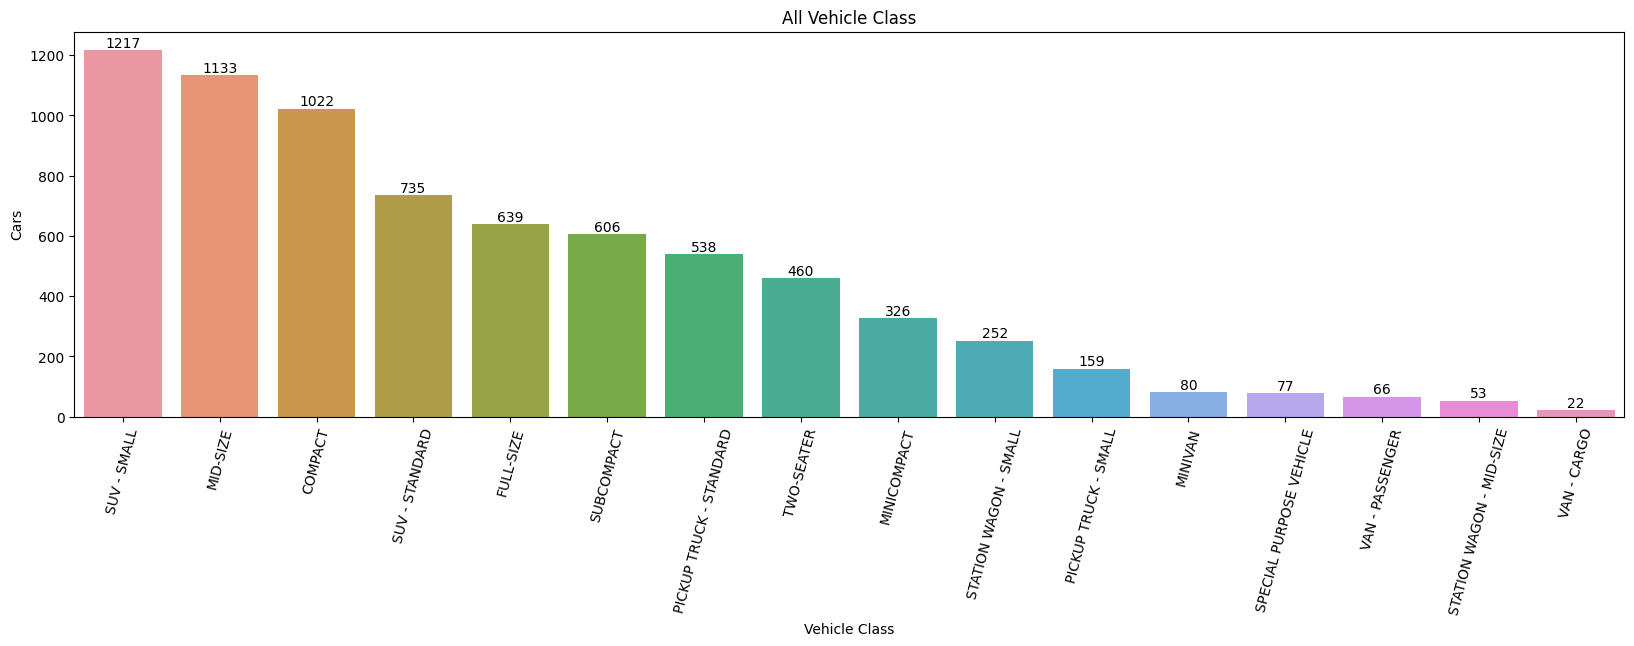

In [15]:
plt.figure(figsize=(20,5))
figure3 = sns.barplot(data = df_vehicle_class, x = "Vehicle Class",  y= "count")
plt.xticks(rotation = 75)
plt.title("All Vehicle Class")
plt.xlabel("Vehicle Class")
plt.ylabel("Cars")
plt.bar_label(figure3.containers[0])
plt.show()

In [16]:
print("We have total",len(df['Engine Size(L)'].unique()),"Types of Engine Size")
df_engine_size = df['Engine Size(L)'].value_counts().reset_index().rename(columns={'index':'Engine Size(L)','Engine Size(L)':'Engine Size(L)'})
df_engine_size.head(20)

We have total 51 Types of Engine Size


,Engine Size(L),count
0,2.0,1460
1,3.0,804
2,3.6,536
3,3.5,529
4,2.5,423
5,2.4,346
6,1.6,302
7,5.3,290
8,1.8,216
9,1.4,211


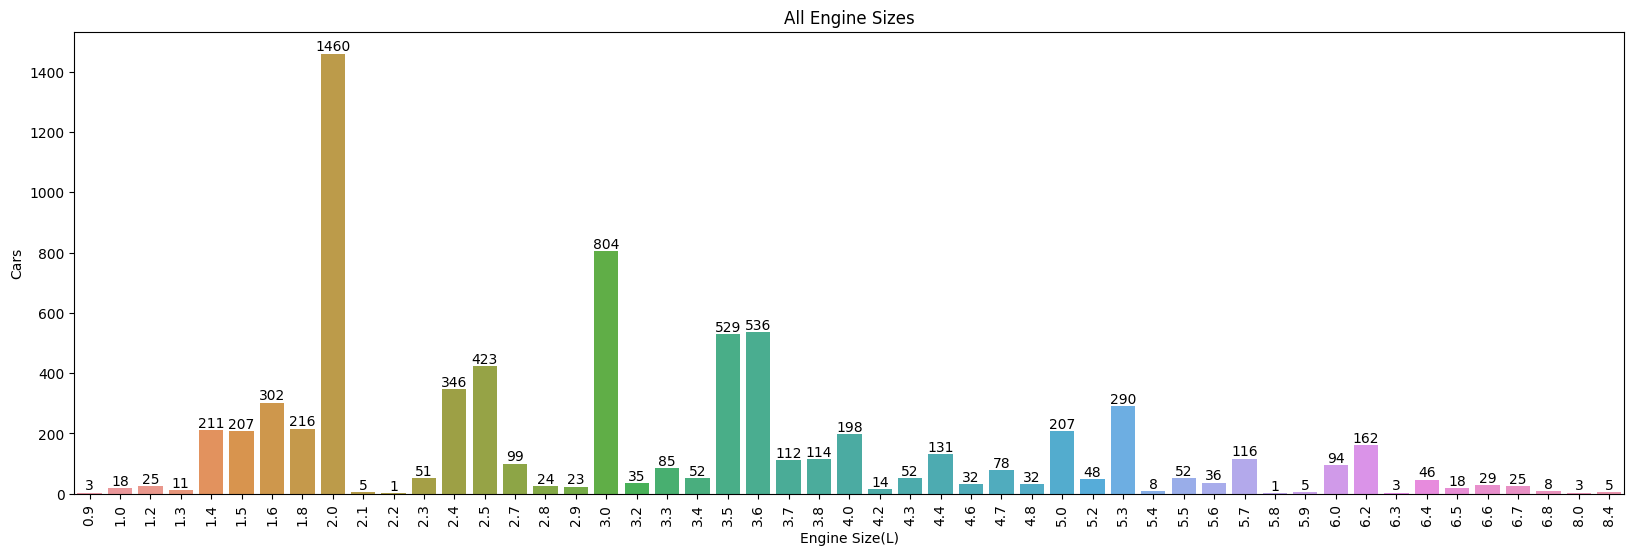

In [17]:
plt.figure(figsize=(20,6))
figure4 = sns.barplot(data = df_engine_size, x = "Engine Size(L)",  y= "count")
plt.xticks(rotation = 90)
plt.title("All Engine Sizes")
plt.xlabel("Engine Size(L)")
plt.ylabel("Cars")
plt.bar_label(figure4.containers[0])
plt.show()

In [18]:
print("We have total",len(df['Cylinders'].unique()),"Types of Cylinders")
df_cylinders = df['Cylinders'].value_counts().reset_index().rename(columns={'index':'Cylinders','Cylinders':'Cylinders'})
df_cylinders.head(20)

We have total 8 Types of Cylinders


,Cylinders,count
0,4,3220
1,6,2446
2,8,1402
3,12,151
4,3,95
5,10,42
6,5,26
7,16,3


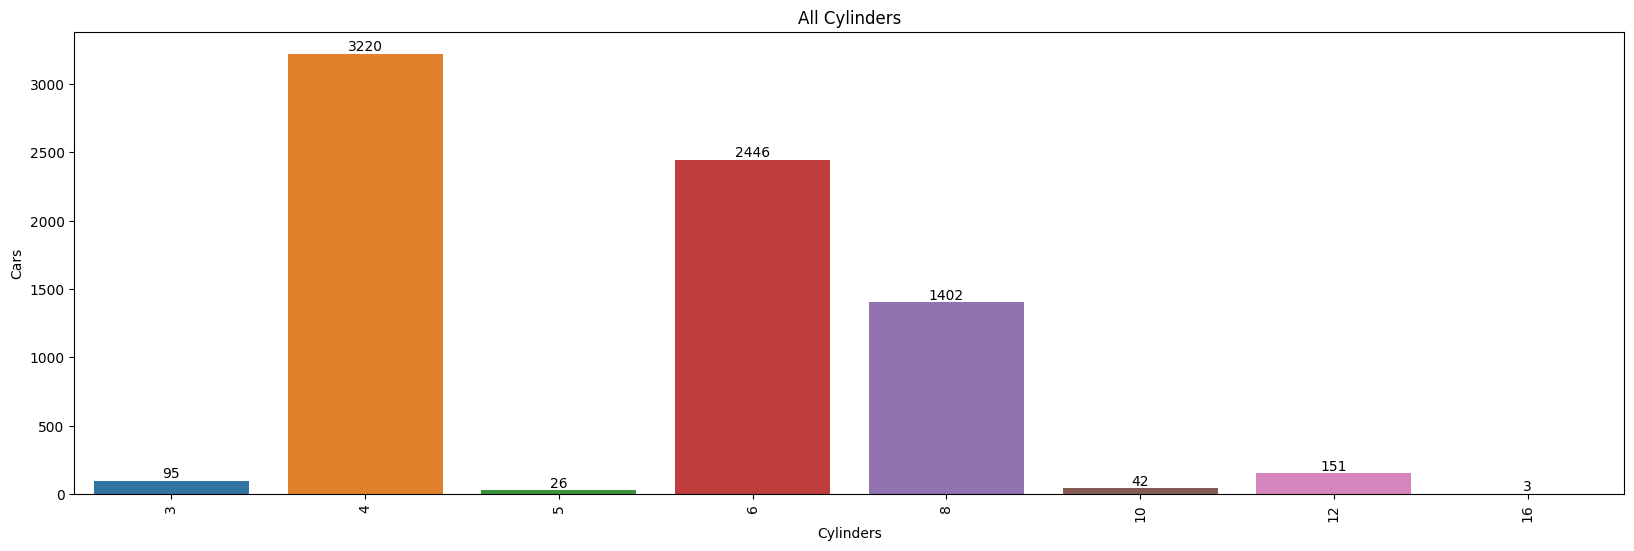

In [19]:
plt.figure(figsize=(20,6))
figure5 = sns.barplot(data = df_cylinders, x = "Cylinders",  y= "count")
plt.xticks(rotation = 90)
plt.title("All Cylinders")
plt.xlabel("Cylinders")
plt.ylabel("Cars")
plt.bar_label(figure5.containers[0])
plt.show()

In [20]:
df['Transmission'].unique()

array(['AS5', 'M6', 'AV7', 'AS6', 'AM6', 'A6', 'AM7', 'AV8', 'AS8', 'A7',
       'A8', 'M7', 'A4', 'M5', 'AV', 'A5', 'AS7', 'A9', 'AS9', 'AV6',
       'AS4', 'AM5', 'AM8', 'AM9', 'AS10', 'A10', 'AV10'], dtype=object)

In [21]:
df["Transmission"] = np.where(df["Transmission"].isin(["A4", "A5", "A6", "A7", "A8", "A9", "A10"]), "Automatic", df["Transmission"])
df["Transmission"] = np.where(df["Transmission"].isin(["AM5", "AM6", "AM7", "AM8", "AM9"]), "Automated Manual", df["Transmission"])
df["Transmission"] = np.where(df["Transmission"].isin(["AS4", "AS5", "AS6", "AS7", "AS8", "AS9", "AS10"]), "Automatic with Select Shift", df["Transmission"])
df["Transmission"] = np.where(df["Transmission"].isin(["AV", "AV6", "AV7", "AV8", "AV10"]), "Continuously Variable", df["Transmission"])
df["Transmission"] = np.where(df["Transmission"].isin(["M5", "M6", "M7"]), "Manual", df["Transmission"])

In [22]:
print("We have total",len(df['Transmission'].unique()),"Transmissions")
df_transmission = df['Transmission'].value_counts().reset_index().rename(columns={'index':'Transmission','Transmission':'Transmission'})
df_transmission

We have total 5 Transmissions


,Transmission,count
0,Automatic with Select Shift,3127
1,Automatic,1851
2,Manual,1185
3,Automated Manual,646
4,Continuously Variable,576


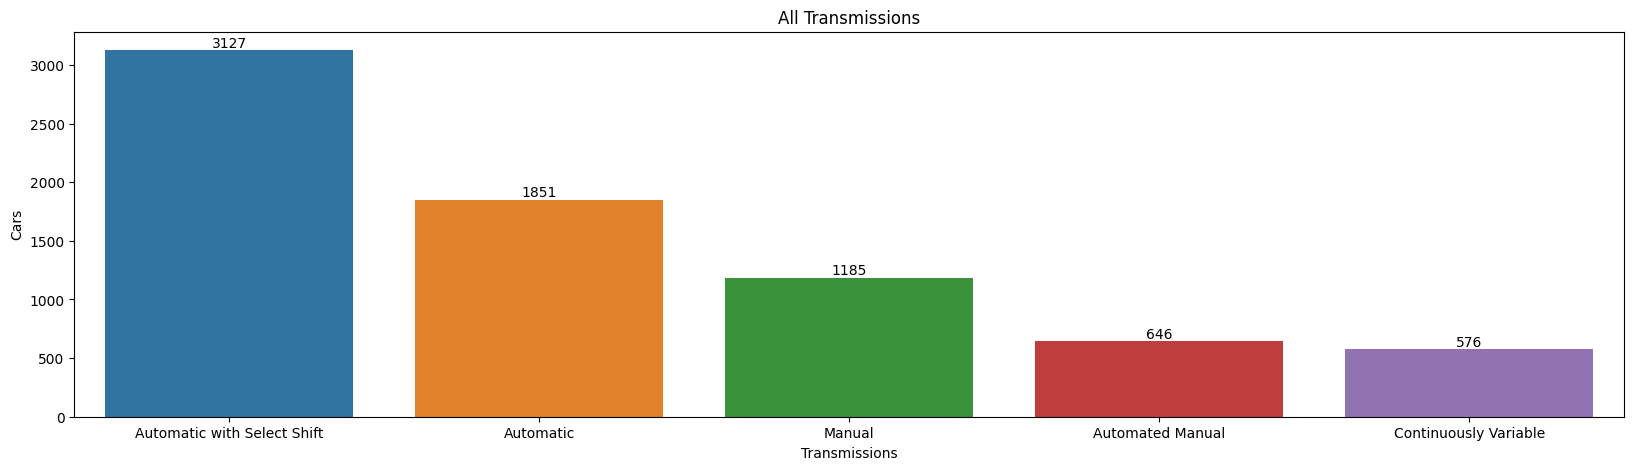

In [23]:
plt.figure(figsize=(20,5))
figure6 = sns.barplot(data = df_transmission, x = "Transmission",  y= "count")
plt.title("All Transmissions")
plt.xlabel("Transmissions")
plt.ylabel("Cars")
plt.bar_label(figure6.containers[0])
plt.show()

In [24]:
df['Fuel Type'].unique()

array(['Z', 'D', 'X', 'E', 'N'], dtype=object)

In [25]:
df["Fuel Type"] = np.where(df["Fuel Type"]=="Z", "Premium Gasoline", df["Fuel Type"])
df["Fuel Type"] = np.where(df["Fuel Type"]=="X", "Regular Gasoline", df["Fuel Type"])
df["Fuel Type"] = np.where(df["Fuel Type"]=="D", "Diesel", df["Fuel Type"])
df["Fuel Type"] = np.where(df["Fuel Type"]=="E", "Ethanol(E85)", df["Fuel Type"])
df["Fuel Type"] = np.where(df["Fuel Type"]=="N", "Natural Gas", df["Fuel Type"])

In [26]:
print("We have total",len(df['Fuel Type'].unique()),"Fuel Types")
df_fuel_type = df['Fuel Type'].value_counts().reset_index().rename(columns={'index':'Fuel Type','Fuel Type':'Fuel Type'})
df_fuel_type

We have total 5 Fuel Types


,Fuel Type,count
0,Regular Gasoline,3637
1,Premium Gasoline,3202
2,Ethanol(E85),370
3,Diesel,175
4,Natural Gas,1


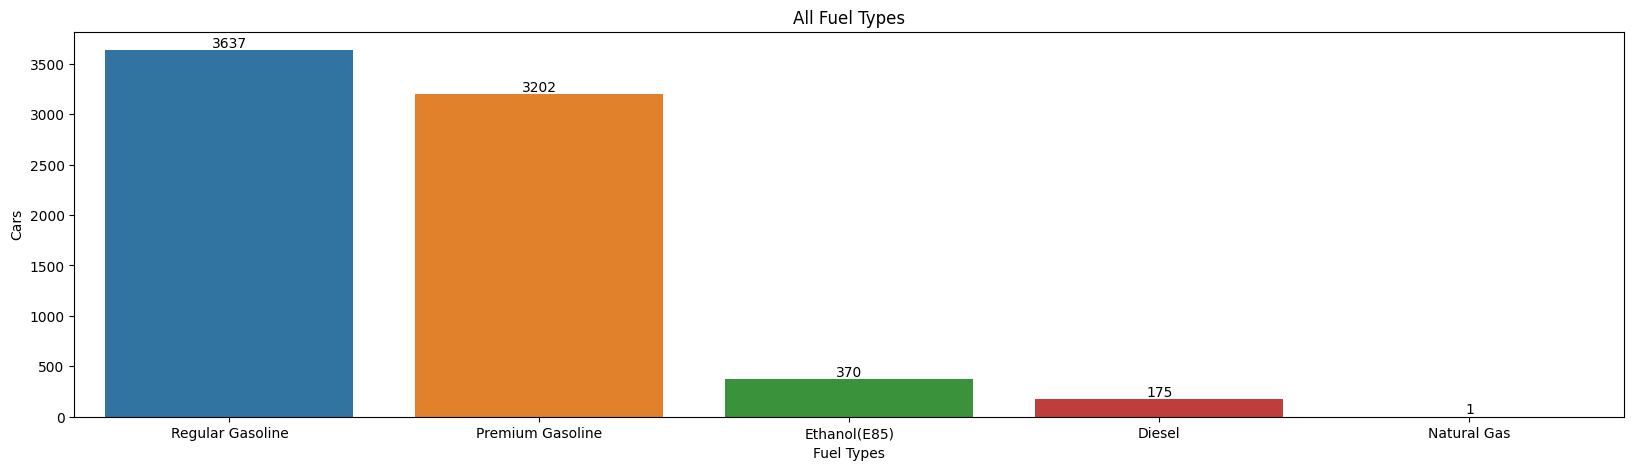

In [27]:
plt.figure(figsize=(20,5))
figure7 = sns.barplot(data = df_fuel_type, x = "Fuel Type",  y= "count")
plt.title("All Fuel Types")
plt.xlabel("Fuel Types")
plt.ylabel("Cars")
plt.bar_label(figure7.containers[0])
plt.show()

In [28]:
df_co2_make = df.groupby(['Make'])['CO2 Emissions(g/km)'].mean().sort_values().reset_index()

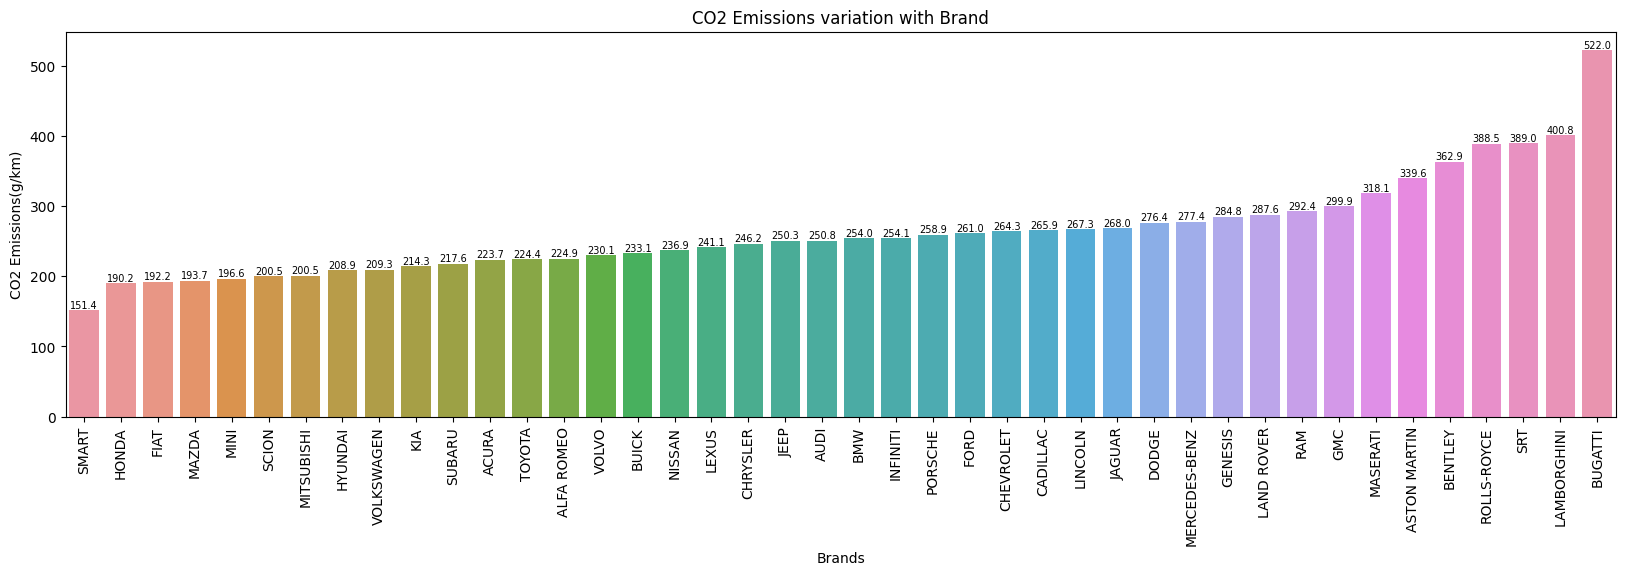

In [29]:
plt.figure(figsize=(20,5))
figure8 = sns.barplot(data = df_co2_make, x = "Make",  y= "CO2 Emissions(g/km)")
plt.xticks(rotation = 90)
plt.title("CO2 Emissions variation with Brand")
plt.xlabel("Brands")
plt.ylabel("CO2 Emissions(g/km)")
plt.bar_label(figure8.containers[0], fontsize=7, fmt='%.1f')
plt.show()

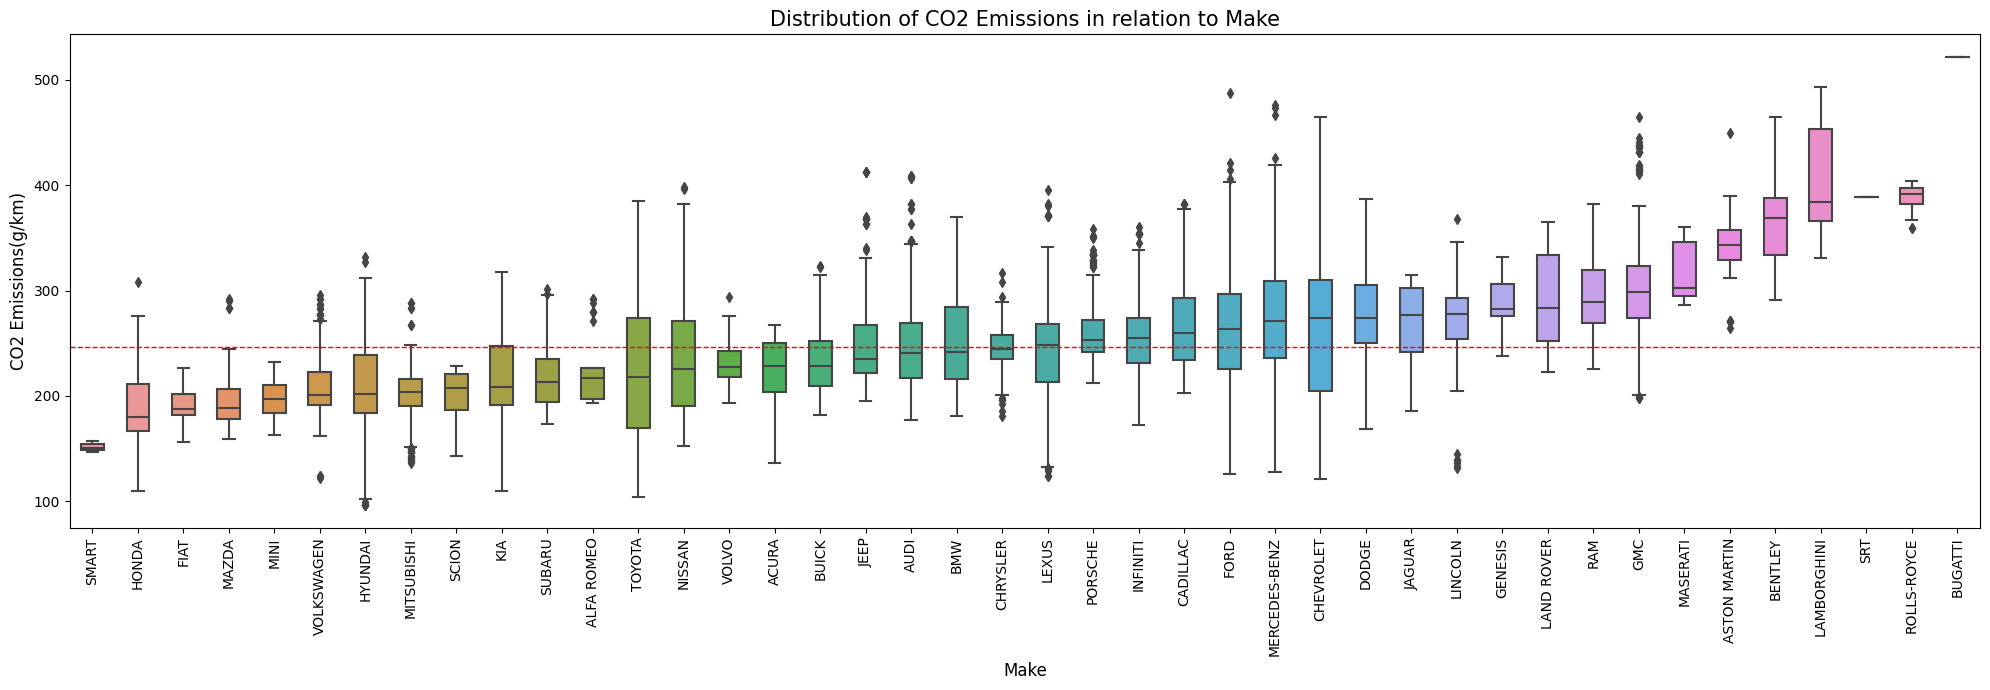

In [30]:
plt.figure(figsize=(20,7))
order = df.groupby("Make")["CO2 Emissions(g/km)"].median().sort_values(ascending=True).index
sns.boxplot(x="Make", y="CO2 Emissions(g/km)", data=df, order=order, width=0.5)
plt.title("Distribution of CO2 Emissions in relation to Make", fontsize=15)
plt.xticks(rotation=90, horizontalalignment='center')
plt.xlabel("Make", fontsize=12)
plt.ylabel("CO2 Emissions(g/km)", fontsize=12)
plt.axhline(df["CO2 Emissions(g/km)"].median(),color='r',linestyle='dashed',linewidth=1)
plt.tight_layout()
plt.show()

In [31]:
df_co2_vehicle_class = df.groupby(['Vehicle Class'])['CO2 Emissions(g/km)'].mean().sort_values().reset_index()

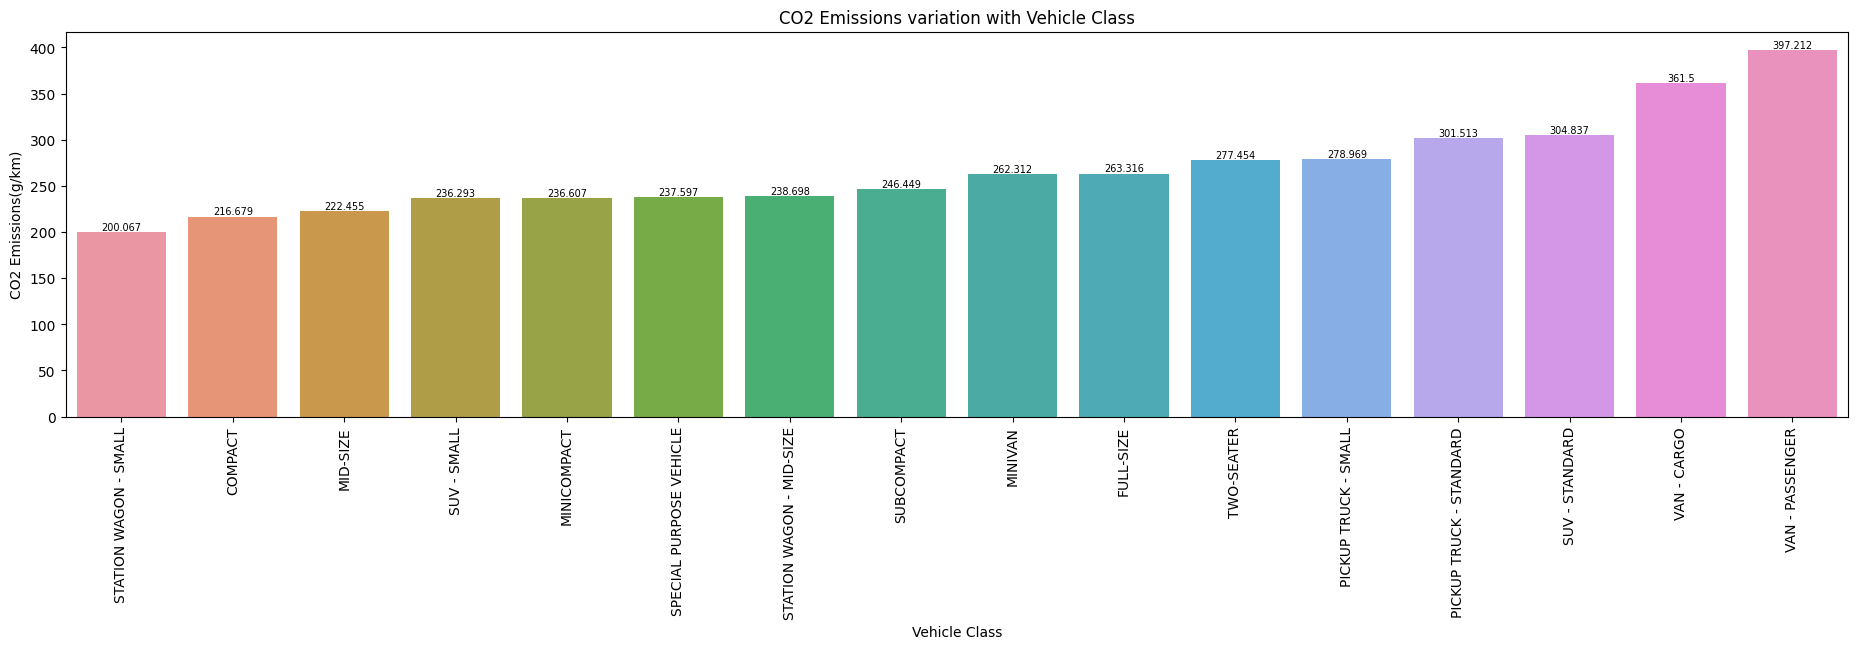

In [32]:
plt.figure(figsize=(23,5))
figure9 = sns.barplot(data = df_co2_vehicle_class, x = "Vehicle Class",  y= "CO2 Emissions(g/km)")
plt.xticks(rotation = 90)
plt.title("CO2 Emissions variation with Vehicle Class")
plt.xlabel("Vehicle Class")
plt.ylabel("CO2 Emissions(g/km)")
plt.bar_label(figure9.containers[0], fontsize=7)
plt.show()

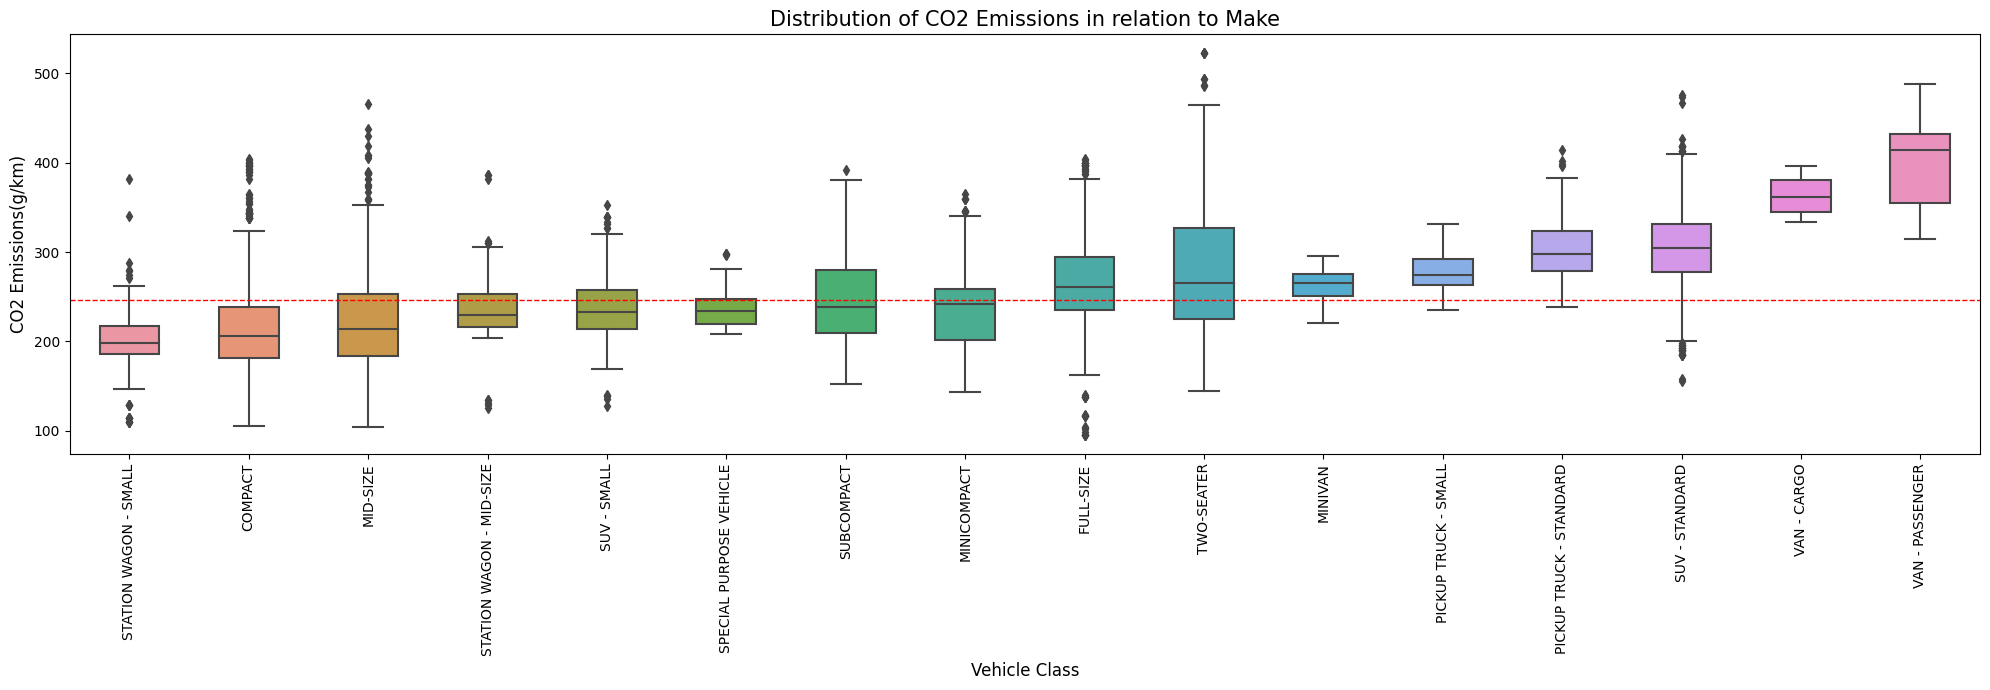

In [33]:
plt.figure(figsize=(20,7))
order = df.groupby("Vehicle Class")["CO2 Emissions(g/km)"].median().sort_values(ascending=True).index
sns.boxplot(x="Vehicle Class", y="CO2 Emissions(g/km)", data=df, order=order, width=0.5)
plt.title("Distribution of CO2 Emissions in relation to Make", fontsize=15)
plt.xticks(rotation=90, horizontalalignment='center')
plt.xlabel("Vehicle Class", fontsize=12)
plt.ylabel("CO2 Emissions(g/km)", fontsize=12)
plt.axhline(df["CO2 Emissions(g/km)"].median(),color='r',linestyle='dashed',linewidth=1)
plt.tight_layout()
plt.show()

In [34]:
df_co2_transmission = df.groupby(['Transmission'])['CO2 Emissions(g/km)'].mean().sort_values().reset_index()

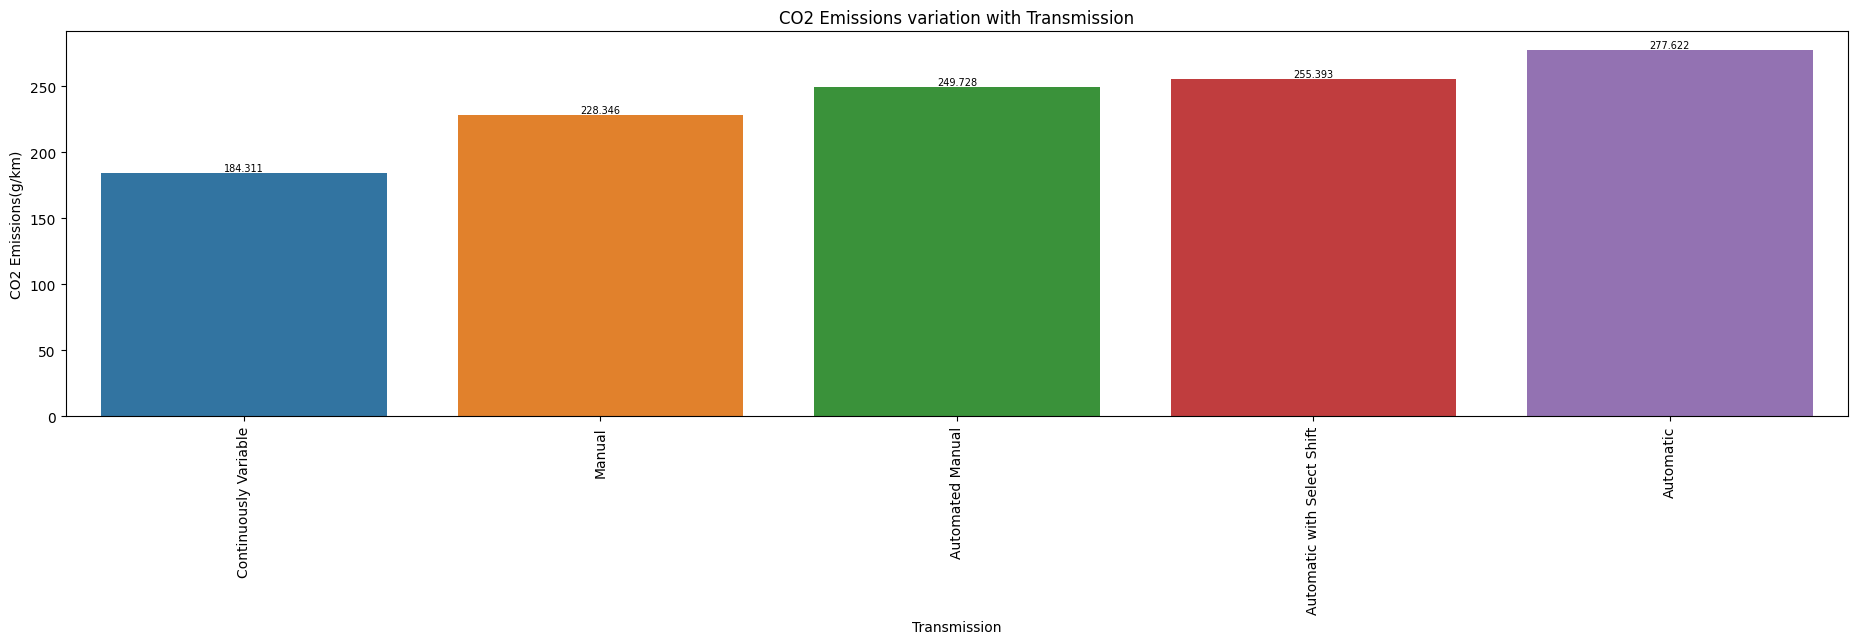

In [35]:
plt.figure(figsize=(23,5))
figure10 = sns.barplot(data = df_co2_transmission, x = "Transmission",  y= "CO2 Emissions(g/km)")
plt.xticks(rotation = 90)
plt.title("CO2 Emissions variation with Transmission")
plt.xlabel("Transmission")
plt.ylabel("CO2 Emissions(g/km)")
plt.bar_label(figure10.containers[0], fontsize=7)
plt.show()

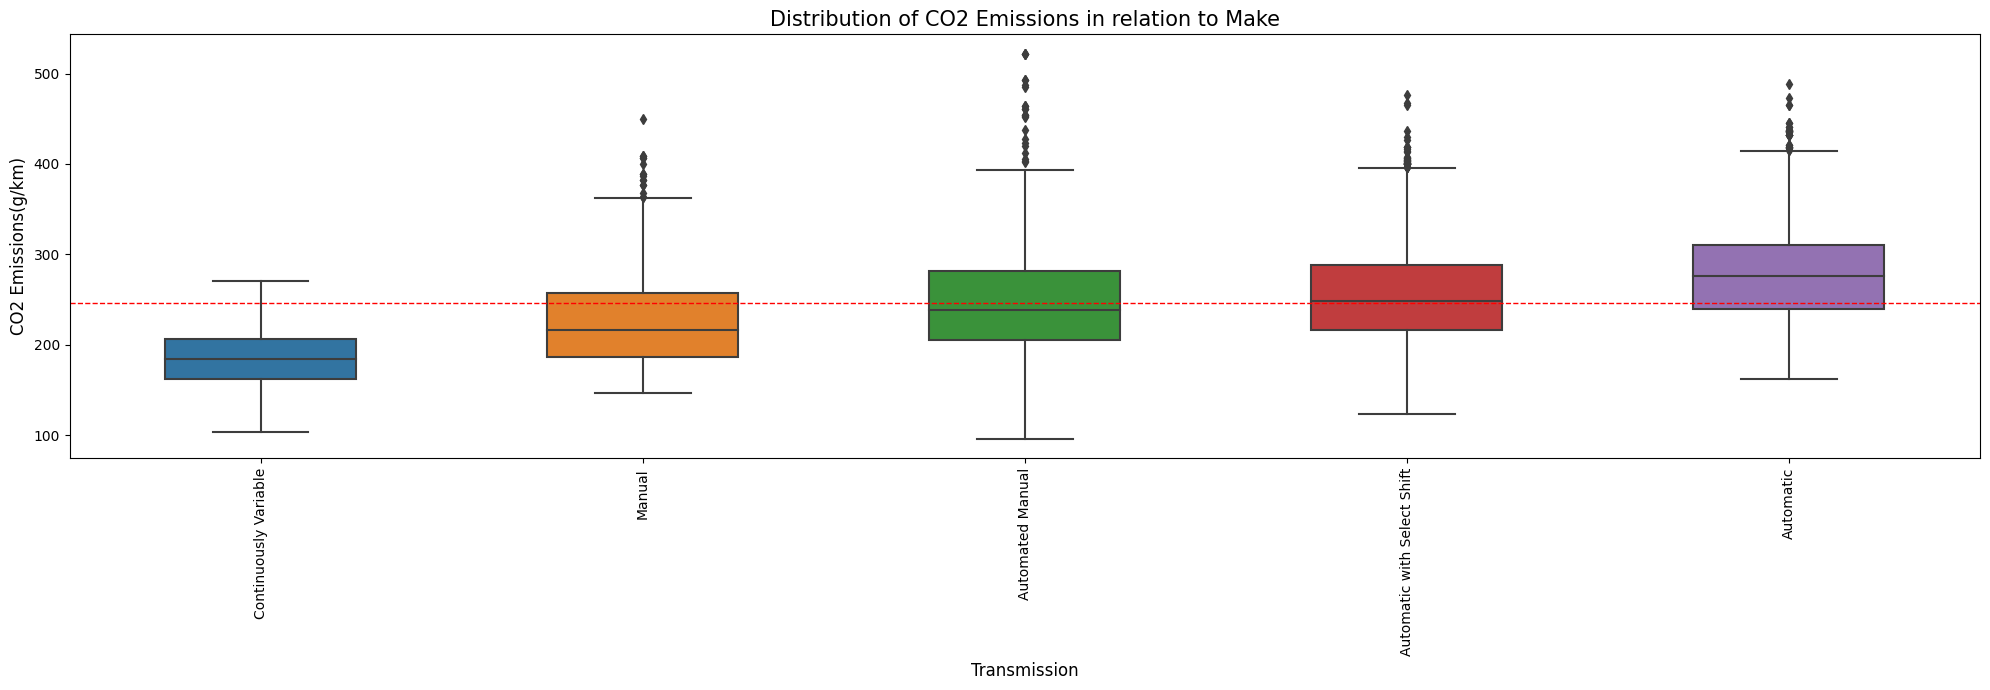

In [36]:
plt.figure(figsize=(20,7))
order = df.groupby("Transmission")["CO2 Emissions(g/km)"].median().sort_values(ascending=True).index
sns.boxplot(x="Transmission", y="CO2 Emissions(g/km)", data=df, order=order, width=0.5)
plt.title("Distribution of CO2 Emissions in relation to Make", fontsize=15)
plt.xticks(rotation=90, horizontalalignment='center')
plt.xlabel("Transmission", fontsize=12)
plt.ylabel("CO2 Emissions(g/km)", fontsize=12)
plt.axhline(df["CO2 Emissions(g/km)"].median(),color='r',linestyle='dashed',linewidth=1)
plt.tight_layout()
plt.show()

In [37]:
df_co2_fuel_type = df.groupby(['Fuel Type'])['CO2 Emissions(g/km)'].mean().sort_values().reset_index()

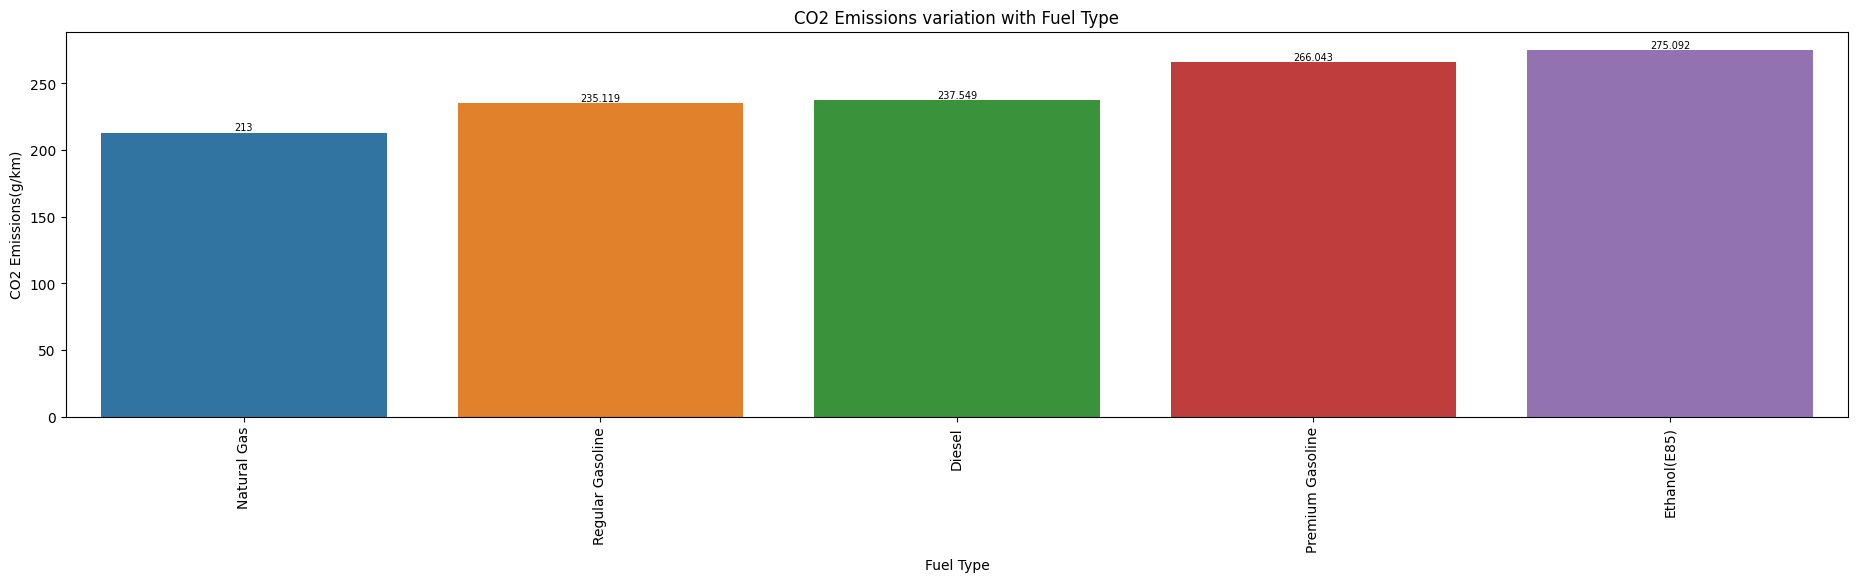

In [38]:
plt.figure(figsize=(23,5))
figure11 = sns.barplot(data = df_co2_fuel_type, x = "Fuel Type",  y= "CO2 Emissions(g/km)")
plt.xticks(rotation = 90)
plt.title("CO2 Emissions variation with Fuel Type")
plt.xlabel("Fuel Type")
plt.ylabel("CO2 Emissions(g/km)")
plt.bar_label(figure11.containers[0], fontsize=7)
plt.show()

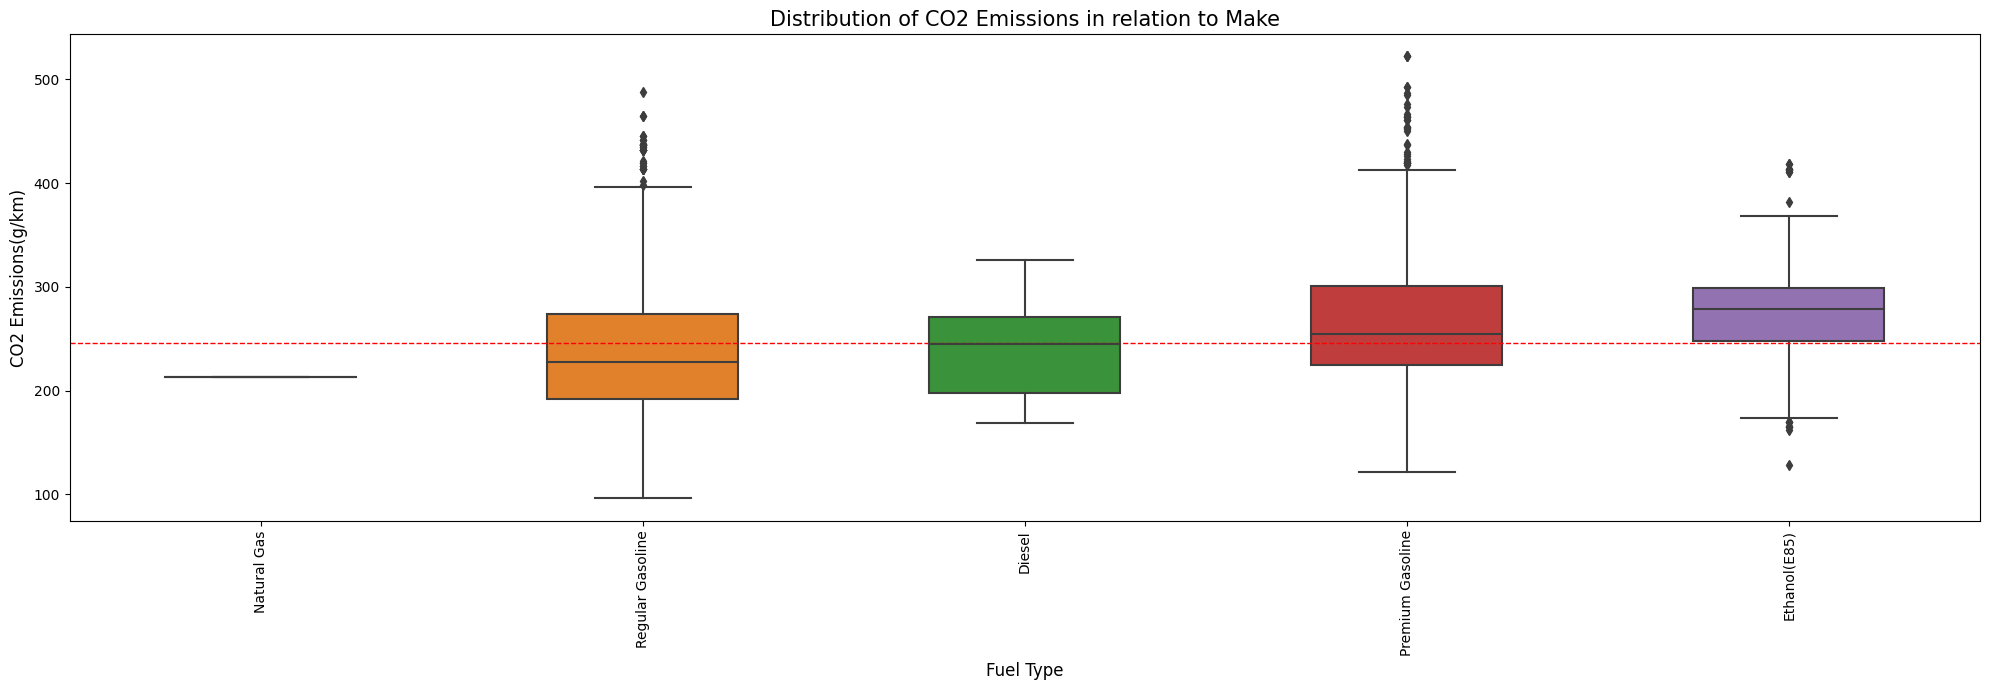

In [39]:
plt.figure(figsize=(20,7))
order = df.groupby("Fuel Type")["CO2 Emissions(g/km)"].median().sort_values(ascending=True).index
sns.boxplot(x="Fuel Type", y="CO2 Emissions(g/km)", data=df, order=order, width=0.5)
plt.title("Distribution of CO2 Emissions in relation to Make", fontsize=15)
plt.xticks(rotation=90, horizontalalignment='center')
plt.xlabel("Fuel Type", fontsize=12)
plt.ylabel("CO2 Emissions(g/km)", fontsize=12)
plt.axhline(df["CO2 Emissions(g/km)"].median(),color='r',linestyle='dashed',linewidth=1)
plt.tight_layout()
plt.show()

Text(0, 0.5, 'CO2 Emissions(g/km)')

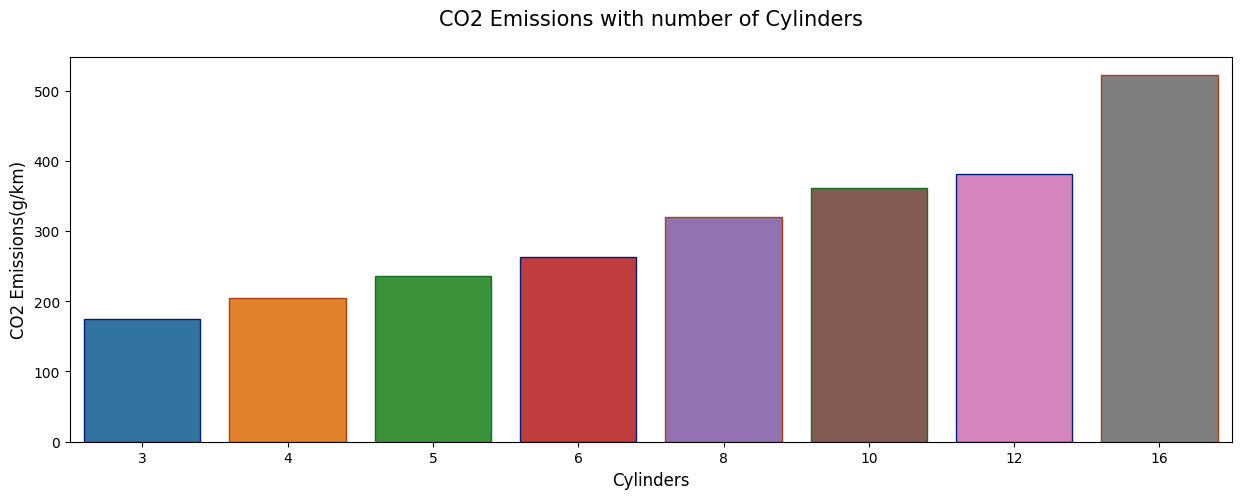

In [40]:
CO2_cylinder = df.groupby(['Cylinders'])['CO2 Emissions(g/km)'].mean().reset_index()

plt.figure(figsize=(15,5))
sns.barplot(x = "Cylinders",y="CO2 Emissions(g/km)",data = CO2_cylinder,
            edgecolor=sns.color_palette("dark", 3))
plt.title('CO2 Emissions with number of Cylinders\n', fontsize=15)
plt.xlabel('Cylinders', fontsize=12)
plt.ylabel('CO2 Emissions(g/km)', fontsize=12)

Text(0, 0.5, 'Fuel Consumption Comb (L/100 km)')

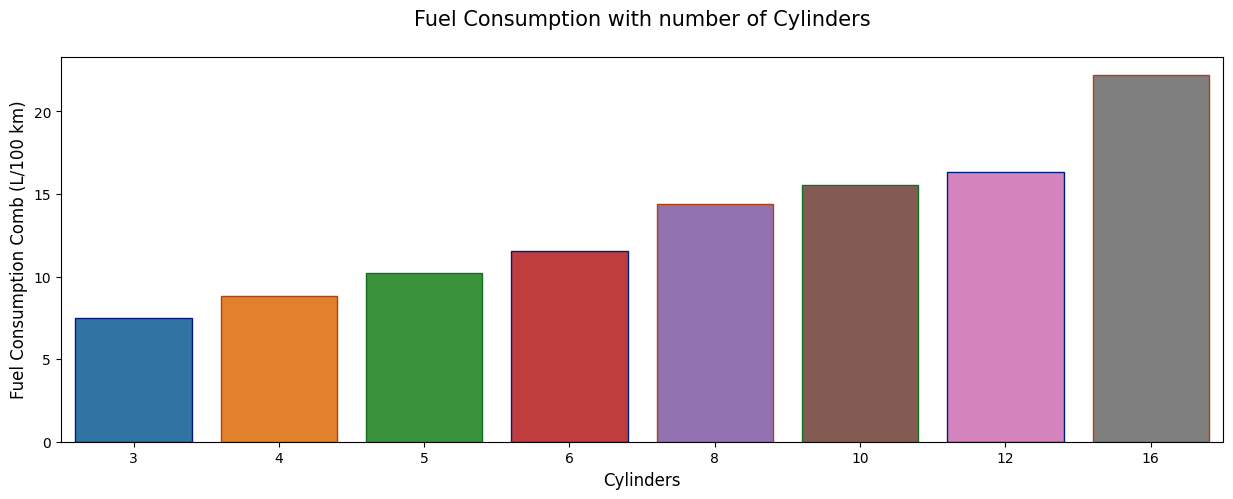

In [41]:
fuel_cylinder = df.groupby(['Cylinders'])['Fuel Consumption Comb (L/100 km)'].mean().reset_index()

plt.figure(figsize=(15,5))
sns.barplot(x = "Cylinders",y="Fuel Consumption Comb (L/100 km)",data = fuel_cylinder,
            edgecolor=sns.color_palette("dark", 3))
plt.title('Fuel Consumption with number of Cylinders\n', fontsize=15)
plt.xlabel('Cylinders', fontsize=12)
plt.ylabel('Fuel Consumption Comb (L/100 km)', fontsize=12)

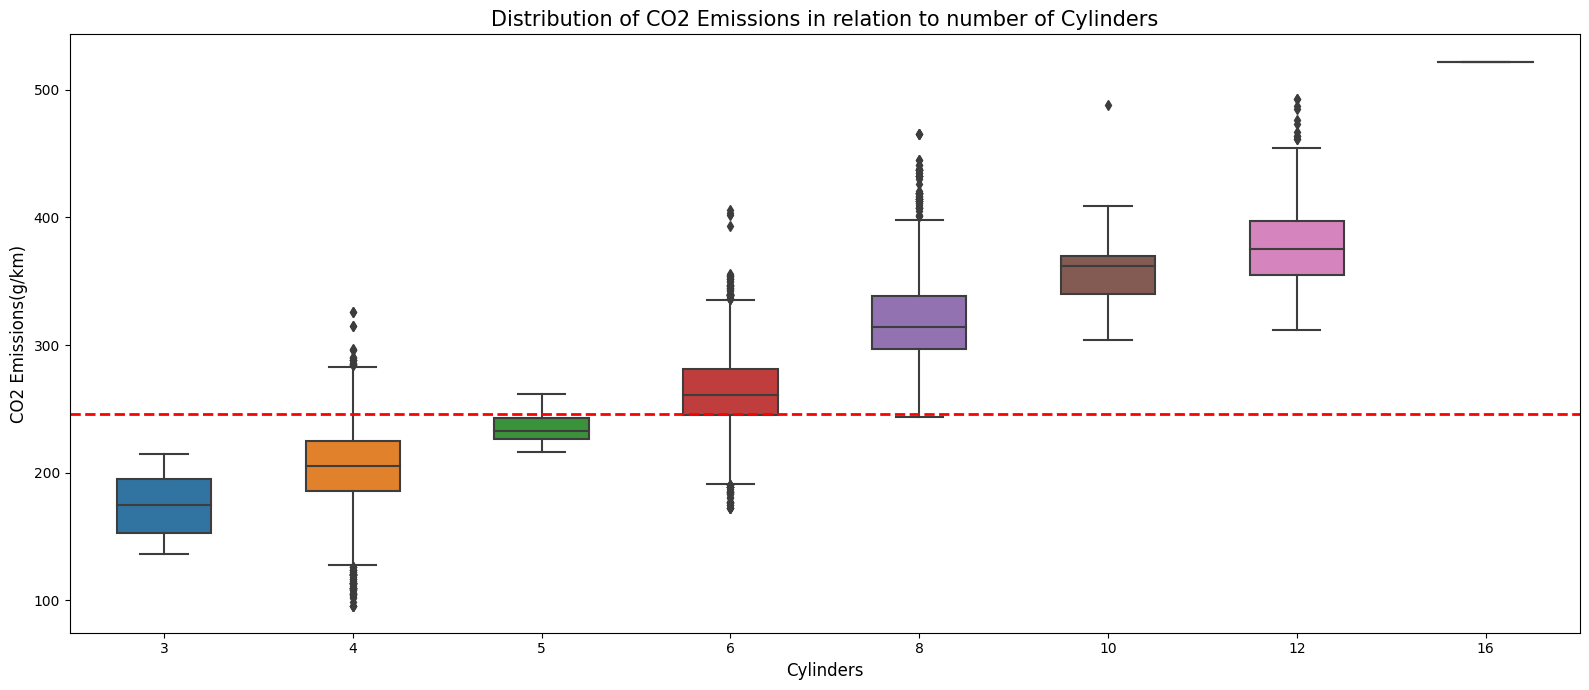

In [42]:
plt.figure(figsize=(16,7))
order = df.groupby("Cylinders")["CO2 Emissions(g/km)"].median().sort_values(ascending=True).index
sns.boxplot(x="Cylinders", y="CO2 Emissions(g/km)", data=df, order=order, width=0.5)
plt.title("Distribution of CO2 Emissions in relation to number of Cylinders", fontsize=15)
plt.xlabel("Cylinders", fontsize=12)
plt.ylabel("CO2 Emissions(g/km)", fontsize=12)
plt.axhline(df["CO2 Emissions(g/km)"].median(),color='r',linestyle='dashed',linewidth=2)
plt.tight_layout()
plt.show()

Text(0, 0.5, 'CO2 Emissions(g/km)')

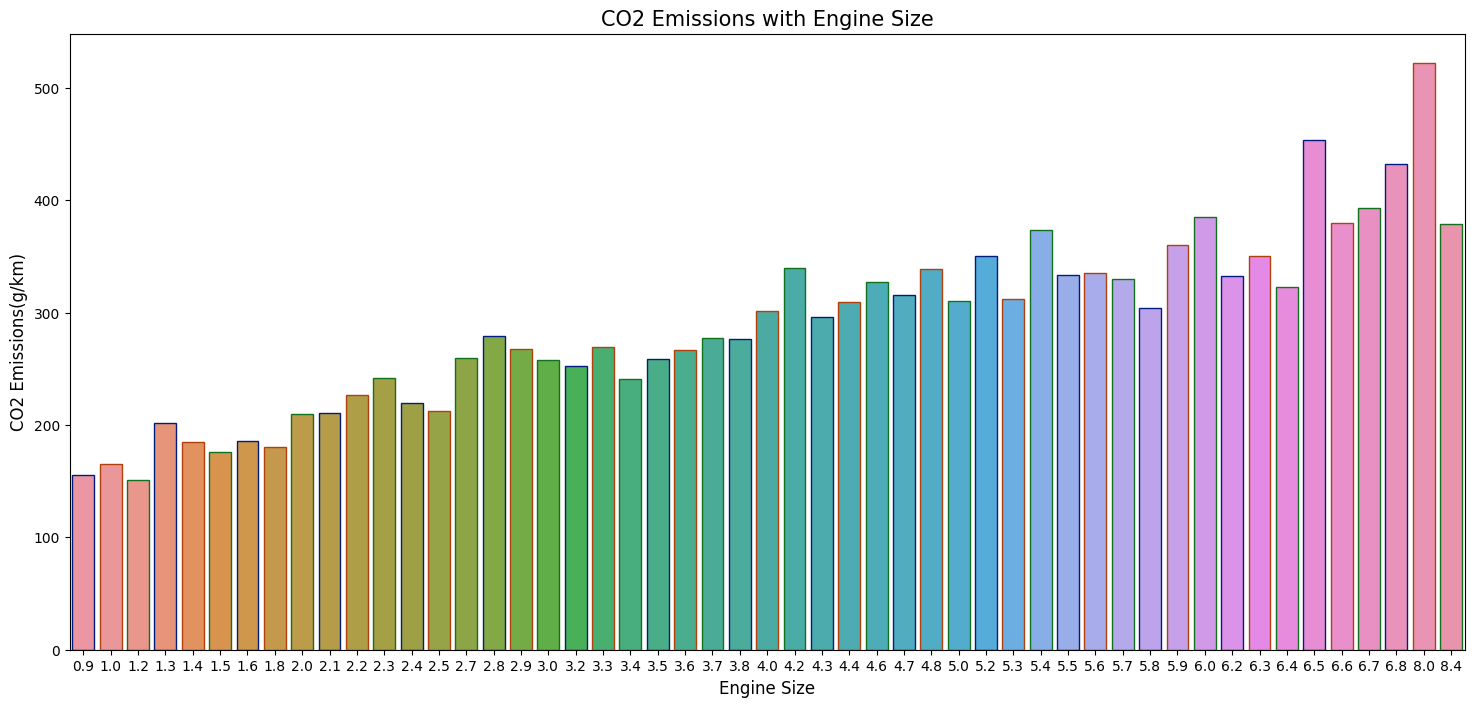

In [43]:
CO2_engine = df.groupby(['Engine Size(L)'])['CO2 Emissions(g/km)'].mean().reset_index()

plt.figure(figsize=(18,8))
sns.barplot(x = "Engine Size(L)",y="CO2 Emissions(g/km)",data = CO2_engine,
            edgecolor=sns.color_palette("dark", 3))
plt.title('CO2 Emissions with Engine Size', fontsize=15)
plt.xlabel('Engine Size', fontsize=12)
plt.ylabel('CO2 Emissions(g/km)', fontsize=12)

Text(0, 0.5, 'Fuel Consumption Comb (L/100 km)')

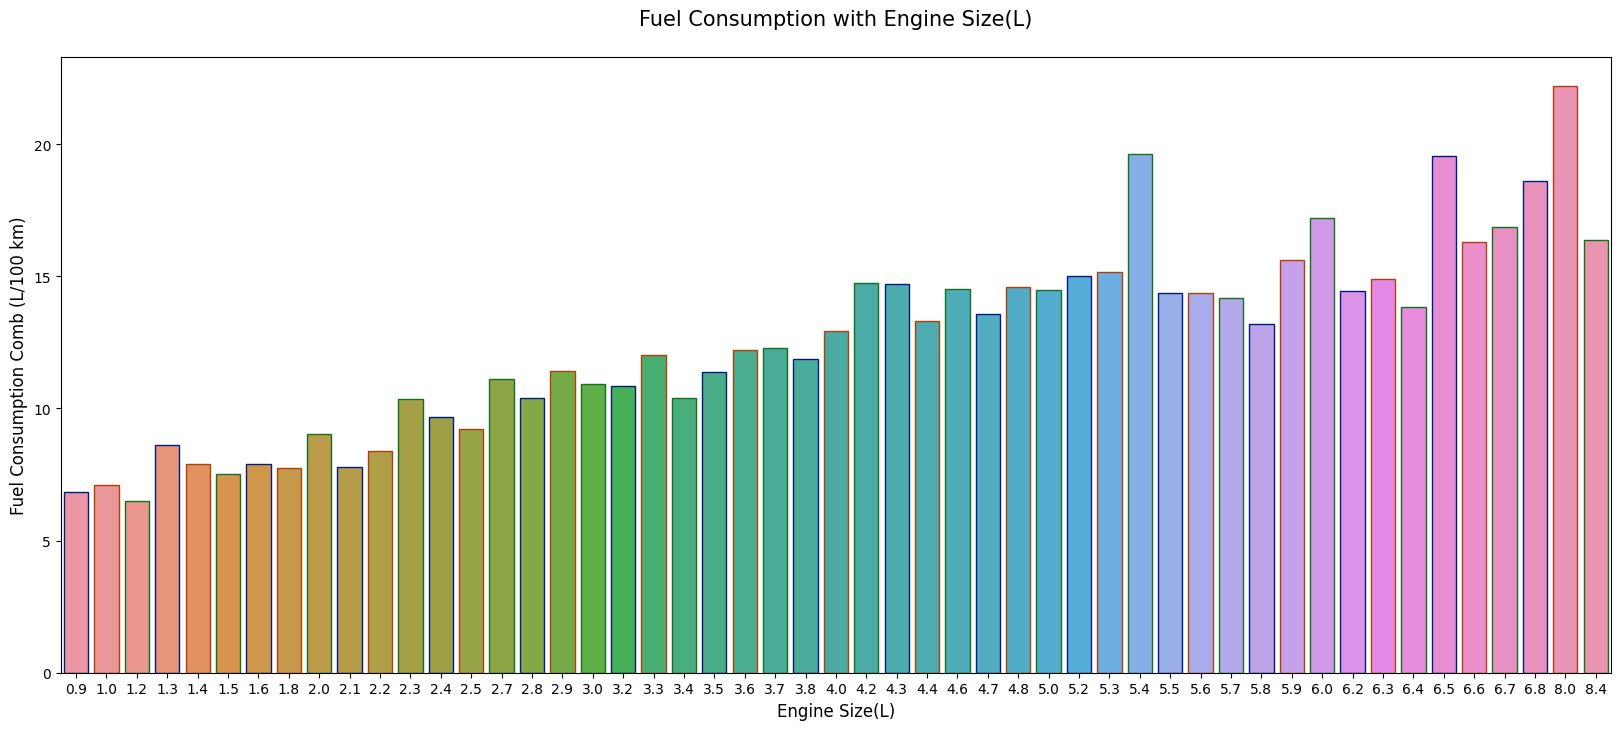

In [44]:
fuel_engine = df.groupby(['Engine Size(L)'])['Fuel Consumption Comb (L/100 km)'].mean().reset_index()

plt.figure(figsize=(20,8))
sns.barplot(x = "Engine Size(L)",y="Fuel Consumption Comb (L/100 km)",data = fuel_engine,
            edgecolor=sns.color_palette("dark", 3))
plt.title('Fuel Consumption with Engine Size(L)\n', fontsize=15)
plt.xlabel('Engine Size(L)', fontsize=12)
plt.ylabel('Fuel Consumption Comb (L/100 km)', fontsize=12)

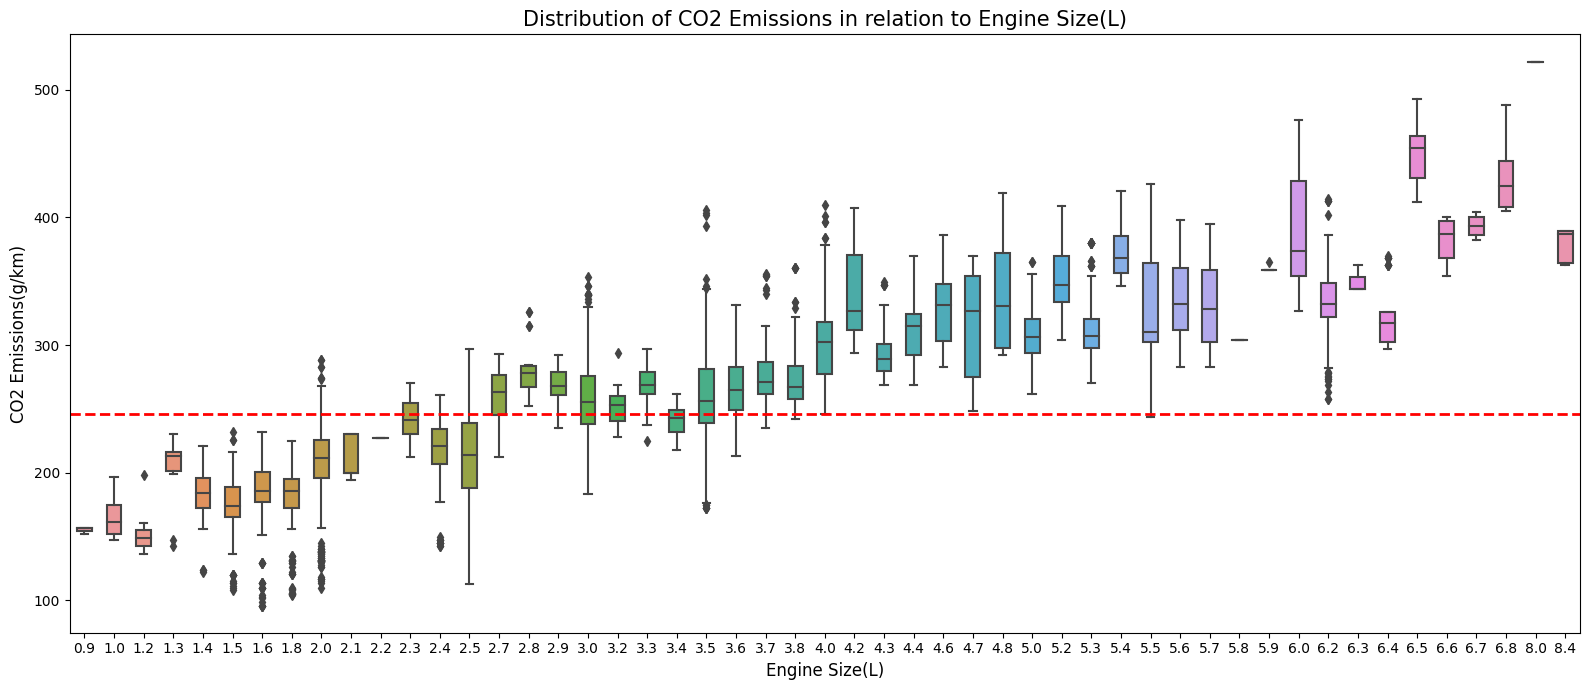

In [45]:
plt.figure(figsize=(16,7))
order = df.groupby("Engine Size(L)")["CO2 Emissions(g/km)"].median().index
sns.boxplot(x="Engine Size(L)", y="CO2 Emissions(g/km)", data=df, order=order, width=0.5)
plt.title("Distribution of CO2 Emissions in relation to Engine Size(L)", fontsize = 15)
plt.xlabel("Engine Size(L)", fontsize = 12)
plt.ylabel("CO2 Emissions(g/km)", fontsize=12)
plt.axhline(df["CO2 Emissions(g/km)"].median(),color='r',linestyle='dashed',linewidth=2)
plt.tight_layout()
plt.show()

Text(0, 0.5, 'CO2 Emissions(g/km)')

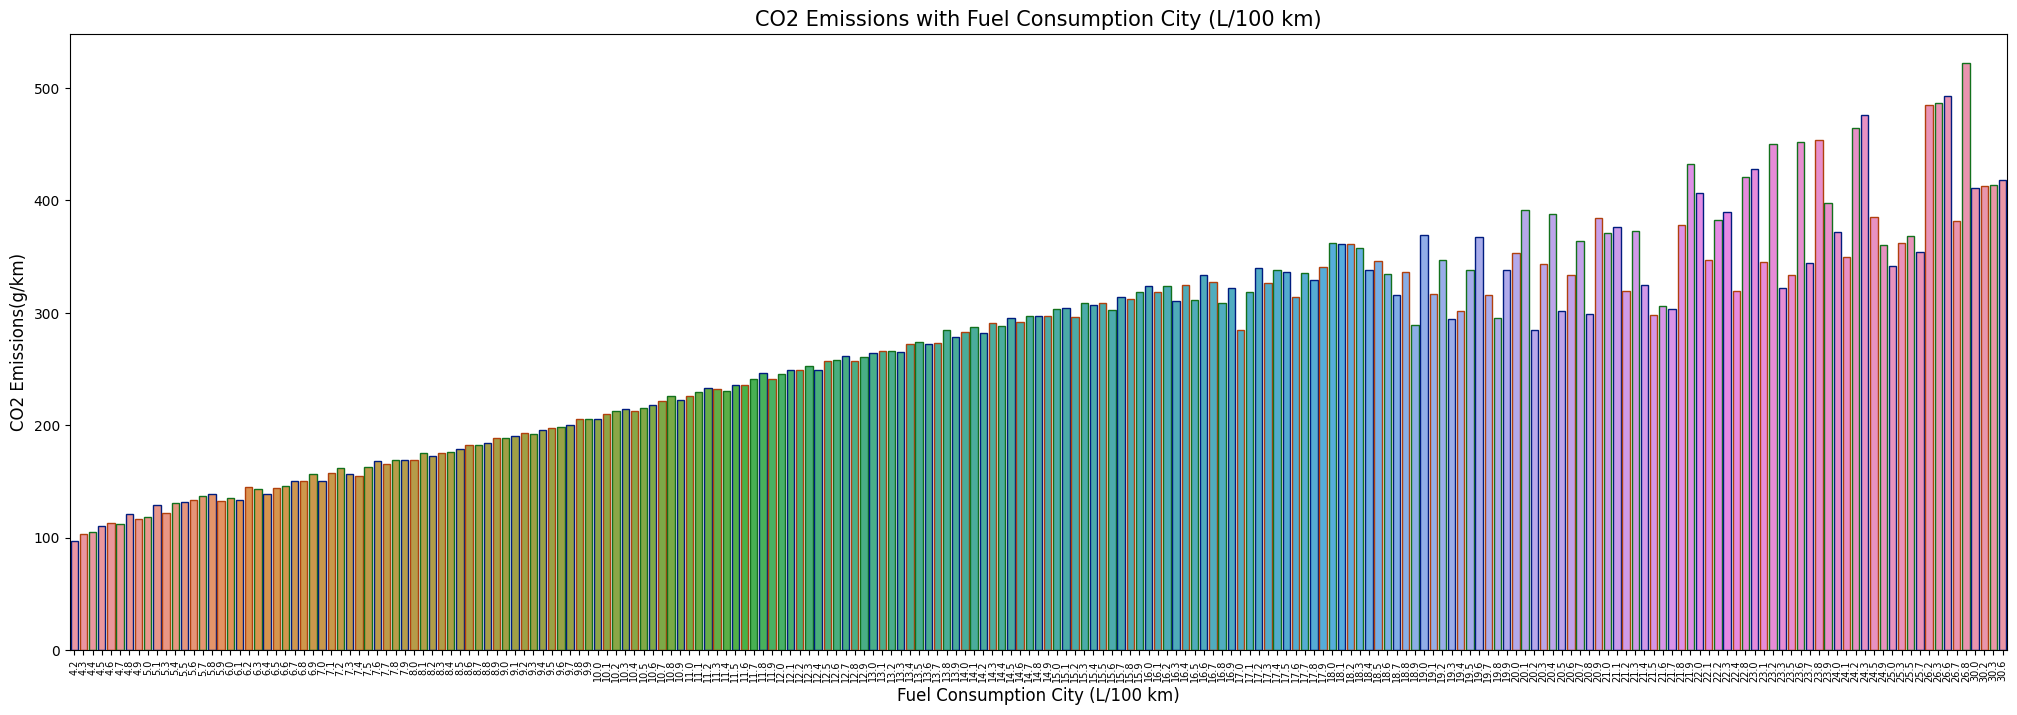

In [46]:
CO2_city = df.groupby(['Fuel Consumption City (L/100 km)'])['CO2 Emissions(g/km)'].mean().reset_index()

plt.figure(figsize=(25,8))
sns.barplot(x = "Fuel Consumption City (L/100 km)", y="CO2 Emissions(g/km)",data = CO2_city,
            edgecolor=sns.color_palette("dark", 3))
plt.title('CO2 Emissions with Fuel Consumption City (L/100 km)', fontsize=15)
plt.xlabel('Fuel Consumption City (L/100 km)', fontsize=12)
plt.xticks(rotation=90, horizontalalignment='center', fontweight='light', fontsize='7')
plt.ylabel('CO2 Emissions(g/km)', fontsize=12)

Text(0, 0.5, 'CO2 Emissions(g/km)')

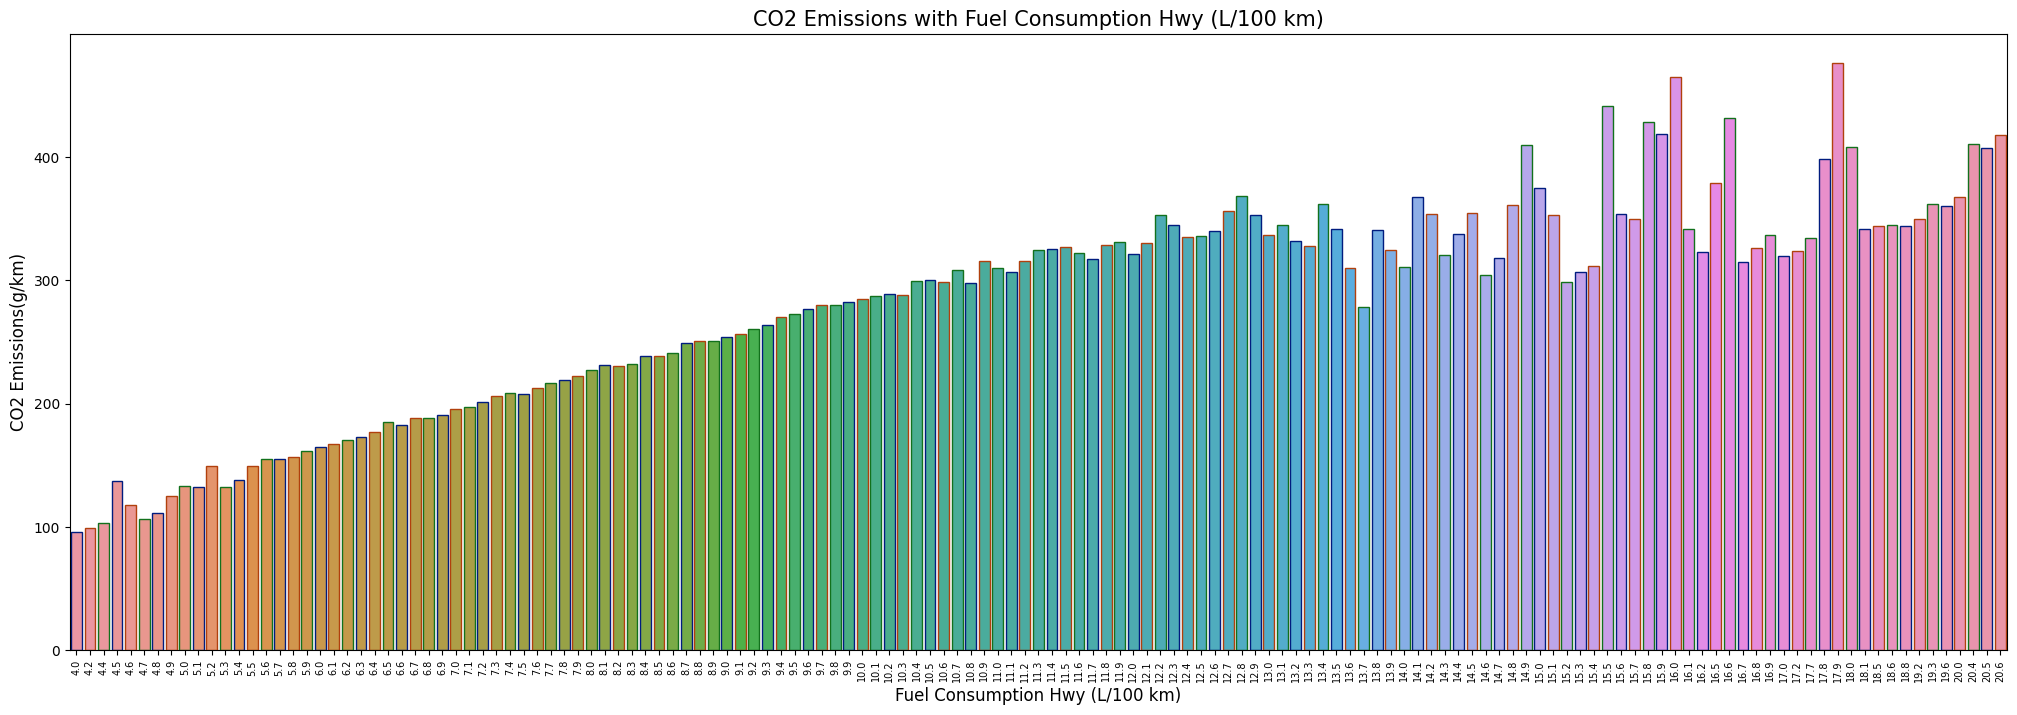

In [47]:
CO2_hwy = df.groupby(['Fuel Consumption Hwy (L/100 km)'])['CO2 Emissions(g/km)'].mean().reset_index()

plt.figure(figsize=(25,8))
sns.barplot(x = "Fuel Consumption Hwy (L/100 km)", y="CO2 Emissions(g/km)",data = CO2_hwy,
            edgecolor=sns.color_palette("dark", 3))
plt.title('CO2 Emissions with Fuel Consumption Hwy (L/100 km)', fontsize=15)
plt.xlabel('Fuel Consumption Hwy (L/100 km)', fontsize=12)
plt.xticks(rotation=90, horizontalalignment='center', fontweight='light', fontsize='7')
plt.ylabel('CO2 Emissions(g/km)', fontsize=12)

Text(0, 0.5, 'CO2 Emissions(g/km)')

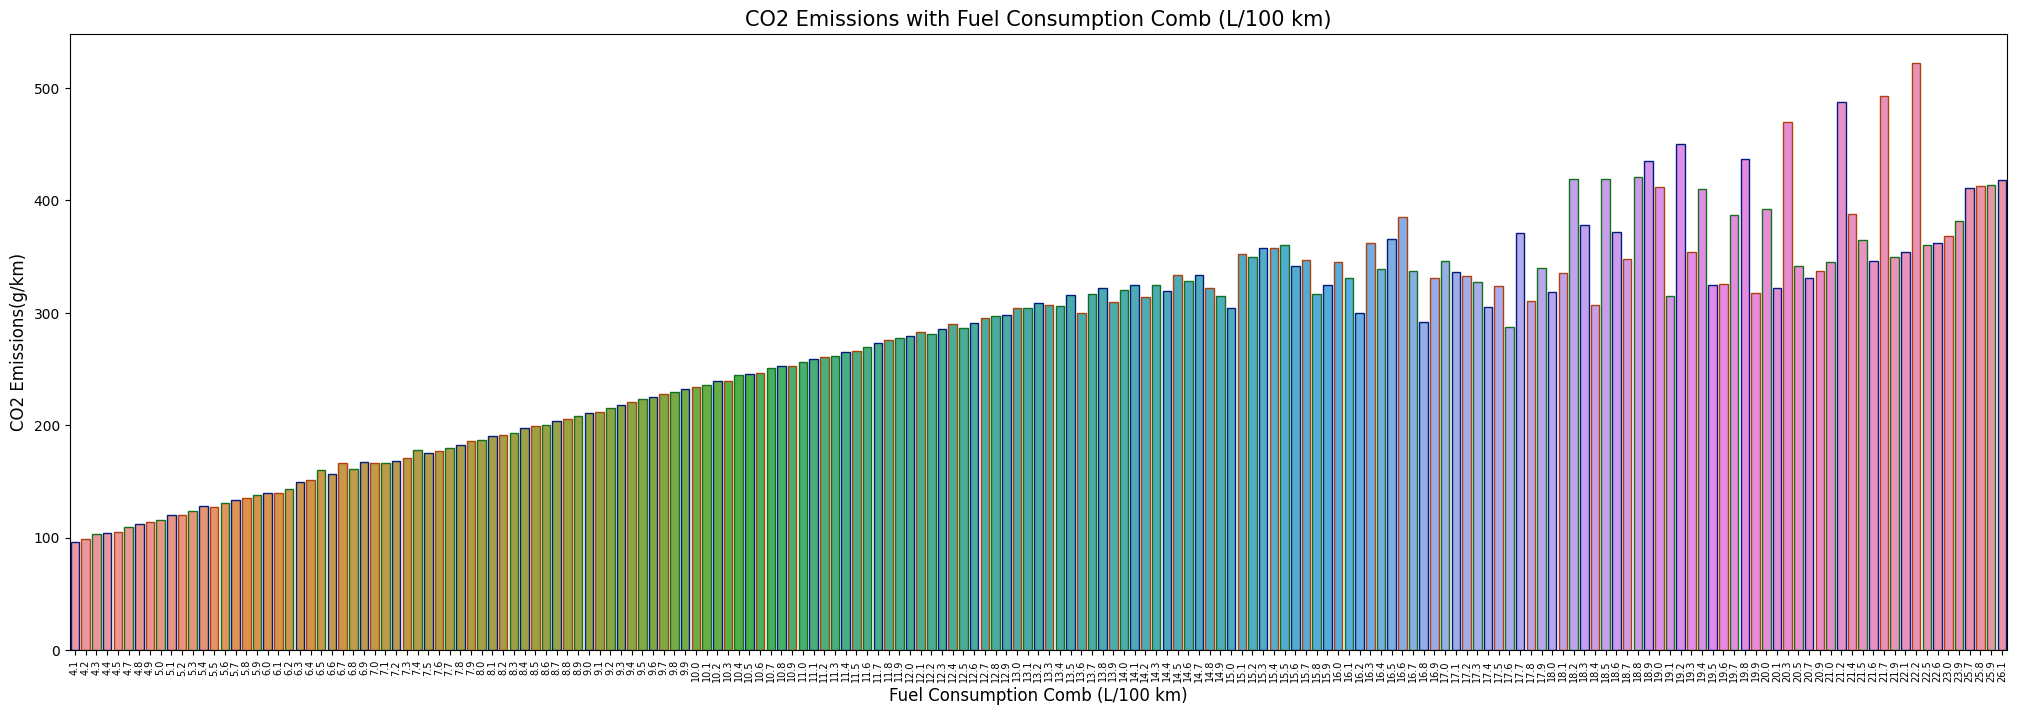

In [48]:
CO2_comb = df.groupby(['Fuel Consumption Comb (L/100 km)'])['CO2 Emissions(g/km)'].mean().reset_index()

plt.figure(figsize=(25,8))
sns.barplot(x = "Fuel Consumption Comb (L/100 km)", y="CO2 Emissions(g/km)",data = CO2_comb,
            edgecolor=sns.color_palette("dark", 3))
plt.title('CO2 Emissions with Fuel Consumption Comb (L/100 km)', fontsize=15)
plt.xlabel('Fuel Consumption Comb (L/100 km)', fontsize=12)
plt.xticks(rotation=90, horizontalalignment='center', fontweight='light', fontsize='7')
plt.ylabel('CO2 Emissions(g/km)', fontsize=12)

Text(0, 0.5, 'CO2 Emissions(g/km)')

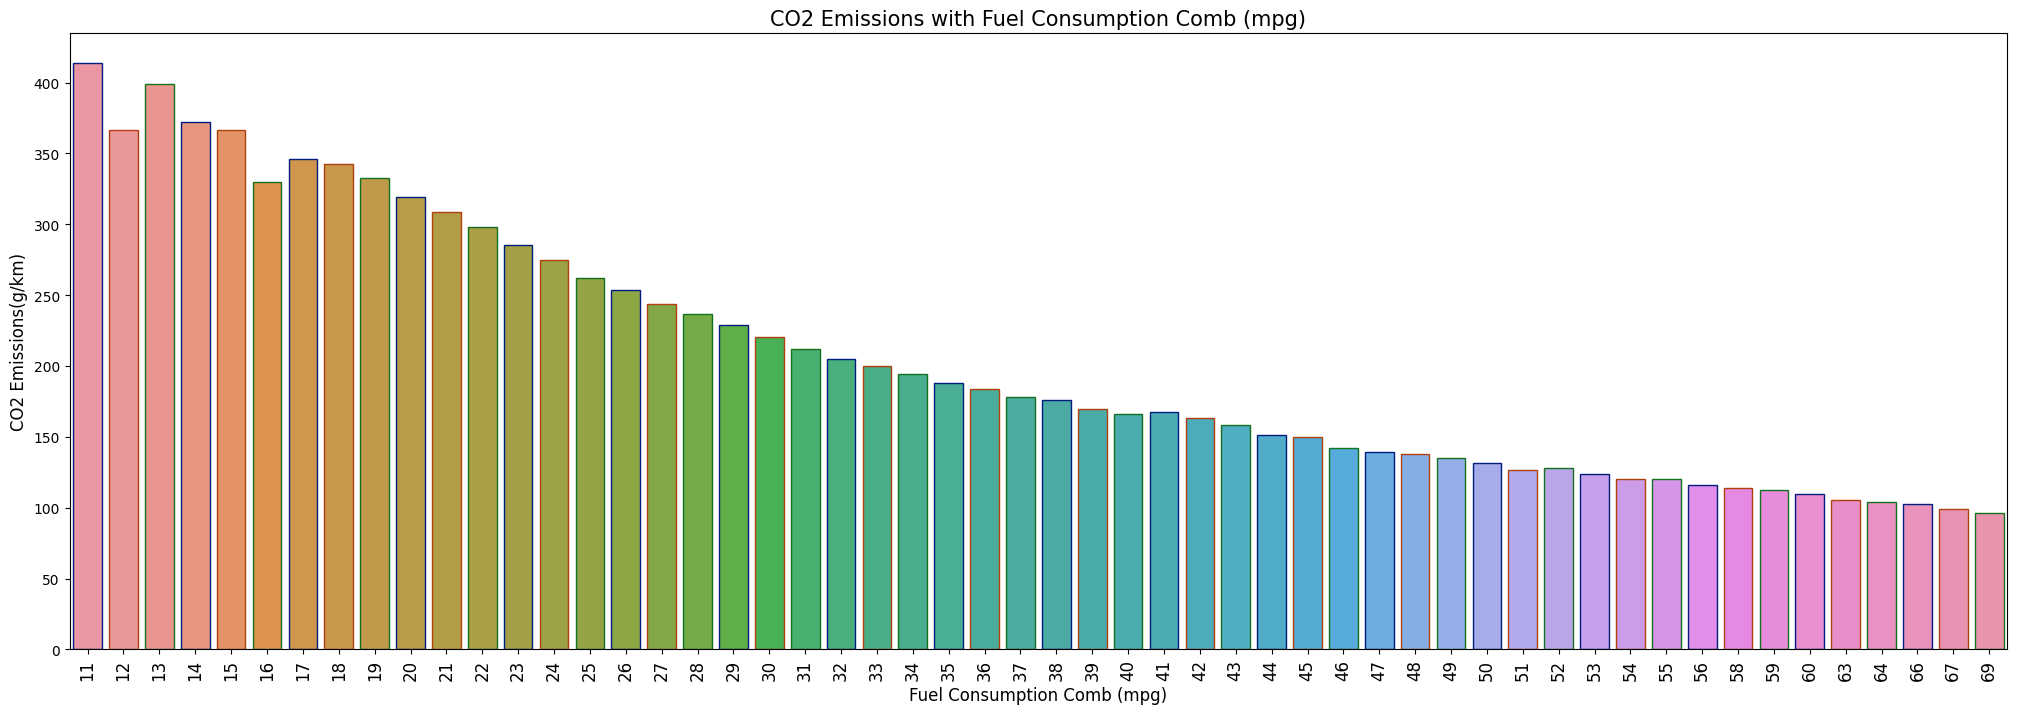

In [49]:
CO2_comb_mpg = df.groupby(['Fuel Consumption Comb (mpg)'])['CO2 Emissions(g/km)'].mean().reset_index()

plt.figure(figsize=(25,8))
sns.barplot(x = "Fuel Consumption Comb (mpg)", y="CO2 Emissions(g/km)",data = CO2_comb_mpg,
            edgecolor=sns.color_palette("dark", 3))
plt.title('CO2 Emissions with Fuel Consumption Comb (mpg)', fontsize=15)
plt.xlabel('Fuel Consumption Comb (mpg)', fontsize=12)
plt.xticks(rotation=90, horizontalalignment='center', fontweight='light', fontsize='12')
plt.ylabel('CO2 Emissions(g/km)', fontsize=12)


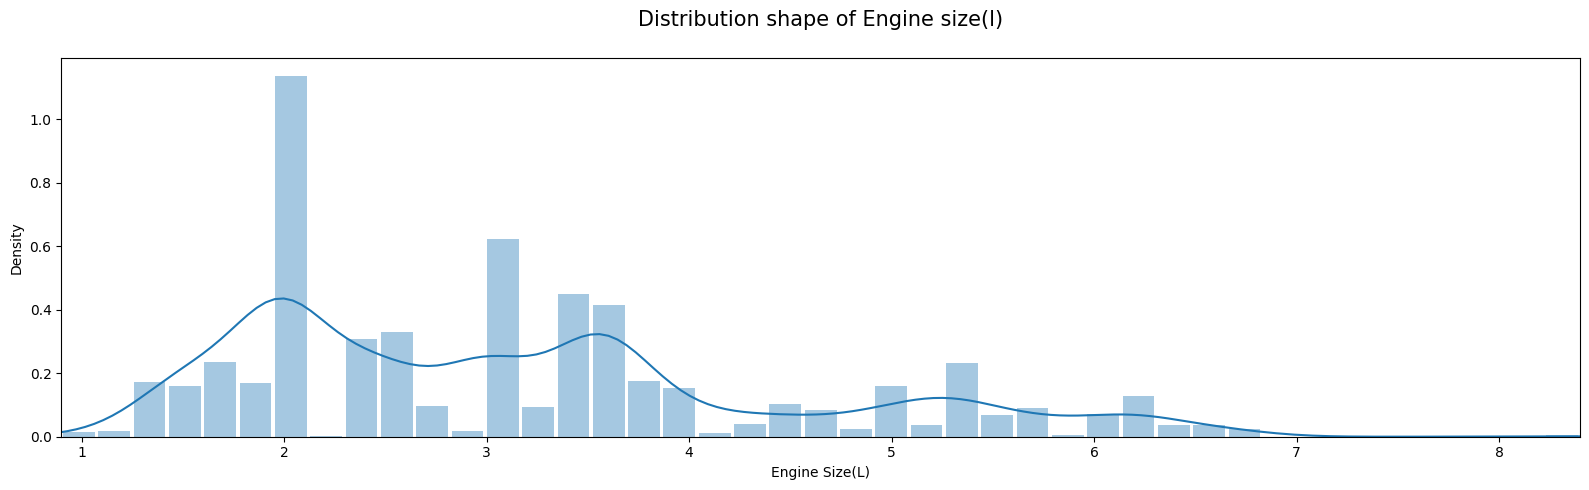

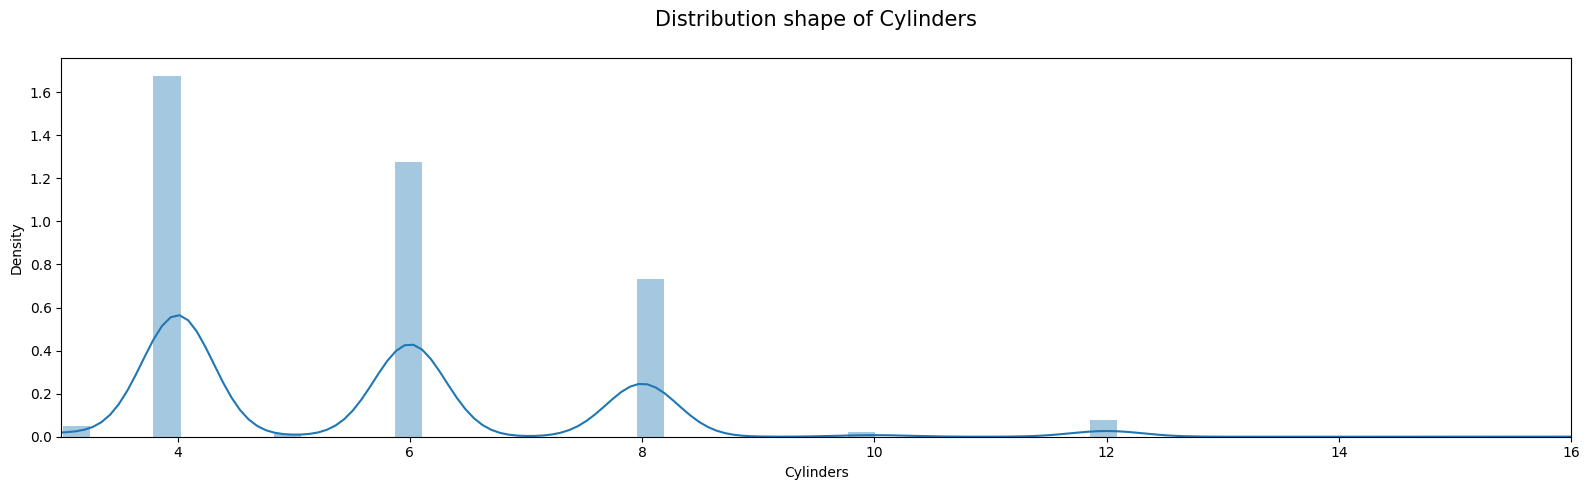

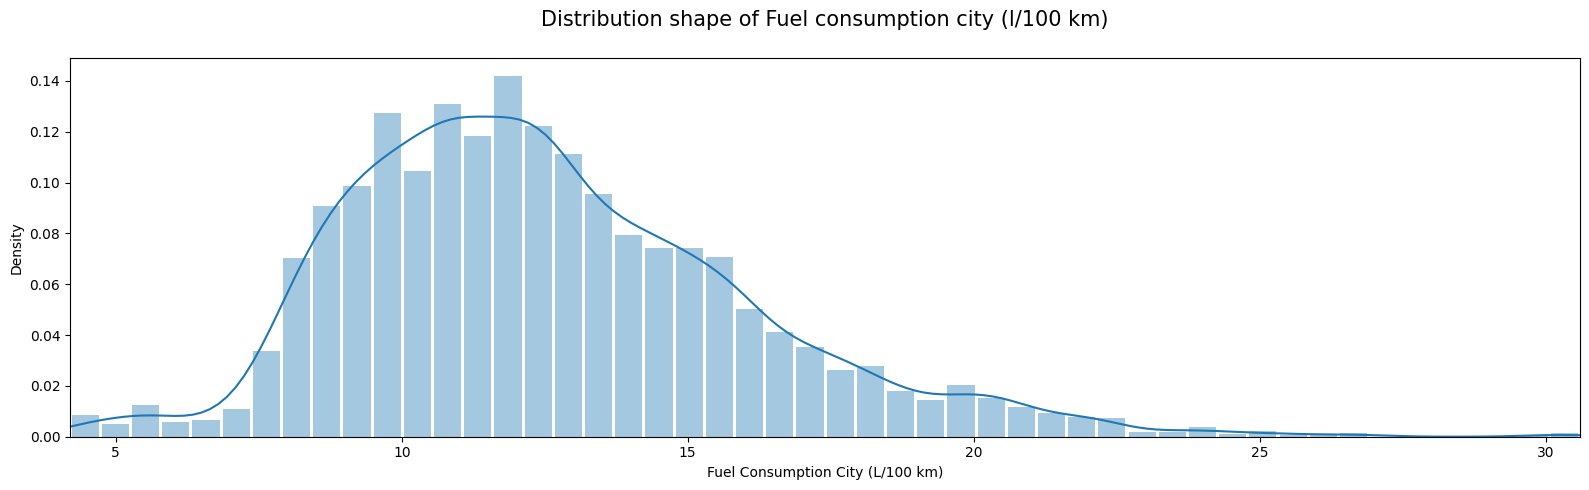

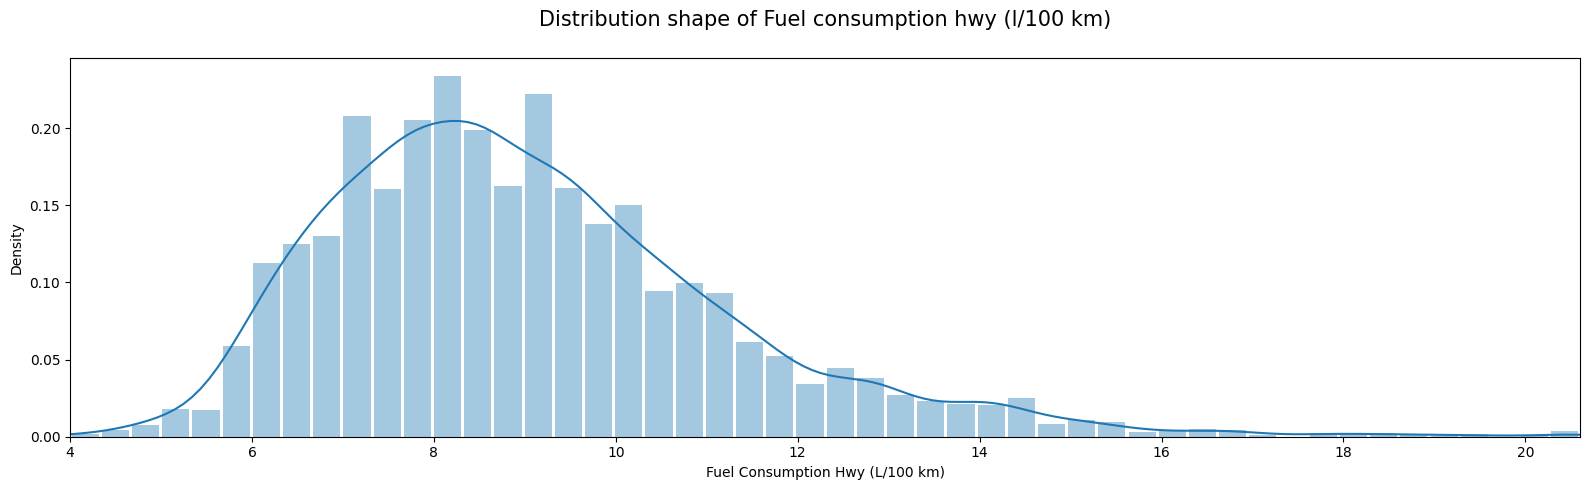

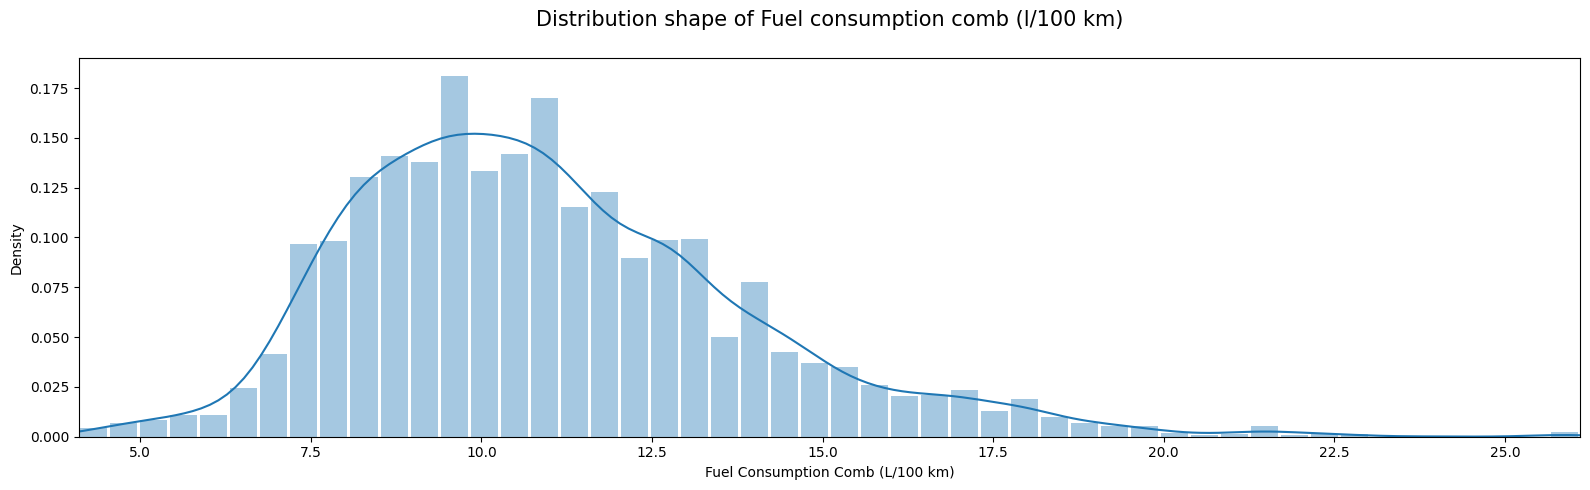

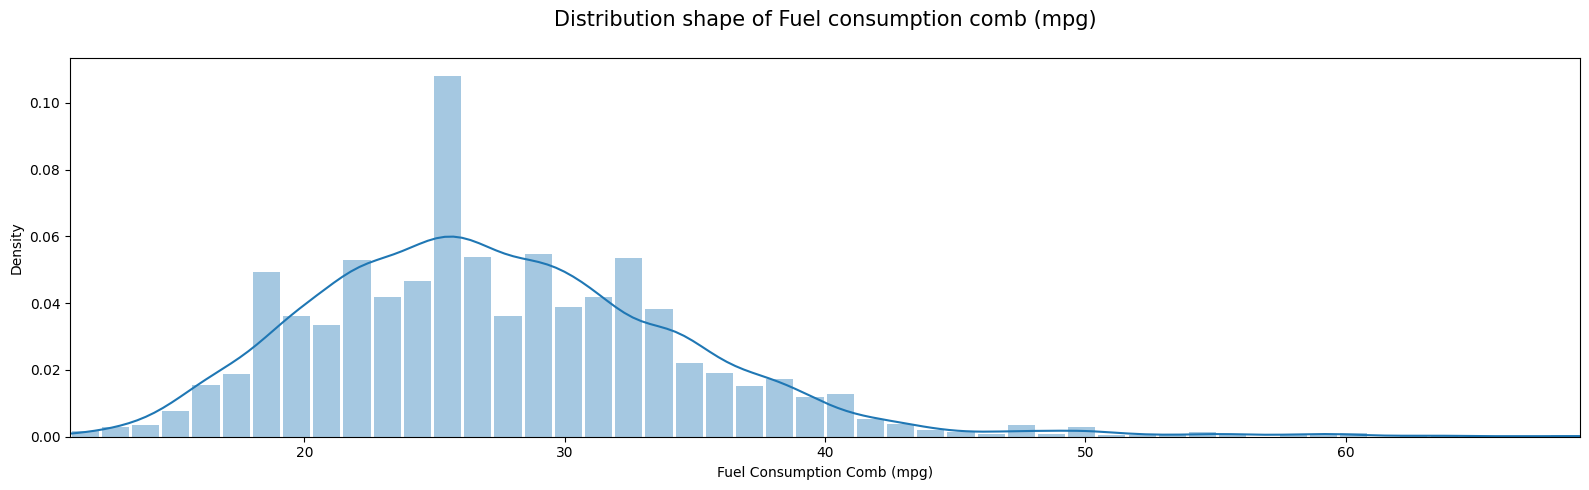

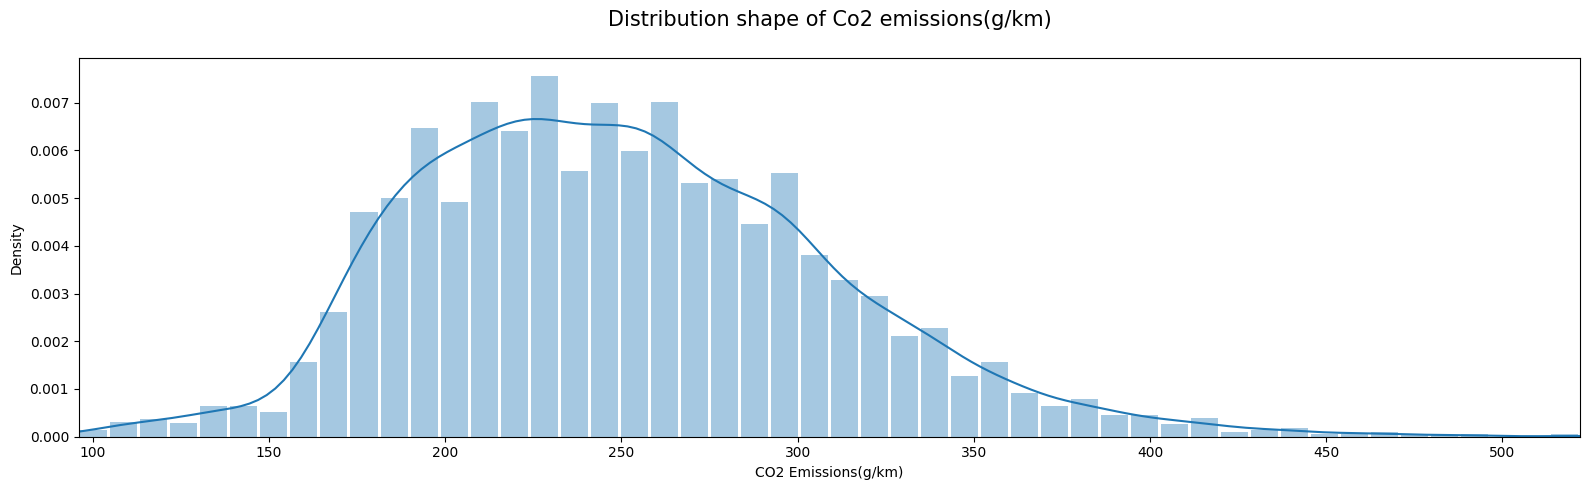

In [50]:
for feature in df.select_dtypes("number").columns:
    
    plt.figure(figsize=(16,5))
    sns.distplot(df[feature], hist_kws={"rwidth": 0.9})
    plt.xlim(df[feature].min(), df[feature].max())
    plt.title(f"Distribution shape of {feature.capitalize()}\n", fontsize=15)
    plt.tight_layout()
    plt.show()

In [51]:
df_natural=df[df["Fuel Type"]=="Natural Gas"]
natural=df_natural.index
df_natural

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
2439,CHEVROLET,IMPALA DUAL FUEL,MID-SIZE,3.6,6,Automatic with Select Shift,Natural Gas,15.2,9.5,12.7,22,213


In [52]:

for i in natural:
    df.drop(i, axis = 0,inplace = True)

In [53]:
df.reset_index(drop=True, inplace=True)

In [54]:
df

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,Automatic with Select Shift,Premium Gasoline,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,Manual,Premium Gasoline,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,Continuously Variable,Premium Gasoline,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,Automatic with Select Shift,Premium Gasoline,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,Automatic with Select Shift,Premium Gasoline,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...
7379,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,4,Automatic with Select Shift,Premium Gasoline,10.7,7.7,9.4,30,219
7380,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,4,Automatic with Select Shift,Premium Gasoline,11.2,8.3,9.9,29,232
7381,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,4,Automatic with Select Shift,Premium Gasoline,11.7,8.6,10.3,27,240
7382,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4,Automatic with Select Shift,Premium Gasoline,11.2,8.3,9.9,29,232


In [55]:
data_num_features = df.select_dtypes(include=np.number)

# print the names of the numeric variables 
print('The numerical columns in the dataset are: ',data_num_features.columns)

The numerical columns in the dataset are:  Index(['Engine Size(L)', 'Cylinders', 'Fuel Consumption City (L/100 km)',
       'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
       'Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)'],
      dtype='object')


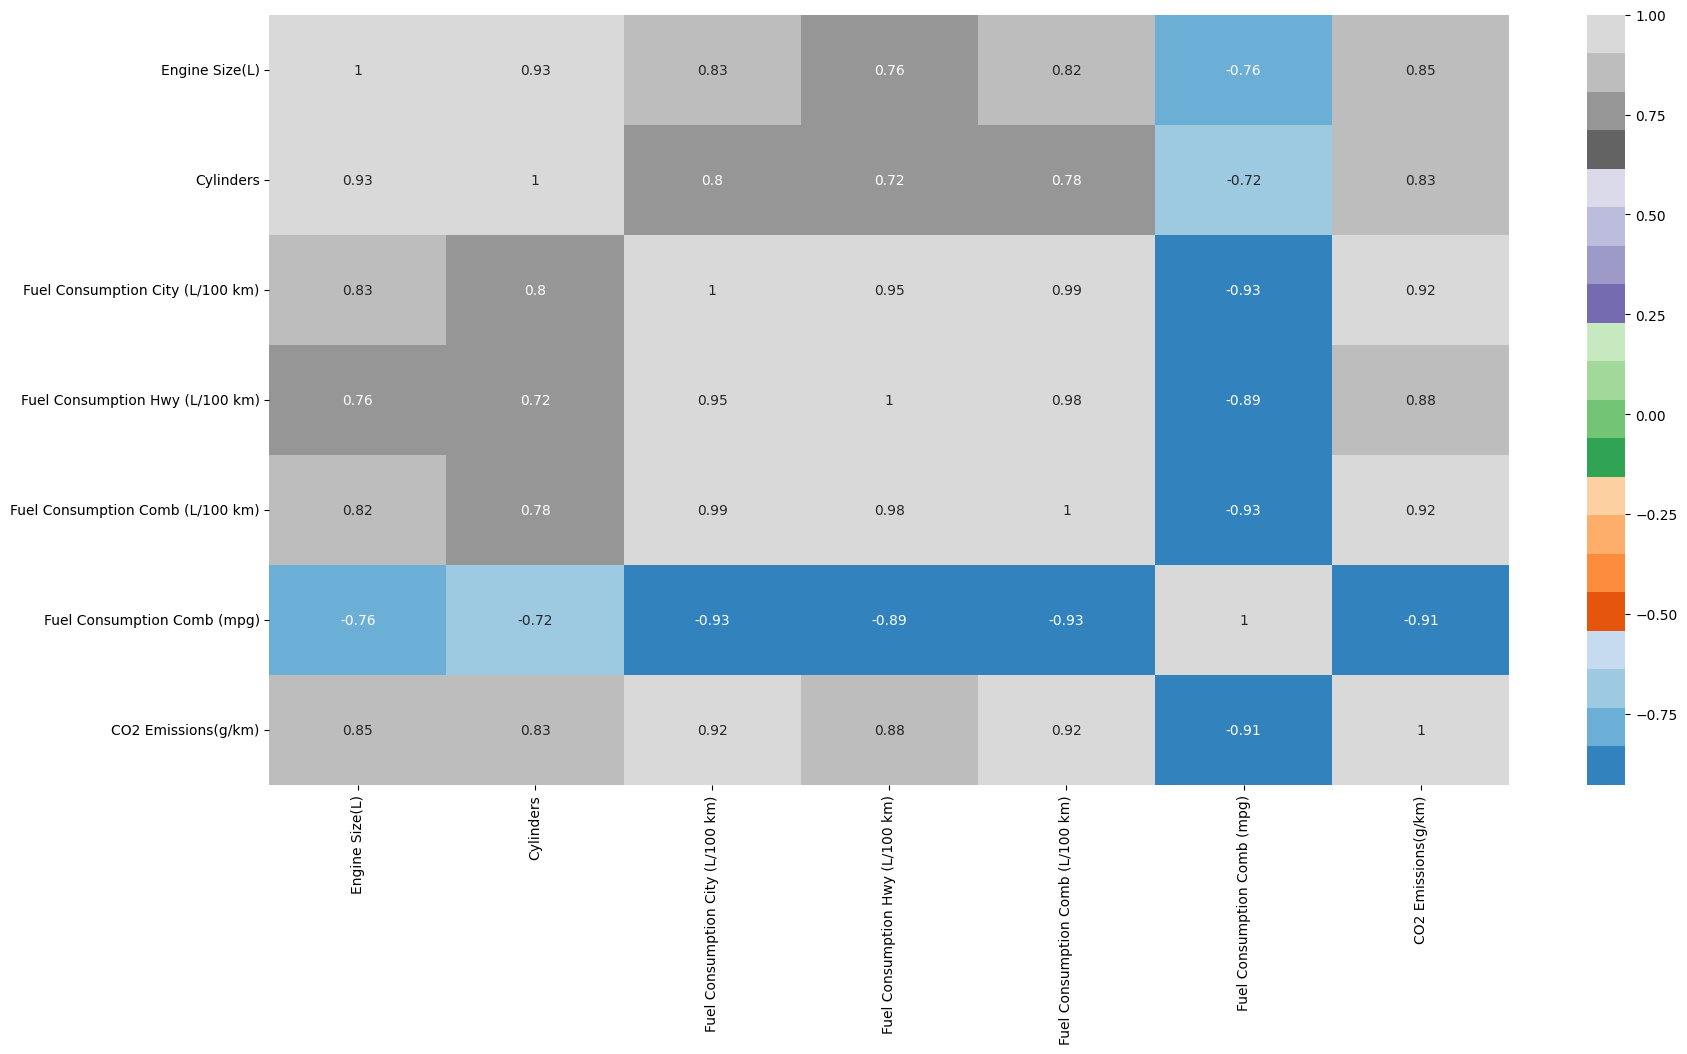

In [56]:
plt.figure(figsize=(20,10))
corr =data_num_features.corr(method='pearson')
sns.heatmap(corr, annot=True,cmap='tab20c')
plt.show()

In [57]:
data_num_features.skew()

Engine Size(L)                      0.809271
Cylinders                           1.110435
Fuel Consumption City (L/100 km)    0.809292
Fuel Consumption Hwy (L/100 km)     1.079235
Fuel Consumption Comb (L/100 km)    0.893533
Fuel Consumption Comb (mpg)         0.976833
CO2 Emissions(g/km)                 0.525877
dtype: float64

In [58]:
%pip install statsmodels

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: C:\Users\Huskykalo\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [59]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [60]:
vif = pd.DataFrame()
vif["VIF_Factor"] = [variance_inflation_factor(data_num_features.values, i) for i in range(data_num_features.shape[1])]
vif["Features"] = data_num_features.columns
vif.sort_values('VIF_Factor', ascending = False).reset_index(drop = True)

,VIF_Factor,Features
0,71293.041981,Fuel Consumption Comb (L/100 km)
1,28575.239167,Fuel Consumption City (L/100 km)
2,9931.055416,Fuel Consumption Hwy (L/100 km)
3,144.041399,CO2 Emissions(g/km)
4,84.585764,Cylinders
5,54.664061,Engine Size(L)
6,7.901822,Fuel Consumption Comb (mpg)


In [61]:
from sklearn.feature_selection import chi2

In [62]:
df['Make_Type'] = df['Make'].replace(['BUGATTI', 'PORSCHE', 'MASERATI', 'ASTON MARTIN', 'LAMBORGHINI',
                                                       'JAGUAR','SRT'],
                                                      'Sports')
df['Make_Type'] = df['Make_Type'].replace(['ACURA', 'BENTLEY', 'LINCOLN', 'ROLLS-ROYCE',
                                                         'GENESIS'],
                                                         'Luxury')
df['Make_Type'] = df['Make_Type'].replace(['ALFA ROMEO', 'AUDI', 'BMW', 'BUICK',
                                                         'CADILLAC', 'CHRYSLER', 'DODGE', 'GMC',
                                                         'INFINITI', 'JEEP', 'LAND ROVER', 'LEXUS', 'MERCEDES-BENZ',
                                                         'MINI', 'SMART', 'VOLVO'],
                                                         'Premium')
df['Make_Type'] = df['Make_Type'].replace(['CHEVROLET', 'FIAT', 'FORD', 'KIA',
                                                         'HONDA', 'HYUNDAI', 'MAZDA', 'MITSUBISHI',
                                                         'NISSAN', 'RAM', 'SCION', 'SUBARU', 'TOYOTA',
                                                         'VOLKSWAGEN'],
                                                         'General')

In [63]:
df['Make_Type'].unique()

array(['Luxury', 'Premium', 'Sports', 'General'], dtype=object)

In [64]:
df['Make_Type'].value_counts()

Make_Type
General    3263
Premium    3142
Sports      690
Luxury      289
Name: count, dtype: int64

In [65]:
#Drop Make column
df = df.drop(['Make'], axis=1)

In [66]:
df

,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km),Make_Type
0,ILX,COMPACT,2.0,4,Automatic with Select Shift,Premium Gasoline,9.9,6.7,8.5,33,196,Luxury
1,ILX,COMPACT,2.4,4,Manual,Premium Gasoline,11.2,7.7,9.6,29,221,Luxury
2,ILX HYBRID,COMPACT,1.5,4,Continuously Variable,Premium Gasoline,6.0,5.8,5.9,48,136,Luxury
3,MDX 4WD,SUV - SMALL,3.5,6,Automatic with Select Shift,Premium Gasoline,12.7,9.1,11.1,25,255,Luxury
4,RDX AWD,SUV - SMALL,3.5,6,Automatic with Select Shift,Premium Gasoline,12.1,8.7,10.6,27,244,Luxury
...,...,...,...,...,...,...,...,...,...,...,...,...
7379,XC40 T5 AWD,SUV - SMALL,2.0,4,Automatic with Select Shift,Premium Gasoline,10.7,7.7,9.4,30,219,Premium
7380,XC60 T5 AWD,SUV - SMALL,2.0,4,Automatic with Select Shift,Premium Gasoline,11.2,8.3,9.9,29,232,Premium
7381,XC60 T6 AWD,SUV - SMALL,2.0,4,Automatic with Select Shift,Premium Gasoline,11.7,8.6,10.3,27,240,Premium
7382,XC90 T5 AWD,SUV - STANDARD,2.0,4,Automatic with Select Shift,Premium Gasoline,11.2,8.3,9.9,29,232,Premium


In [67]:
df['Vehicle_Class_Type'] = df['Vehicle Class'].replace(['COMPACT', 'MINICOMPACT', 'SUBCOMPACT'],
                                                      'Hatchback')
df['Vehicle_Class_Type'] = df['Vehicle_Class_Type'].replace(['MID-SIZE', 'TWO-SEATER', 'FULL-SIZE', 'STATION WAGON - SMALL',
                                                         'STATION WAGON - MID-SIZE'],
                                                         'Sedan')
df['Vehicle_Class_Type'] = df['Vehicle_Class_Type'].replace(['SUV - SMALL', 'SUV - STANDARD', 'MINIVAN'],
                                                         'SUV')
df['Vehicle_Class_Type'] = df['Vehicle_Class_Type'].replace(['VAN - CARGO', 'VAN - PASSENGER', 'PICKUP TRUCK - STANDARD', 'SPECIAL PURPOSE VEHICLE',
                                                         'PICKUP TRUCK - SMALL'],
                                                         'Truck')

In [68]:
# check the unique values of the Make_Type column
df['Vehicle_Class_Type'].unique()

array(['Hatchback', 'SUV', 'Sedan', 'Truck'], dtype=object)

In [69]:
df['Vehicle_Class_Type'].value_counts()

Vehicle_Class_Type
Sedan        2536
SUV          2032
Hatchback    1954
Truck         862
Name: count, dtype: int64

In [70]:
df = df.drop(['Vehicle Class'], axis=1)

In [71]:
data_cat_features = df.select_dtypes(include='object')

# print the names of the numeric variables 
print('The object columns in the dataset are: ',data_cat_features.columns)

The object columns in the dataset are:  Index(['Model', 'Transmission', 'Fuel Type', 'Make_Type',
       'Vehicle_Class_Type'],
      dtype='object')


In [72]:
data_cat_features

,Model,Transmission,Fuel Type,Make_Type,Vehicle_Class_Type
0,ILX,Automatic with Select Shift,Premium Gasoline,Luxury,Hatchback
1,ILX,Manual,Premium Gasoline,Luxury,Hatchback
2,ILX HYBRID,Continuously Variable,Premium Gasoline,Luxury,Hatchback
3,MDX 4WD,Automatic with Select Shift,Premium Gasoline,Luxury,SUV
4,RDX AWD,Automatic with Select Shift,Premium Gasoline,Luxury,SUV
...,...,...,...,...,...
7379,XC40 T5 AWD,Automatic with Select Shift,Premium Gasoline,Premium,SUV
7380,XC60 T5 AWD,Automatic with Select Shift,Premium Gasoline,Premium,SUV
7381,XC60 T6 AWD,Automatic with Select Shift,Premium Gasoline,Premium,SUV
7382,XC90 T5 AWD,Automatic with Select Shift,Premium Gasoline,Premium,SUV


In [73]:
data_num_features

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,2.0,4,9.9,6.7,8.5,33,196
1,2.4,4,11.2,7.7,9.6,29,221
2,1.5,4,6.0,5.8,5.9,48,136
3,3.5,6,12.7,9.1,11.1,25,255
4,3.5,6,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...
7379,2.0,4,10.7,7.7,9.4,30,219
7380,2.0,4,11.2,8.3,9.9,29,232
7381,2.0,4,11.7,8.6,10.3,27,240
7382,2.0,4,11.2,8.3,9.9,29,232


In [74]:
 data_num_features.drop(['Fuel Consumption City (L/100 km)','Fuel Consumption Hwy (L/100 km)','Fuel Consumption Comb (mpg)'],inplace=True, axis = 1)

In [75]:
data_num_features

,Engine Size(L),Cylinders,Fuel Consumption Comb (L/100 km),CO2 Emissions(g/km)
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
...,...,...,...,...
7379,2.0,4,9.4,219
7380,2.0,4,9.9,232
7381,2.0,4,10.3,240
7382,2.0,4,9.9,232


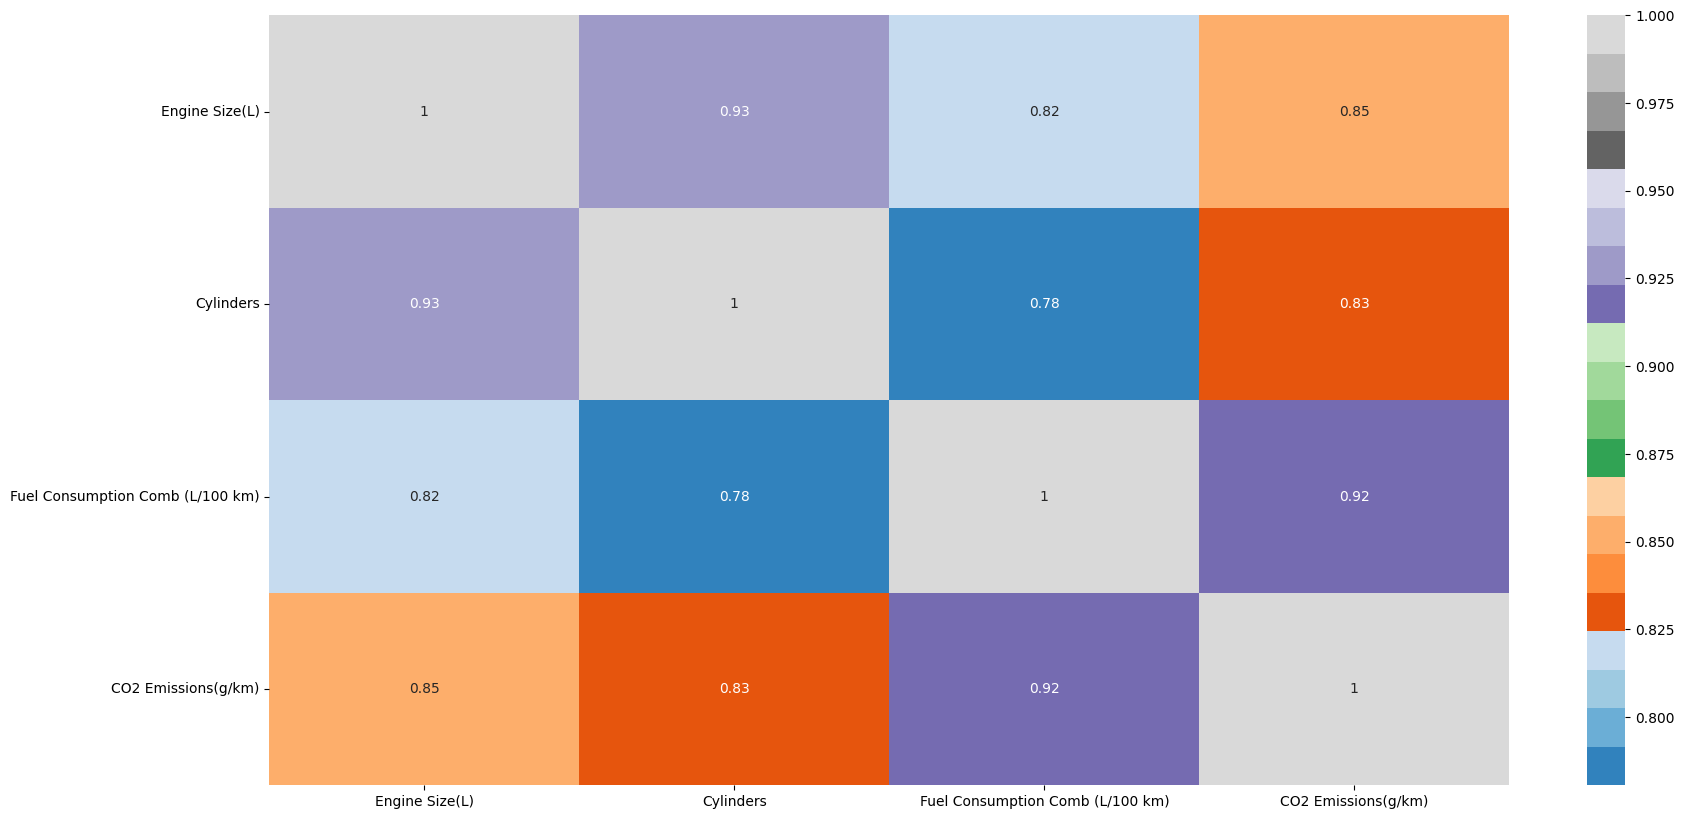

In [76]:
plt.figure(figsize=(20,10))
corr =data_num_features.corr(method='pearson')
sns.heatmap(corr, annot=True,cmap='tab20c')
plt.show()

In [77]:
data_num_features.skew()

Engine Size(L)                      0.809271
Cylinders                           1.110435
Fuel Consumption Comb (L/100 km)    0.893533
CO2 Emissions(g/km)                 0.525877
dtype: float64

In [78]:
pearson_coef, p_value = stats.pearsonr(df['Engine Size(L)'], df['Cylinders'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.9276530496465476  with a P-value of P = 0.0


In [79]:
pearson_coef, p_value = stats.pearsonr(df['Engine Size(L)'], df['Fuel Consumption Comb (L/100 km)'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.8170592708183996  with a P-value of P = 0.0


In [80]:
pearson_coef, p_value = stats.pearsonr(df['Engine Size(L)'], df['CO2 Emissions(g/km)'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient is 0.851202776926983  with a P-value of P = 0.0


In [81]:
pearson_coef, p_value = stats.pearsonr(df['Cylinders'], df['CO2 Emissions(g/km)'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient is 0.8326876868952164  with a P-value of P = 0.0


In [82]:
pearson_coef, p_value = stats.pearsonr(df['Cylinders'], df['Fuel Consumption Comb (L/100 km)'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient is 0.7805380721378115  with a P-value of P = 0.0


In [83]:
pearson_coef, p_value = stats.pearsonr(df['Fuel Consumption Comb (L/100 km)'], df['CO2 Emissions(g/km)'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient is 0.9181512233551077  with a P-value of P = 0.0


In [84]:
grouped_test=df[['Model', 'CO2 Emissions(g/km)']].groupby(['Model'])
grouped_test

In [85]:
df

,Model,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km),Make_Type,Vehicle_Class_Type
0,ILX,2.0,4,Automatic with Select Shift,Premium Gasoline,9.9,6.7,8.5,33,196,Luxury,Hatchback
1,ILX,2.4,4,Manual,Premium Gasoline,11.2,7.7,9.6,29,221,Luxury,Hatchback
2,ILX HYBRID,1.5,4,Continuously Variable,Premium Gasoline,6.0,5.8,5.9,48,136,Luxury,Hatchback
3,MDX 4WD,3.5,6,Automatic with Select Shift,Premium Gasoline,12.7,9.1,11.1,25,255,Luxury,SUV
4,RDX AWD,3.5,6,Automatic with Select Shift,Premium Gasoline,12.1,8.7,10.6,27,244,Luxury,SUV
...,...,...,...,...,...,...,...,...,...,...,...,...
7379,XC40 T5 AWD,2.0,4,Automatic with Select Shift,Premium Gasoline,10.7,7.7,9.4,30,219,Premium,SUV
7380,XC60 T5 AWD,2.0,4,Automatic with Select Shift,Premium Gasoline,11.2,8.3,9.9,29,232,Premium,SUV
7381,XC60 T6 AWD,2.0,4,Automatic with Select Shift,Premium Gasoline,11.7,8.6,10.3,27,240,Premium,SUV
7382,XC90 T5 AWD,2.0,4,Automatic with Select Shift,Premium Gasoline,11.2,8.3,9.9,29,232,Premium,SUV


In [86]:
data_num_features

,Engine Size(L),Cylinders,Fuel Consumption Comb (L/100 km),CO2 Emissions(g/km)
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
...,...,...,...,...
7379,2.0,4,9.4,219
7380,2.0,4,9.9,232
7381,2.0,4,10.3,240
7382,2.0,4,9.9,232


In [87]:
q1_Engine_Size , q3_Engine_Size = data_num_features['Engine Size(L)'].quantile(0.25) , data_num_features['Engine Size(L)'].quantile(0.75)

In [88]:
iqr_Engine_Size = q3_Engine_Size  - q1_Engine_Size 

In [89]:
lowerFence, upperFence = q1_Engine_Size - 1.5 * iqr_Engine_Size , q3_Engine_Size + 1.5 * iqr_Engine_Size 

In [90]:
lowerFence, upperFence

(-0.5500000000000003, 6.25)

In [91]:
outliers = data_num_features['Engine Size(L)'][(data_num_features['Engine Size(L)']<lowerFence) | (data_num_features['Engine Size(L)']>upperFence)]

In [92]:
outliers

36      6.3
75      6.8
290     6.4
300     6.4
301     6.4
       ... 
7287    6.6
7288    6.6
7289    6.7
7290    6.7
7291    6.6
Name: Engine Size(L), Length: 137, dtype: float64

In [93]:
q1_Cylinders , q3_Cylinders = data_num_features['Cylinders'].quantile(0.25) , data_num_features['Cylinders'].quantile(0.75)

In [94]:
iqr_Cylinders = q3_Cylinders  - q1_Cylinders 

In [95]:
lowerFence1, upperFence1 = q1_Cylinders -1.5*iqr_Cylinders, q3_Cylinders +1.5*iqr_Cylinders

In [96]:
lowerFence1, upperFence1

(1.0, 9.0)

In [97]:
outliers1 = data_num_features['Cylinders'][(data_num_features['Cylinders']<lowerFence1) | (data_num_features['Cylinders']>upperFence1)]

In [98]:
outliers1

13      12
14      12
19      12
36      12
47      10
        ..
7287    12
7288    12
7289    12
7290    12
7291    12
Name: Cylinders, Length: 196, dtype: int64

In [99]:
q1_3 , q3_3 = data_num_features['Fuel Consumption Comb (L/100 km)'].quantile(0.25) , data_num_features['Fuel Consumption Comb (L/100 km)'].quantile(0.75)

In [100]:
iqr_3 = q3_3  - q1_3

In [101]:
lowerFence2, upperFence2 = q1_3 -1.5*iqr_3, q3_3 +1.5*iqr_3

In [102]:
lowerFence2, upperFence2

(3.3500000000000014, 18.15)

In [103]:
outliers2 = data_num_features['Fuel Consumption Comb (L/100 km)'][(data_num_features['Fuel Consumption Comb (L/100 km)']<lowerFence2) | (data_num_features['Fuel Consumption Comb (L/100 km)']>upperFence2)]

In [104]:
outliers2

75      19.0
180     20.1
182     22.1
212     20.9
214     21.5
        ... 
6878    19.5
6894    18.4
6901    19.1
7057    21.4
7058    21.7
Name: Fuel Consumption Comb (L/100 km), Length: 142, dtype: float64

In [105]:
q1_4 , q3_4 = data_num_features['CO2 Emissions(g/km)'].quantile(0.25) , data_num_features['CO2 Emissions(g/km)'].quantile(0.75)

In [106]:
iqr_4 = q3_4  - q1_4

In [107]:
lowerFence3, upperFence3 = q1_4 -1.5*iqr_4, q3_4 +1.5*iqr_4

In [108]:
lowerFence3, upperFence3

(88.0, 408.0)

In [109]:
outliers3 = data_num_features['CO2 Emissions(g/km)'][(data_num_features['CO2 Emissions(g/km)']<lowerFence3) | (data_num_features['CO2 Emissions(g/km)']>upperFence3)]

In [110]:
outliers3

48      409
52      409
75      437
223     414
224     432
       ... 
6045    493
6639    522
7018    413
7057    485
7058    493
Name: CO2 Emissions(g/km), Length: 80, dtype: int64

In [111]:
def replaceOutliers(variable):
    """Calculates and replace outliers using IQR method."""
    
    # Calculate 1st, 3rd quartiles and iqr.
    Q1, Q3 = variable.quantile(0.25), variable.quantile(0.75)
    IQR = Q3 - Q1
    
    # Calculate lower fence and upper fence for outliers
    LowerFence, UpperFence = Q1-1.5*IQR, Q3+1.5*IQR   # Any values less than l_fence and greater than u_fence are outliers.
    
    # Observations that are outliers
    Outliers = variable[(variable<LowerFence) | (variable>UpperFence)]
    
    variable = np.where(variable > UpperFence, UpperFence, np.where( variable < LowerFence, LowerFence, variable))
    
    

    return variable

In [112]:
data_num_features.rename(columns ={'Engine Size(L)': "engine_size",'Cylinders': "cylinders",'Fuel Consumption Comb (L/100 km)' :"fuel_cons_comb", 'CO2 Emissions(g/km)' : "co2"}, inplace = True)

In [113]:
import plotly.graph_objs as go
from plotly.tools import make_subplots

In [114]:
def plotBoxPlot(variable,filteredVariable):
    """Plots Box plot of a variable with and without outliers.
    We will also use the output of removeOutliers function as the input to this function.
    variable = variable with outliers,
    filteredVariable = variable without outliers"""
    
    # Create subplot object.
    fig = make_subplots(
        rows=2,
        cols=1,
        print_grid=False,
    subplot_titles=(f"{variable.name} Distribution with Outliers", f"{variable.name} Distribution without Outliers"))
    
    # Tboxplot with outliers
    fig.add_trace(
        go.Box(
            x = variable,
            name = "", # This removes trace 0
            marker = dict(color="darkred")
        ),
    row=1,col=1)
    
    #  boxplot without outliers
    fig.add_trace(
        go.Box(
            x = filteredVariable,
            name = "",
            marker = dict(color="green")
        ),
    row=2,col=1)
    
    # Update layout
    fig.layout.update(
        height=800, 
        width=870,
        showlegend=False,
        paper_bgcolor="rgb(243, 243, 243)",
        plot_bgcolor="rgb(243, 243, 243)"
        )
    
    # Update axes
    fig.layout.xaxis2.update(title=f"<b>{variable.name}</b>")
    return fig.show()

In [115]:
plotBoxPlot(data_num_features.cylinders,replaceOutliers(data_num_features.cylinders))

C:\Users\Huskykalo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\plotly\tools.py:460: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



In [116]:
plotBoxPlot(data_num_features.engine_size,replaceOutliers(data_num_features.engine_size))

C:\Users\Huskykalo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\plotly\tools.py:460: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



In [117]:
plotBoxPlot(data_num_features.fuel_cons_comb,replaceOutliers(data_num_features.fuel_cons_comb))

C:\Users\Huskykalo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\plotly\tools.py:460: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



In [118]:
plotBoxPlot(data_num_features.co2,replaceOutliers(data_num_features.co2))

C:\Users\Huskykalo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\plotly\tools.py:460: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



In [119]:
def impute_outliers_IQR(data_num_features):
    q1=data_num_features.quantile(0.25)
    q3=data_num_features.quantile(0.75)
    iqr=q3-q1
    upper = data_num_features[~(data_num_features>(q3+1.5*iqr))].max()
    lower = data_num_features[~(data_num_features<(q1-1.5*iqr))].min()
    data_num_features = np.where(data_num_features > upper, upper, np.where(data_num_features < lower, lower, data_num_features))
    return data_num_features

  


In [120]:
data_num_features['cylinders'] = impute_outliers_IQR(data_num_features['cylinders'])

In [121]:
data_num_features.describe()['cylinders']

count    7384.000000
mean        5.518554
std         1.580452
min         3.000000
25%         4.000000
50%         6.000000
75%         6.000000
max         8.000000
Name: cylinders, dtype: float64

In [122]:
data_num_features['engine_size'] = impute_outliers_IQR(data_num_features['engine_size'])

In [123]:
data_num_features.describe()['engine_size']

count    7384.000000
mean        3.151855
std         1.333201
min         0.900000
25%         2.000000
50%         3.000000
75%         3.700000
max         6.200000
Name: engine_size, dtype: float64

In [124]:
data_num_features['fuel_cons_comb'] = impute_outliers_IQR(data_num_features['fuel_cons_comb'])

In [125]:
data_num_features.describe()['fuel_cons_comb']

count    7384.000000
mean       10.936159
std         2.768573
min         4.100000
25%         8.900000
50%        10.600000
75%        12.600000
max        18.100000
Name: fuel_cons_comb, dtype: float64

In [126]:
data_num_features['co2'] = impute_outliers_IQR(data_num_features['co2'])

In [127]:
data_num_features.describe()['co2']

count    7384.000000
mean      250.260022
std        57.459756
min        96.000000
25%       208.000000
50%       246.000000
75%       288.000000
max       408.000000
Name: co2, dtype: float64

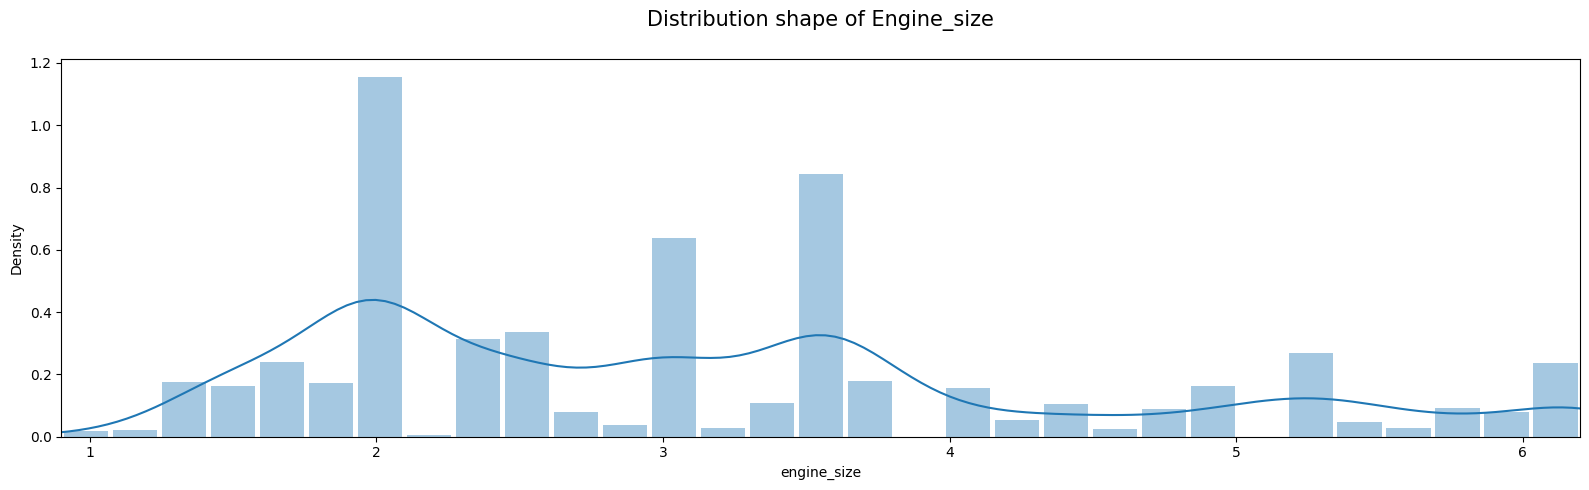

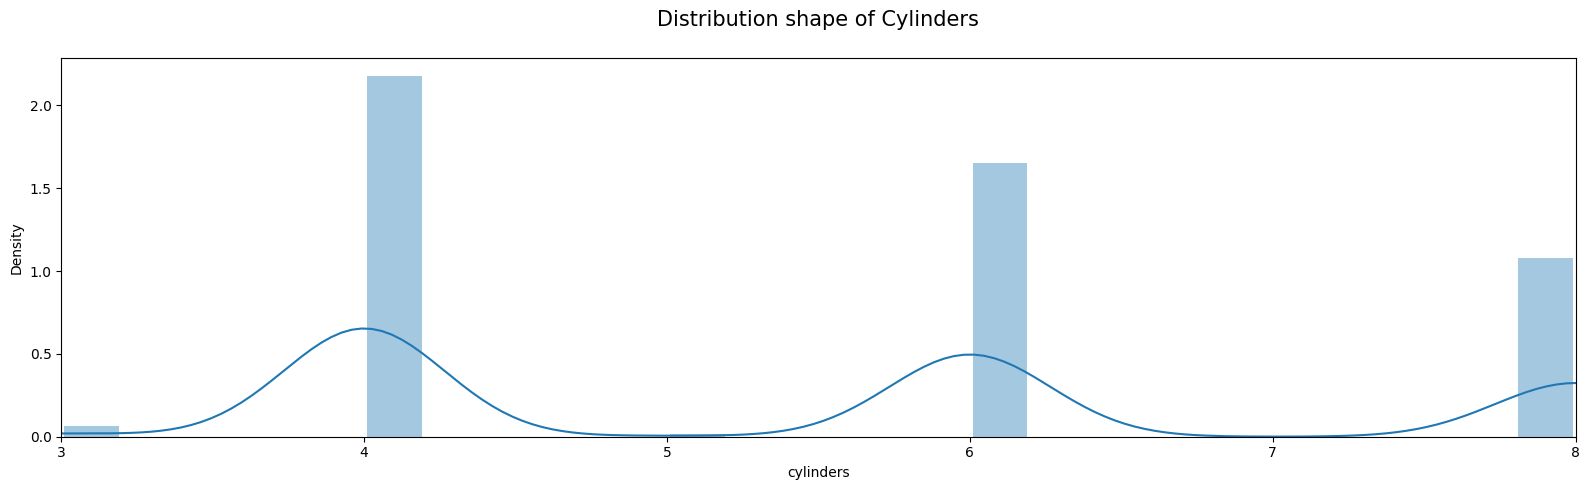

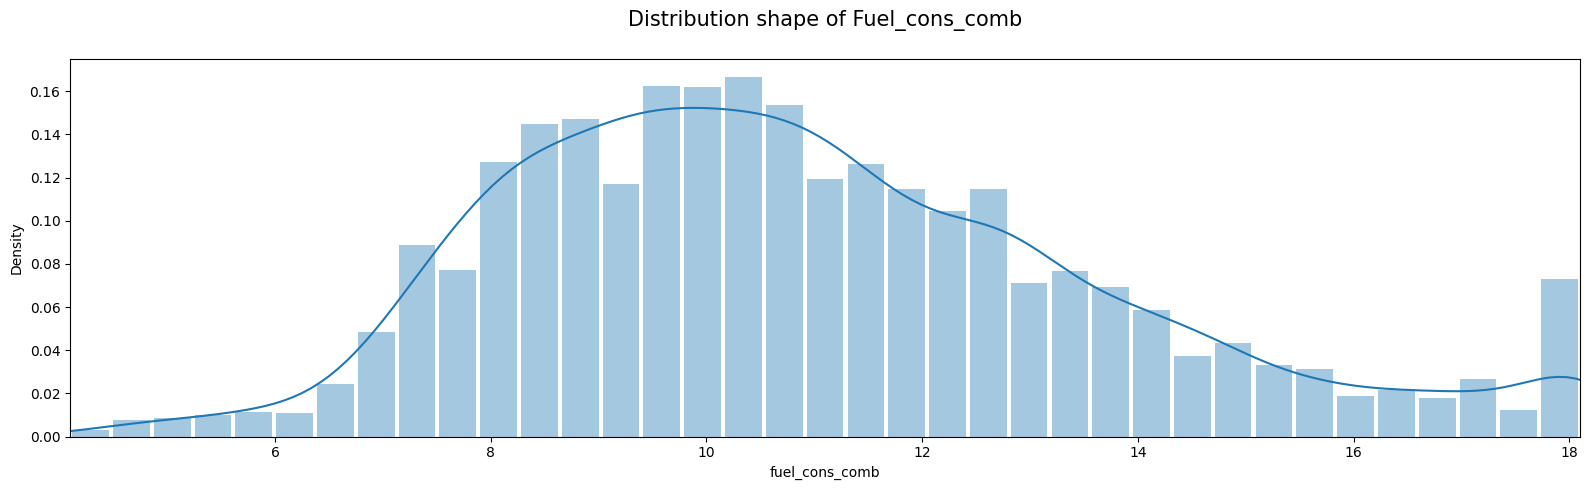

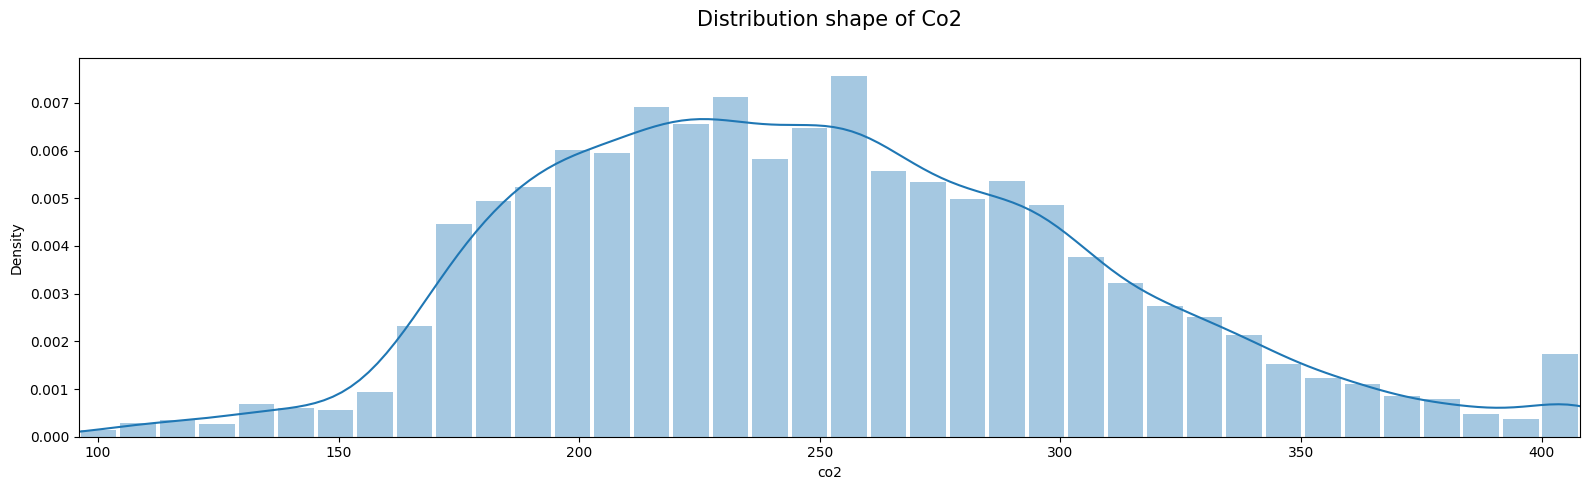

In [128]:
for feature in data_num_features.select_dtypes("number").columns:
    
    plt.figure(figsize=(16,5))
    sns.distplot(data_num_features[feature], hist_kws={"rwidth": 0.9})
    plt.xlim(data_num_features[feature].min(), data_num_features[feature].max())
    plt.title(f"Distribution shape of {feature.capitalize()}\n", fontsize=15)
    plt.tight_layout()
    plt.show()

In [129]:
data_num_features.skew()

engine_size       0.739977
cylinders         0.408153
fuel_cons_comb    0.594865
co2               0.390193
dtype: float64

In [130]:
data_num_features

,engine_size,cylinders,fuel_cons_comb,co2
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
...,...,...,...,...
7379,2.0,4,9.4,219
7380,2.0,4,9.9,232
7381,2.0,4,10.3,240
7382,2.0,4,9.9,232


In [131]:
df

,Model,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km),Make_Type,Vehicle_Class_Type
0,ILX,2.0,4,Automatic with Select Shift,Premium Gasoline,9.9,6.7,8.5,33,196,Luxury,Hatchback
1,ILX,2.4,4,Manual,Premium Gasoline,11.2,7.7,9.6,29,221,Luxury,Hatchback
2,ILX HYBRID,1.5,4,Continuously Variable,Premium Gasoline,6.0,5.8,5.9,48,136,Luxury,Hatchback
3,MDX 4WD,3.5,6,Automatic with Select Shift,Premium Gasoline,12.7,9.1,11.1,25,255,Luxury,SUV
4,RDX AWD,3.5,6,Automatic with Select Shift,Premium Gasoline,12.1,8.7,10.6,27,244,Luxury,SUV
...,...,...,...,...,...,...,...,...,...,...,...,...
7379,XC40 T5 AWD,2.0,4,Automatic with Select Shift,Premium Gasoline,10.7,7.7,9.4,30,219,Premium,SUV
7380,XC60 T5 AWD,2.0,4,Automatic with Select Shift,Premium Gasoline,11.2,8.3,9.9,29,232,Premium,SUV
7381,XC60 T6 AWD,2.0,4,Automatic with Select Shift,Premium Gasoline,11.7,8.6,10.3,27,240,Premium,SUV
7382,XC90 T5 AWD,2.0,4,Automatic with Select Shift,Premium Gasoline,11.2,8.3,9.9,29,232,Premium,SUV


In [132]:
df1 = df[['Model','CO2 Emissions(g/km)']]

In [133]:
df1

,Model,CO2 Emissions(g/km)
0,ILX,196
1,ILX,221
2,ILX HYBRID,136
3,MDX 4WD,255
4,RDX AWD,244
...,...,...
7379,XC40 T5 AWD,219
7380,XC60 T5 AWD,232
7381,XC60 T6 AWD,240
7382,XC90 T5 AWD,232


In [134]:
# returns F-statistic and P-value

from scipy.stats import f_oneway


In [135]:
# Running the one-way anova test 
# Assumption(H0) is that Model and Co2 are NOT correlated

# Finds out the Co2 data for each Model as a list

# Performing the ANOVA test
# We accept the Assumption(H0) only when P-Value > 0.05
#As the output of the P-value is almost zero, hence, we reject H0. This means the variables are correlated with each other.
CategoryGroupLists=df1.groupby('Model')['CO2 Emissions(g/km)'].apply(list)
AnovaResults = f_oneway(*CategoryGroupLists)
print('P-Value for Anova is: ', AnovaResults[1])

P-Value for Anova is:  0.0


In [136]:
data_cat_features

,Model,Transmission,Fuel Type,Make_Type,Vehicle_Class_Type
0,ILX,Automatic with Select Shift,Premium Gasoline,Luxury,Hatchback
1,ILX,Manual,Premium Gasoline,Luxury,Hatchback
2,ILX HYBRID,Continuously Variable,Premium Gasoline,Luxury,Hatchback
3,MDX 4WD,Automatic with Select Shift,Premium Gasoline,Luxury,SUV
4,RDX AWD,Automatic with Select Shift,Premium Gasoline,Luxury,SUV
...,...,...,...,...,...
7379,XC40 T5 AWD,Automatic with Select Shift,Premium Gasoline,Premium,SUV
7380,XC60 T5 AWD,Automatic with Select Shift,Premium Gasoline,Premium,SUV
7381,XC60 T6 AWD,Automatic with Select Shift,Premium Gasoline,Premium,SUV
7382,XC90 T5 AWD,Automatic with Select Shift,Premium Gasoline,Premium,SUV


In [137]:
df_Model = data_cat_features[['Model']]

In [138]:
df_Model

,Model
0,ILX
1,ILX
2,ILX HYBRID
3,MDX 4WD
4,RDX AWD
...,...
7379,XC40 T5 AWD
7380,XC60 T5 AWD
7381,XC60 T6 AWD
7382,XC90 T5 AWD


In [139]:
df_dummies = pd.get_dummies(data = data_cat_features[["Fuel Type","Transmission","Make_Type","Vehicle_Class_Type"]])
df_dummies

,Fuel Type_Diesel,Fuel Type_Ethanol(E85),Fuel Type_Premium Gasoline,Fuel Type_Regular Gasoline,Transmission_Automated Manual,Transmission_Automatic,Transmission_Automatic with Select Shift,Transmission_Continuously Variable,Transmission_Manual,Make_Type_General,Make_Type_Luxury,Make_Type_Premium,Make_Type_Sports,Vehicle_Class_Type_Hatchback,Vehicle_Class_Type_SUV,Vehicle_Class_Type_Sedan,Vehicle_Class_Type_Truck
0,False,False,True,False,False,False,True,False,False,False,True,False,False,True,False,False,False
1,False,False,True,False,False,False,False,False,True,False,True,False,False,True,False,False,False
2,False,False,True,False,False,False,False,True,False,False,True,False,False,True,False,False,False
3,False,False,True,False,False,False,True,False,False,False,True,False,False,False,True,False,False
4,False,False,True,False,False,False,True,False,False,False,True,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7379,False,False,True,False,False,False,True,False,False,False,False,True,False,False,True,False,False
7380,False,False,True,False,False,False,True,False,False,False,False,True,False,False,True,False,False
7381,False,False,True,False,False,False,True,False,False,False,False,True,False,False,True,False,False
7382,False,False,True,False,False,False,True,False,False,False,False,True,False,False,True,False,False


In [140]:
df_Model

,Model
0,ILX
1,ILX
2,ILX HYBRID
3,MDX 4WD
4,RDX AWD
...,...
7379,XC40 T5 AWD
7380,XC60 T5 AWD
7381,XC60 T6 AWD
7382,XC90 T5 AWD


In [141]:
enc_model = (df_Model.groupby('Model').size()) / len(df_Model)
enc_model

Model
124 SPIDER    0.000542
124 Spider    0.000542
1500          0.000948
1500 (MDS)    0.000813
1500 4X4      0.000948
                ...   
iM            0.000271
iQ            0.000271
tC            0.000813
xB            0.000542
xD            0.000271
Length: 2053, dtype: float64

In [142]:
df_Model['Model_New'] = df_Model['Model'].apply(lambda x : enc_model[x])

In [143]:
df_Model

,Model,Model_New
0,ILX,0.001219
1,ILX,0.001219
2,ILX HYBRID,0.000271
3,MDX 4WD,0.000135
4,RDX AWD,0.000948
...,...,...
7379,XC40 T5 AWD,0.000271
7380,XC60 T5 AWD,0.000813
7381,XC60 T6 AWD,0.000813
7382,XC90 T5 AWD,0.000677


In [144]:
df_Model.drop(['Model'], axis = 1, inplace = True)

In [145]:
df_Model

,Model_New
0,0.001219
1,0.001219
2,0.000271
3,0.000135
4,0.000948
...,...
7379,0.000271
7380,0.000813
7381,0.000813
7382,0.000677


In [146]:
df_cat_comb = pd.concat([df_dummies, df_Model], axis = 1)
df_cat_comb

,Fuel Type_Diesel,Fuel Type_Ethanol(E85),Fuel Type_Premium Gasoline,Fuel Type_Regular Gasoline,Transmission_Automated Manual,Transmission_Automatic,Transmission_Automatic with Select Shift,Transmission_Continuously Variable,Transmission_Manual,Make_Type_General,Make_Type_Luxury,Make_Type_Premium,Make_Type_Sports,Vehicle_Class_Type_Hatchback,Vehicle_Class_Type_SUV,Vehicle_Class_Type_Sedan,Vehicle_Class_Type_Truck,Model_New
0,False,False,True,False,False,False,True,False,False,False,True,False,False,True,False,False,False,0.001219
1,False,False,True,False,False,False,False,False,True,False,True,False,False,True,False,False,False,0.001219
2,False,False,True,False,False,False,False,True,False,False,True,False,False,True,False,False,False,0.000271
3,False,False,True,False,False,False,True,False,False,False,True,False,False,False,True,False,False,0.000135
4,False,False,True,False,False,False,True,False,False,False,True,False,False,False,True,False,False,0.000948
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7379,False,False,True,False,False,False,True,False,False,False,False,True,False,False,True,False,False,0.000271
7380,False,False,True,False,False,False,True,False,False,False,False,True,False,False,True,False,False,0.000813
7381,False,False,True,False,False,False,True,False,False,False,False,True,False,False,True,False,False,0.000813
7382,False,False,True,False,False,False,True,False,False,False,False,True,False,False,True,False,False,0.000677


In [147]:
data_num_features

,engine_size,cylinders,fuel_cons_comb,co2
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
...,...,...,...,...
7379,2.0,4,9.4,219
7380,2.0,4,9.9,232
7381,2.0,4,10.3,240
7382,2.0,4,9.9,232


In [148]:
y = data_num_features['co2']
data_num_features.drop('co2',axis=1,inplace=True)

In [149]:
from sklearn.preprocessing import MinMaxScaler

In [150]:
data_num_features

,engine_size,cylinders,fuel_cons_comb
0,2.0,4,8.5
1,2.4,4,9.6
2,1.5,4,5.9
3,3.5,6,11.1
4,3.5,6,10.6
...,...,...,...
7379,2.0,4,9.4
7380,2.0,4,9.9
7381,2.0,4,10.3
7382,2.0,4,9.9


In [151]:
from sklearn import preprocessing

In [152]:
mms = preprocessing.MinMaxScaler()
mmsfit = mms.fit(data_num_features)
data_num_comb = pd.DataFrame(mms.fit_transform(data_num_features), columns = ['engine_size','cylinders','fuel_cons_comb'])

In [153]:
data_num_comb

,engine_size,cylinders,fuel_cons_comb
0,0.207547,0.2,0.314286
1,0.283019,0.2,0.392857
2,0.113208,0.2,0.128571
3,0.490566,0.6,0.500000
4,0.490566,0.6,0.464286
...,...,...,...
7379,0.207547,0.2,0.378571
7380,0.207547,0.2,0.414286
7381,0.207547,0.2,0.442857
7382,0.207547,0.2,0.414286


In [154]:
df_final = pd.concat([data_num_comb, df_cat_comb], axis = 1)
df_final

,engine_size,cylinders,fuel_cons_comb,Fuel Type_Diesel,Fuel Type_Ethanol(E85),Fuel Type_Premium Gasoline,Fuel Type_Regular Gasoline,Transmission_Automated Manual,Transmission_Automatic,Transmission_Automatic with Select Shift,...,Transmission_Manual,Make_Type_General,Make_Type_Luxury,Make_Type_Premium,Make_Type_Sports,Vehicle_Class_Type_Hatchback,Vehicle_Class_Type_SUV,Vehicle_Class_Type_Sedan,Vehicle_Class_Type_Truck,Model_New
0,0.207547,0.2,0.314286,False,False,True,False,False,False,True,...,False,False,True,False,False,True,False,False,False,0.001219
1,0.283019,0.2,0.392857,False,False,True,False,False,False,False,...,True,False,True,False,False,True,False,False,False,0.001219
2,0.113208,0.2,0.128571,False,False,True,False,False,False,False,...,False,False,True,False,False,True,False,False,False,0.000271
3,0.490566,0.6,0.500000,False,False,True,False,False,False,True,...,False,False,True,False,False,False,True,False,False,0.000135
4,0.490566,0.6,0.464286,False,False,True,False,False,False,True,...,False,False,True,False,False,False,True,False,False,0.000948
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7379,0.207547,0.2,0.378571,False,False,True,False,False,False,True,...,False,False,False,True,False,False,True,False,False,0.000271
7380,0.207547,0.2,0.414286,False,False,True,False,False,False,True,...,False,False,False,True,False,False,True,False,False,0.000813
7381,0.207547,0.2,0.442857,False,False,True,False,False,False,True,...,False,False,False,True,False,False,True,False,False,0.000813
7382,0.207547,0.2,0.414286,False,False,True,False,False,False,True,...,False,False,False,True,False,False,True,False,False,0.000677


In [155]:
X = df_final
X = X.values

In [156]:
X

array([[0.20754716981132076, 0.19999999999999996, 0.3142857142857143,
        ..., False, False, 0.001218851570964247],
       [0.2830188679245283, 0.19999999999999996, 0.3928571428571428, ...,
        False, False, 0.001218851570964247],
       [0.11320754716981135, 0.19999999999999996, 0.12857142857142861,
        ..., False, False, 0.00027085590465872155],
       ...,
       [0.20754716981132076, 0.19999999999999996, 0.44285714285714295,
        ..., False, False, 0.0008125677139761647],
       [0.20754716981132076, 0.19999999999999996, 0.41428571428571437,
        ..., False, False, 0.0006771397616468039],
       [0.20754716981132076, 0.19999999999999996, 0.4714285714285714,
        ..., False, False, 0.0006771397616468039]], dtype=object)

In [157]:
y
y = y.values

In [158]:
y

array([196, 221, 136, ..., 240, 232, 248], dtype=int64)

In [159]:
from sklearn.model_selection import train_test_split

In [160]:
# Chia X, y thành X_train_val, y_train-val, X_test, y_test
# Chia X_train_val, y_train_val thành X_train, y_train, X_val, y_val
def train_val_test_split(X, y, train_size, val_size, test_size):
    X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size = test_size)
    relative_train_size = train_size / (val_size + train_size)
    X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val,
                                                      train_size = relative_train_size, test_size = 1-relative_train_size)
    return X_train, X_val, X_test, y_train, y_val, y_test

In [161]:
# train 60%, validation 20%, test 20%
X_train, X_val, X_test, y_train, y_val, y_test = train_val_test_split(X, y, 0.60, 0.20, 0.20)

In [162]:
print("X_train", X_train.shape)

print("y_train",y_train.shape)

print("X_test",X_test.shape)

print("y_test",y_test.shape)

print("X_val",X_val.shape)

print("y_val",y_val.shape)

X_train (4430, 21)
y_train (4430,)
X_test (1477, 21)
y_test (1477,)
X_val (1477, 21)
y_val (1477,)


In [163]:
X_train

array([[0.13207547169811323, 0.19999999999999996, 0.35, ..., False,
        False, 0.0008125677139761647],
       [0.09433962264150941, 0.19999999999999996, 0.3285714285714285,
        ..., False, False, 0.0009479956663055255],
       [0.13207547169811323, 0.19999999999999996, 0.2785714285714286,
        ..., True, False, 0.0005417118093174431],
       ...,
       [0.7735849056603774, 1.0, 0.6571428571428571, ..., True, False,
        0.00013542795232936077],
       [0.33962264150943405, 0.6000000000000001, 0.41428571428571437,
        ..., True, False, 0.0013542795232936078],
       [0.3962264150943397, 0.6000000000000001, 0.5714285714285714, ...,
        False, False, 0.0010834236186348862]], dtype=object)

In [164]:
y_train

array([212, 202, 184, ..., 311, 228, 278], dtype=int64)

In [165]:
# Gradient Descent for Multiple linear regression
# training set
# Update intercept, slope 
def minimize_m_b(X_train,y_train,init_m1 , init_b1, learning_rate):
    # Khởi tạo tham số cho mô hình
    minimize_m = init_m1  # intercept
    minimize_b = [x for x in init_b1]  # đạo hàm riêng theo slope
    minimized_b = [0 for x in range(regressors)] # update slope
    
    for i in range(N):
        sum_m_b = 0 
        # Error
        for j in range(regressors):
            sum_m_b += init_b1[j] * X_train[i][j]
        minimize_m +=  init_m1 + sum_m_b - y_train[i] # Đạo hàm riêng theo intercept
        # Đạo hàm riêng theo slope
        for k in range(regressors):
            minimize_b[k] += (init_m1 + sum_m_b - y_train[i]) * X_train[i][k]
        # Update intercept
    minimized_m = init_m1 - (learning_rate *(1/N) * minimize_m)
    for l in range(regressors):
        # Update slope
        minimized_b[l] = init_b1[l] - (learning_rate * (1/N) * minimize_b[l])
    return [minimized_m, minimized_b]

# Run gradient descent + iteration
def run_minimize_m_b(X_train,y_train,init_m, init_b, learning_rate, num_iteration):
    init_m1 = init_m
    init_b1 = [x for x in init_b]
    for i in range(num_iteration):
        init_m1,init_b1 = minimize_m_b(X_train,y_train, init_m1, init_b1, learning_rate)
    return [init_m1, init_b1, learning_rate, num_iteration] 

In [166]:
regressors = len(X_train[0]) # Number of features
init_m = 0 # Khởi tạo intercept
init_b = [0 for x in range(regressors)] # Khởi tạo slope
learning_rate = 0.01 # Learning rate
num_iteration = 500 # Số lần lặp
N = len(X_train) 


m, b, learning_rate, iteration = run_minimize_m_b(X_train,y_train, init_m, init_b, learning_rate, num_iteration)
print ("intercept: ",m, "Slope: ",b)
print('Learning Rate: ',learning_rate,'Iterations: ',iteration)

intercept:  77.62827194284982 Slope:  [49.94872794941075, 58.590928693203345, 58.31982736584601, 5.422374029366011, 4.780869064951292, 40.37125002630087, 27.053778822231614, 12.094071390627178, 27.830076277477247, 24.842671711691292, -1.1784143348611873, 14.039866897915337, 25.431417249545465, 9.373376709049172, 24.349299492588454, 18.47417849166678, 12.369367397156312, 26.52189483514286, 14.140729573045208, 24.596280137505463, 0.06775193804597848]
Learning Rate:  0.01 Iterations:  500


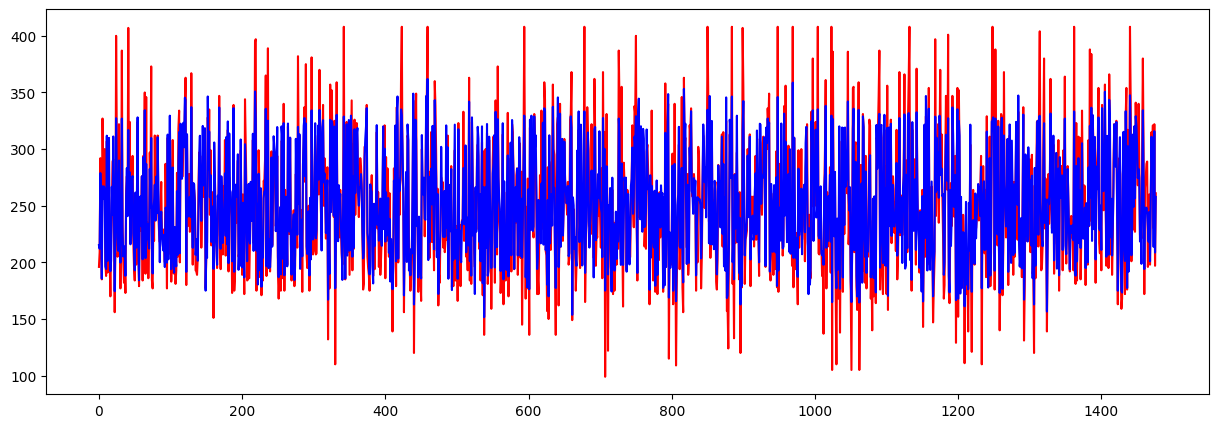

In [167]:
sub_sum_1 = 0
predicted_y_1=[]
for i in range(len(y_val)):
        for j in range(regressors):
            sub_sum_1 += b[j]*X_val[i][j]
        predicted_y_1.append(m + sub_sum_1)
        sub_sum_1 = 0
        
fir1, ax1 = plt.subplots(figsize=(15,5))
a1_1, =plt.plot(y_val, color='red')
a2_1,=plt.plot(predicted_y_1, color='blue')

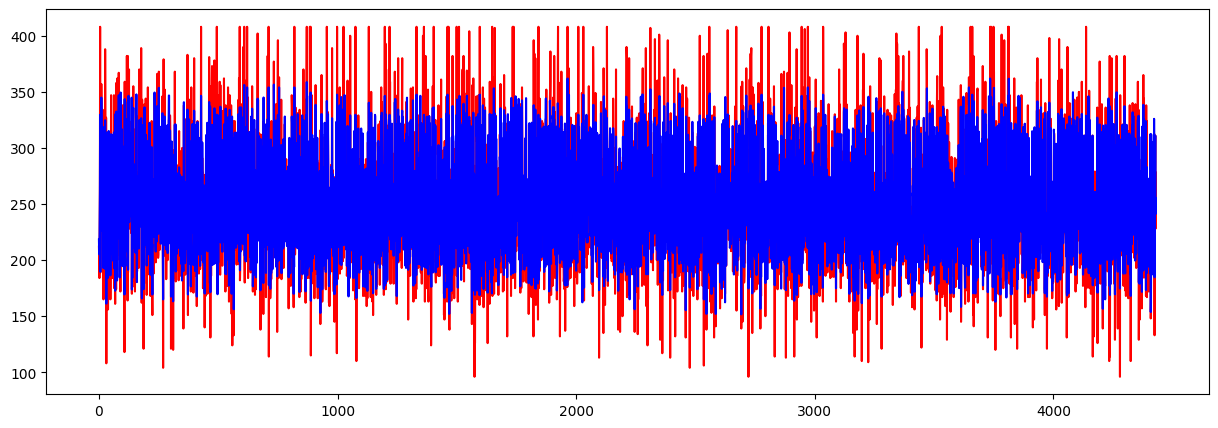

In [168]:

# Dự đoán từng giá trị trong tập X_train thêm vào mảng predicted_y
sub_sum=0
predicted_y=[]
for i in range(len(y_train)):
    for j in range(regressors):
        sub_sum += b[j]*X_train[i][j]
    predicted_y.append(m + sub_sum)
    sub_sum = 0

fir, ax = plt.subplots(figsize=(15,5))
a1, =plt.plot(y_train, color='red')
a2,=plt.plot(predicted_y, color='blue')

In [169]:
predicted_values = np.array(predicted_y)

In [170]:
predicted_values_val = np.array(predicted_y_1)

In [171]:
predicted_values_val

array([215.15537199, 212.01037369, 278.84569086, ..., 315.7792696 ,
       208.67788553, 257.77490176])

In [172]:
predicted_values

array([218.28804274, 205.90553479, 205.0908798 , ..., 311.0120796 ,
       240.93373617, 255.08351192])

In [173]:
from sklearn import metrics
print('Learning rate: ',learning_rate)
print('intercept: ', m)
print('parameters',b)
print('R square: ',metrics.r2_score(y_train, predicted_values))
print('mse: ',metrics.mean_squared_error(y_train, predicted_values))
# R square 0.82
# mae 17.84
# learning rate 0.01
# iteration 500

Learning rate:  0.01
intercept:  77.62827194284982
parameters [49.94872794941075, 58.590928693203345, 58.31982736584601, 5.422374029366011, 4.780869064951292, 40.37125002630087, 27.053778822231614, 12.094071390627178, 27.830076277477247, 24.842671711691292, -1.1784143348611873, 14.039866897915337, 25.431417249545465, 9.373376709049172, 24.349299492588454, 18.47417849166678, 12.369367397156312, 26.52189483514286, 14.140729573045208, 24.596280137505463, 0.06775193804597848]
R square:  0.8261687848179965
mse:  574.2349162965473


In [174]:
from sklearn import metrics
print('Learning rate: ',learning_rate)
print('intercept: ', m)
print('parameters',b)
print('R square: ',metrics.r2_score(y_val, predicted_values_val))
print('mse: ',metrics.mean_squared_error(y_val, predicted_values_val))
# R square 0.82
# mae 17.84
# learning rate 0.01
# iteration 500

Learning rate:  0.01
intercept:  77.62827194284982
parameters [49.94872794941075, 58.590928693203345, 58.31982736584601, 5.422374029366011, 4.780869064951292, 40.37125002630087, 27.053778822231614, 12.094071390627178, 27.830076277477247, 24.842671711691292, -1.1784143348611873, 14.039866897915337, 25.431417249545465, 9.373376709049172, 24.349299492588454, 18.47417849166678, 12.369367397156312, 26.52189483514286, 14.140729573045208, 24.596280137505463, 0.06775193804597848]
R square:  0.8333579466507529
mse:  562.8222079939977


In [175]:
# learning rate tuned
learning_rate = [0.001, 0.01, 0.04, 0.07, 0.1, 0.3, 0.4, 0.5, 0.6]
best_r_square = 0
l_rate_d={}
# tìm ra các tham số của từng lần lặp
for i in range(len(learning_rate)):
    m, b, l_rate, num_i,  = run_minimize_m_b(X_train,y_train, init_m, init_b, learning_rate[i], num_iteration )
   # Dự đoán X_test thêm vào mảng predicted_y
    sub_sum=0
    predicted_y=[]
    for i in range(len(y_val)):
        for j in range(regressors):
            sub_sum += b[j]*X_val[i][j]
        predicted_y.append(m + sub_sum)
        sub_sum = 0
    
    # Tính R square của từng lần lặp
    br = metrics.r2_score(y_val, predicted_y)
    l_rate_d[l_rate]=br
    # tìm ra r square tốt nhất -> cập nhật r square,m,b,learning rate 
    if( br > best_r_square):
        best_r_square = br
        best_m = m
        best_b = [ x for x in b]
        best_learning_rate = l_rate

# Dự đoán X_test từ các tham số tốt nhất thêm vào mảng predicted_y mới
predicted_y = []
for i in range(len(y_val)):
    for j in range(regressors):
        sub_sum += best_b[j]*X_val[i][j]
    predicted_y.append(best_m + sub_sum)
    sub_sum = 0
    
predicted_values = np.array(predicted_y)

print('learning rate and r square:',l_rate_d )
print('Number of iteration:', num_i)
print('best_learning_rate:',best_learning_rate)
print('intercept: ', best_m)
print('parameters',best_b)
print('R square: ',metrics.r2_score(y_val, predicted_values))
print('mse: ',metrics.mean_squared_error(y_val, predicted_values))
# best_learning_rate 0.3
# R square 0.96
# mse 8.61
# iteration 500

learning rate and r square: {0.001: -0.21780429376954213, 0.01: 0.8333579466507529, 0.04: 0.8927274566094441, 0.07: 0.9089618707775192, 0.1: 0.9203965410108244, 0.3: 0.9619336773264449, 0.4: 0.9715781159063724, 0.5: 0.9775896713597088, 0.6: 0.9813780055070142}
Number of iteration: 500
best_learning_rate: 0.6
intercept:  52.986467721949225
parameters [31.114934682917607, 8.192543357391996, 245.91808032909938, 49.58346290812294, -53.4650000589746, 30.10577906074093, 26.762225812059572, 11.841237943428183, 11.503394710409044, 12.406845413735583, 4.332318754828177, 12.902670899547878, 10.886697729500732, 16.882460657317544, 11.211344039427056, 14.005965295703401, 8.770323003613195, 15.743481945094711, 9.224698165824085, 19.247964607416836, -0.15806696487447386]
R square:  0.9813780055070142
mse:  62.89452060356364


In [176]:
# num_iteration tuned
learning_rate = 0.6

num_iteration = [500, 1000, 2000, 4000]

iteration_dic = {}

for i in range(len(num_iteration)):
    m, b, l_rate, num_i,  = run_minimize_m_b(X_train, y_train, init_m, init_b, learning_rate, num_iteration[i] )
   
    predicted_y = []
    sub_sum = 0
    for i in range(len(y_val)):
        for j in range(regressors):
            sub_sum += b[j]*X_val[i][j]
        predicted_y.append(m + sub_sum)
        sub_sum = 0
    
    
    r_square = metrics.r2_score(y_val, predicted_y)
    iteration_dic[num_i]=r_square
    
    if( r_square > best_r_square):
        best_r_square = r_square
        best_m = m
        best_b = [ x for x in b]
        best_num_i = num_i


predicted_y = []
sub_sum = 0
for i in range(len(y_test)):
    for j in range(regressors):
        sub_sum += best_b[j]*X_val[i][j]
    predicted_y.append(best_m + sub_sum)
    sub_sum = 0
    
predicted_values = np.array(predicted_y)

print('iteration and r square:',iteration_dic )
print('Best number of iteration:', best_num_i)
print('learning_rate:',learning_rate)
print('intercept: ', best_m)
print('parameters',best_b)
print('R square: ',metrics.r2_score(y_val, predicted_values))
print('mse: ',metrics.mean_squared_error(y_val, predicted_values))
# best number of iteration 
# R square 
# mse 
# learning rate 
# iteration

iteration and r square: {500: 0.9813780055070142, 1000: 0.9878374492245398, 2000: 0.9886285542280848, 4000: 0.9886646731237559}
Best number of iteration: 4000
learning_rate: 0.6
intercept:  43.71012247896708
parameters [6.491209050038866, 2.8083352396390535, 303.9459529765791, 57.306910032350956, -70.01588386084082, 28.693329960073285, 27.72576634738382, 8.931127833549773, 9.28137587785794, 9.445432005175583, 6.930527503278589, 9.121659259105177, 10.182215432283659, 12.44872140192921, 10.170937769276795, 10.908247875477388, 9.62201000470539, 11.409465451685353, 9.823519574922662, 12.855127447653658, -0.7435043553957816]
R square:  0.9886646731237559
mse:  38.28429602610984


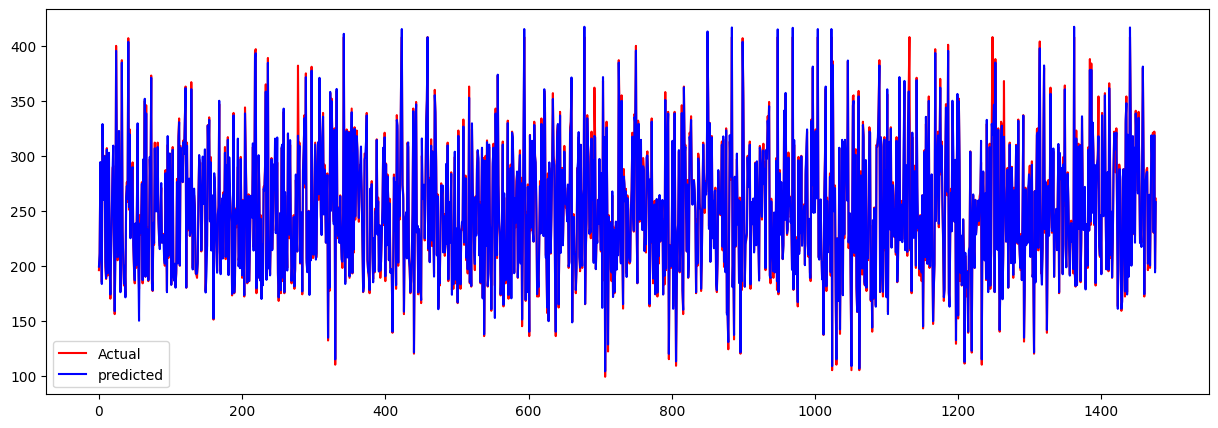

In [177]:
fir, ax = plt.subplots(figsize=(15,5))
a1, =plt.plot(y_val, color='red')
a2,=plt.plot(predicted_values, color='blue')
plt.legend([a1,a2], ["Actual", "predicted"])

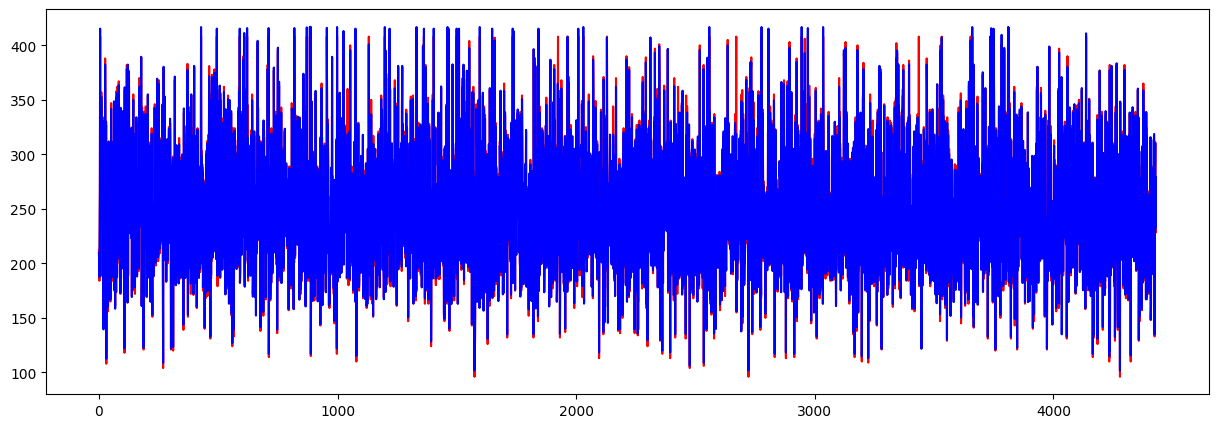

In [178]:
sub_sum_3 = 0
predicted_y_3=[]
for i in range(len(y_train)):
        for j in range(regressors):
            sub_sum_3 += best_b[j]*X_train[i][j]
        predicted_y_3.append(best_m + sub_sum_3)
        sub_sum_3 = 0
        
fir1, ax1 = plt.subplots(figsize=(15,5))
a1_1, =plt.plot(y_train, color='red')
a2_1,=plt.plot(predicted_y_3, color='blue')

In [179]:
predicted_values_train = np.array(predicted_y_3)

In [180]:
from sklearn import metrics
print('Learning rate: ',learning_rate)
print('intercept: ', best_m)
print('parameters',best_b)
print('R square: ',metrics.r2_score(y_train, predicted_values_train))
print('mse: ',metrics.mean_squared_error(y_train, predicted_values_train))

Learning rate:  0.6
intercept:  43.71012247896708
parameters [6.491209050038866, 2.8083352396390535, 303.9459529765791, 57.306910032350956, -70.01588386084082, 28.693329960073285, 27.72576634738382, 8.931127833549773, 9.28137587785794, 9.445432005175583, 6.930527503278589, 9.121659259105177, 10.182215432283659, 12.44872140192921, 10.170937769276795, 10.908247875477388, 9.62201000470539, 11.409465451685353, 9.823519574922662, 12.855127447653658, -0.7435043553957816]
R square:  0.992117128697172
mse:  26.040316970784097


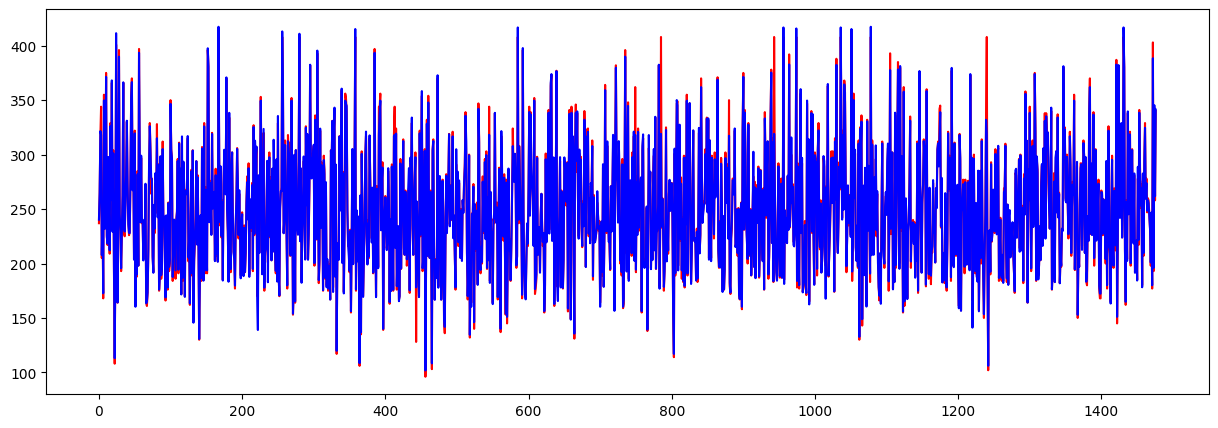

In [181]:
sub_sum_2 = 0
predicted_y_2=[]
for i in range(len(y_test)):
        for j in range(regressors):
            sub_sum_2 += best_b[j]*X_test[i][j]
        predicted_y_2.append(best_m + sub_sum_2)
        sub_sum_2 = 0
        
fir1, ax1 = plt.subplots(figsize=(15,5))
a1_1, =plt.plot(y_test, color='red')
a2_1,=plt.plot(predicted_y_2, color='blue')

In [182]:
predicted_values_test = np.array(predicted_y_2)

In [183]:
from sklearn import metrics
print('Learning rate: ',learning_rate)
print('intercept: ', best_m)
print('parameters',best_b)
print('R square: ',metrics.r2_score(y_test, predicted_values_test))
print('mse: ',metrics.mean_squared_error(y_test, predicted_values_test))


Learning rate:  0.6
intercept:  43.71012247896708
parameters [6.491209050038866, 2.8083352396390535, 303.9459529765791, 57.306910032350956, -70.01588386084082, 28.693329960073285, 27.72576634738382, 8.931127833549773, 9.28137587785794, 9.445432005175583, 6.930527503278589, 9.121659259105177, 10.182215432283659, 12.44872140192921, 10.170937769276795, 10.908247875477388, 9.62201000470539, 11.409465451685353, 9.823519574922662, 12.855127447653658, -0.7435043553957816]
R square:  0.9868052034075503
mse:  42.460615614778106


Feature: 0, Score: 6.49121
Feature: 1, Score: 2.80834
Feature: 2, Score: 303.94595
Feature: 3, Score: 57.30691
Feature: 4, Score: -70.01588
Feature: 5, Score: 28.69333
Feature: 6, Score: 27.72577
Feature: 7, Score: 8.93113
Feature: 8, Score: 9.28138
Feature: 9, Score: 9.44543
Feature: 10, Score: 6.93053
Feature: 11, Score: 9.12166
Feature: 12, Score: 10.18222
Feature: 13, Score: 12.44872
Feature: 14, Score: 10.17094
Feature: 15, Score: 10.90825
Feature: 16, Score: 9.62201
Feature: 17, Score: 11.40947
Feature: 18, Score: 9.82352
Feature: 19, Score: 12.85513
Feature: 20, Score: -0.74350


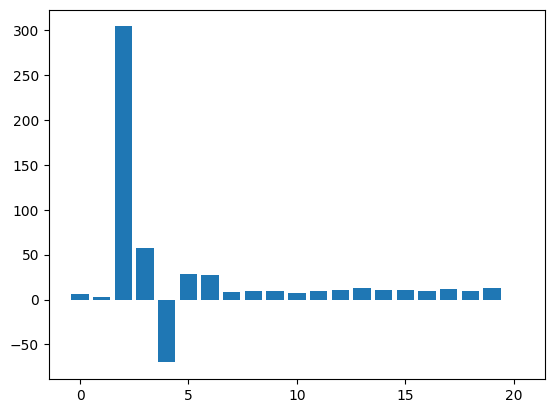

In [184]:
from matplotlib import pyplot
importance = best_b
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [185]:
# KNN regression
# Tính khoảng cách từ điểm cần dự đoán trong tập X_test đến tất cả điểm trong tập X_train
# Khoảng cách Euclid
def compute_distances(train_matrix, query_vector):
    diff = np.array((train_matrix - query_vector), dtype=np.float64)
    distances = np.sqrt(np.sum(diff**2, axis=1))
    return distances


In [186]:
# Tìm k điểm gần nhất với điểm cần dự đoán X_test trong X_train dựa vào khoảng cách từ điểm cần dự đoán đến tất cả điểm trong X_train
def compute_k_nearest_neighbors(k, features_matrix, feature_vector):
    distances = compute_distances(features_matrix, feature_vector)
    return np.argsort(distances, axis = 0)[:k]

In [187]:
# Dự đoán 1 điểm X_test từ k điểm gần nhất trong X_train và tính trung bình cộng các giá trị y_train của k điểm đó
def compute_distances_k_avg(k, features_matrix, output_values, feature_vector):
    k_neigbors = compute_k_nearest_neighbors(k, features_matrix, feature_vector)
    avg_value = np.mean(output_values[k_neigbors])
    return avg_value 

In [188]:
# Dự đoán cho nhiều điểm trong X_test từ k điểm gần nhất trong X_train
def compute_distances_k_all(k, features_matrix, output_values, feature_vector):
    num_of_rows = feature_vector.shape[0]
    predicted_values = []
    for i in range(num_of_rows):
        avg_value = compute_distances_k_avg(k, X_train, y_train, X_test[i])
        predicted_values.append(avg_value)
    return predicted_values

In [189]:
# Dự đoán cho tập X_test với k = 10
#predicted_values = compute_distances_k_all(10, X_train, y_train, X_test)
#predicted_values

In [190]:
#print('R square: ',metrics.r2_score(y_test, predicted_values))
#print('mse: ',metrics.mean_squared_error(y_test, predicted_values))

In [191]:
mse_all = []
for k in range(1,30):    
    predict_value = compute_distances_k_all(k, X_train, y_train, X_val)
    mse = metrics.mean_squared_error(y_val, predict_value)
    mse_all.append(mse)

In [192]:
# Tham số k có lỗi bình phương nhỏ nhất k = 28
mse_all.index(min(mse_all))

28

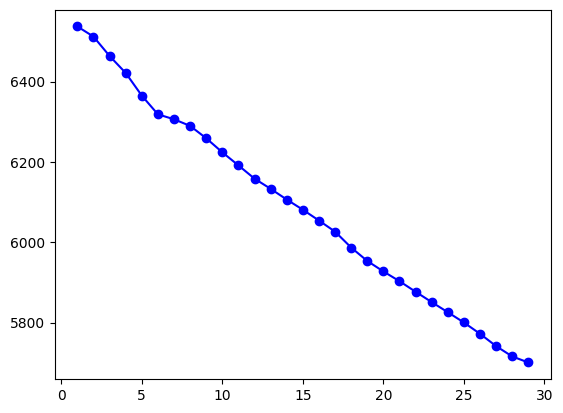

In [193]:
kvals = range(1, 30)
plt.plot(kvals, mse_all,'bo-')

In [194]:
# Dự đoán cho tập X_test và lỗi bình phương 
predict_value = compute_distances_k_all(28, X_train, y_train, X_test)
mse_1 = metrics.mean_squared_error(y_test, predict_value)
mse

5700.902255511985

In [195]:
print('R square: ',metrics.r2_score(y_test, predict_value))
print('mse: ',metrics.mean_squared_error(y_test, predict_value))

R square:  0.8571164601518141
mse:  459.79663427659483


In [235]:
from sklearn.svm import LinearSVR

In [236]:
eps = 0.01
svr = LinearSVR(epsilon=eps, C=1, fit_intercept=True)

In [237]:
svr.fit(X_train, y_train)

LinearSVR(C=1, epsilon=0.01)

In [238]:

print("C: {}".format(svr.C))
print("Epsilon: {}".format(svr.epsilon))
    
print("Intercept:",svr.intercept_)
print("Coefficient:",svr.coef_)
    
mse = metrics.mean_squared_error(y_val, svr.predict(X_val))
r2_score = metrics.r2_score(y_val, svr.predict(X_val))
print("MSE ",mse)
print("R square", r2_score)    
perc_within_eps = 100*np.sum(y_val - svr.predict(X_val) < eps) / len(y_val)
print("Percentage within Epsilon = {:,.2f}%".format(perc_within_eps))
    
    # Plot outputs
#plt.figure(figsize=(10,7))
#plt.scatter(X_train, y_train)
#plt.plot(X_test, svr.predict(X_test), color='red')
#plt.plot(X_test, svr.predict(X_test)+eps, color='black')
#plt.plot(X_test, svr.predict(X_test)-eps, color='black')
#plt.xlabel('# of Rooms')
#plt.ylabel('House Price (Thousands of Dollars)')
#plt.title('SVR Prediction')
#plt.show()

C: 1
Epsilon: 0.01
Intercept: [55.01141701]
Coefficient: [ 2.78465956e+01  1.45663146e+01  2.33121966e+02  4.33839881e+01
 -4.67035121e+01  3.12361308e+01  2.70948102e+01  1.23866854e+01
  1.22628481e+01  1.28055537e+01  5.08440640e+00  1.24719235e+01
  1.13797732e+01  1.89272526e+01  1.15660577e+01  1.31383335e+01
  8.38067132e+00  1.63828451e+01  9.75516455e+00  2.04927360e+01
 -1.74239911e-01]
MSE  75.38215926079604
R square 0.9776806287550527
Percentage within Epsilon = 50.64%


In [239]:

print("C: {}".format(svr.C))
print("Epsilon: {}".format(svr.epsilon))
    
print("Intercept:",svr.intercept_)
print("Coefficient:",svr.coef_)
    
mse = metrics.mean_squared_error(y_train, svr.predict(X_train))
r2_score = metrics.r2_score(y_train, svr.predict(X_train))
print("MSE ",mse)
print("R square", r2_score)    
perc_within_eps = 100*np.sum(y_train - svr.predict(X_train) < eps) / len(y_train)
print("Percentage within Epsilon = {:,.2f}%".format(perc_within_eps))

C: 1
Epsilon: 0.01
Intercept: [55.01141701]
Coefficient: [ 2.78465956e+01  1.45663146e+01  2.33121966e+02  4.33839881e+01
 -4.67035121e+01  3.12361308e+01  2.70948102e+01  1.23866854e+01
  1.22628481e+01  1.28055537e+01  5.08440640e+00  1.24719235e+01
  1.13797732e+01  1.89272526e+01  1.15660577e+01  1.31383335e+01
  8.38067132e+00  1.63828451e+01  9.75516455e+00  2.04927360e+01
 -1.74239911e-01]
MSE  68.17443968048902
R square 0.9793623735553351
Percentage within Epsilon = 49.21%


In [240]:
eps = 0.01
svr_high_C = LinearSVR(epsilon=eps, C=10, fit_intercept=True)

In [241]:
svr_high_C.fit(X_train, y_train)

LinearSVR(C=10, epsilon=0.01)

In [245]:
print("C: {}".format(svr_high_C.C))
print("Epsilon: {}".format(svr_high_C.epsilon))
    
print("Intercept:",svr_high_C.intercept_)
print("Coefficient:",svr_high_C.coef_)
    
mse = metrics.mean_squared_error(y_val, svr_high_C.predict(X_val))
r2_score = metrics.r2_score(y_val, svr_high_C.predict(X_val))
print("MSE ",mse)
print("R square", r2_score)    
perc_within_eps = 100*np.sum(y_val - svr_high_C.predict(X_val) < eps) / len(y_val)
print("Percentage within Epsilon = {:,.2f}%".format(perc_within_eps))

C: 10
Epsilon: 0.01
Intercept: [41.11942476]
Coefficient: [  1.65243701   1.81437865 318.58931391  59.90621645 -75.99973769
  28.70498195  28.50796405   8.28951475   8.60251523   8.73102936
   7.15277779   8.34358763   9.74732409  11.36386605   9.75986714
  10.24836748   9.53935397  10.41741343   9.83567292  11.32698444
  -1.9130279 ]
MSE  38.2749960925373
R square 0.9886674266754185
Percentage within Epsilon = 51.18%


In [246]:
from sklearn.metrics import mean_squared_error

In [247]:
test_mse_list = []
perc_within_eps_list = []

eps = 0.01
c_space = np.linspace(0.01, 10)

for c in c_space:
    varied_svr = LinearSVR(epsilon=eps, C=c, fit_intercept=True)
    
    varied_svr.fit(X_train, y_train)
    
    test_mse = mean_squared_error(y_val, varied_svr.predict(X_val))
    test_mse_list.append(test_mse)
    
    perc_within_eps = 100*np.sum(abs(y_val-varied_svr.predict(X_val)) <= eps) / len(y_val)
    perc_within_eps_list.append(perc_within_eps)

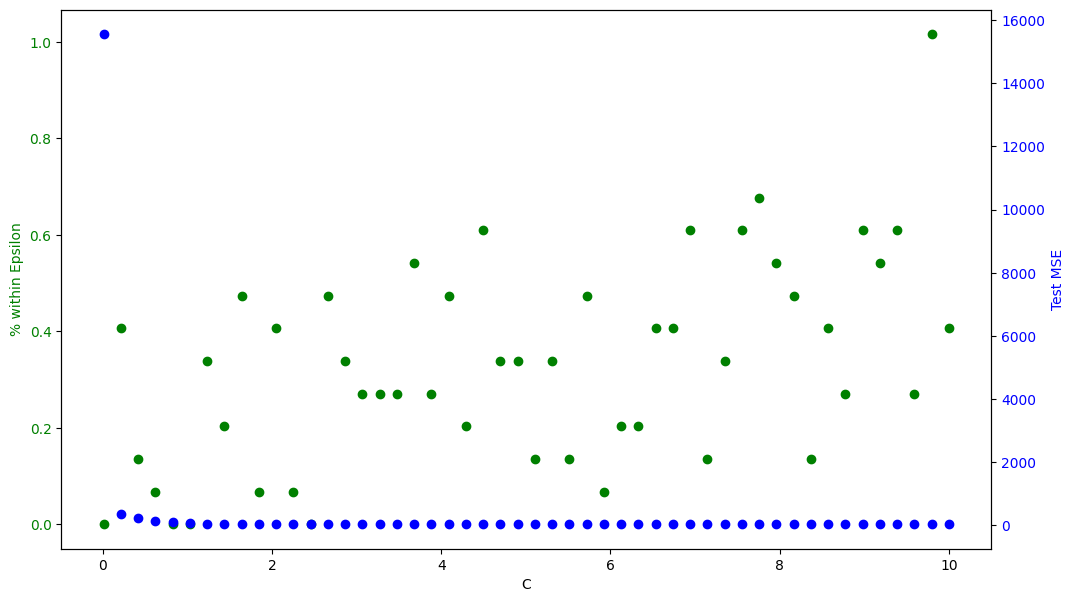

In [248]:
fig, ax1 = plt.subplots(figsize=(12,7))

color='green'
ax1.set_xlabel('C')
ax1.set_ylabel('% within Epsilon', color=color)
ax1.scatter(c_space, perc_within_eps_list, color=color)
ax1.tick_params(axis='y', labelcolor=color)

color='blue'
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Test MSE', color=color)  # we already handled the x-label with ax1
ax2.scatter(c_space, test_mse_list, color=color)
ax2.tick_params(axis='y', labelcolor=color)


In [249]:
m = max(perc_within_eps_list)
inds = [i for i, j in enumerate(perc_within_eps_list) if j == m]
C = c_space[inds[0]]

print("best C =", C)

best C = 9.796122448979592


In [250]:
eps = 0.01
svr_best_C = LinearSVR(epsilon=eps, C=C, fit_intercept=True)
svr_best_C.fit(X_train, y_train)


LinearSVR(C=9.796122448979592, epsilon=0.01)

In [251]:
print("C: {}".format(svr_best_C.C))
print("Epsilon: {}".format(svr_best_C.epsilon))
    
print("Intercept:",svr_best_C.intercept_)
print("Coefficient:",svr_best_C.coef_)
    
mse = metrics.mean_squared_error(y_val, svr_best_C.predict(X_val))
r2_score = metrics.r2_score(y_val, svr_best_C.predict(X_val))
print("MSE ",mse)
print("R square", r2_score)    
perc_within_eps = 100*np.sum(y_val - svr_best_C.predict(X_val) < eps) / len(y_val)
print("Percentage within Epsilon = {:,.2f}%".format(perc_within_eps))

C: 9.796122448979592
Epsilon: 0.01
Intercept: [41.11930677]
Coefficient: [  1.60626975   1.88946639 318.53037189  59.89002262 -75.96300704
  28.68971055  28.50258065   8.28418986   8.61679729   8.72987436
   7.13184999   8.35659527   9.74064518  11.38871638   9.74727117
  10.24267404   9.55195253  10.40445991   9.81225108  11.35064325
  -1.84996153]
MSE  38.241968203665834
R square 0.9886772056698171
Percentage within Epsilon = 50.85%


In [252]:
print("C: {}".format(svr_best_C.C))
print("Epsilon: {}".format(svr_best_C.epsilon))
    
print("Intercept:",svr_best_C.intercept_)
print("Coefficient:",svr_best_C.coef_)
    
mse = metrics.mean_squared_error(y_train, svr_best_C.predict(X_train))
r2_score = metrics.r2_score(y_train, svr_best_C.predict(X_train))
print("MSE ",mse)
print("R square", r2_score)    
perc_within_eps = 100*np.sum(y_train - svr_best_C.predict(X_train) < eps) / len(y_train)
print("Percentage within Epsilon = {:,.2f}%".format(perc_within_eps))

C: 9.796122448979592
Epsilon: 0.01
Intercept: [41.11930677]
Coefficient: [  1.60626975   1.88946639 318.53037189  59.89002262 -75.96300704
  28.68971055  28.50258065   8.28418986   8.61679729   8.72987436
   7.13184999   8.35659527   9.74064518  11.38871638   9.74727117
  10.24267404   9.55195253  10.40445991   9.81225108  11.35064325
  -1.84996153]
MSE  25.912992293193092
R square 0.9921556721622246
Percentage within Epsilon = 50.68%


In [253]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

In [254]:
grid = {
    'C': np.linspace(0.01, 10),
    'epsilon': np.linspace(0.01, 10)
}
    
svr_gridsearch =  LinearSVR(fit_intercept=True)

In [255]:
grid_svr = GridSearchCV(svr_gridsearch, grid, scoring='neg_mean_squared_error', cv=5)

In [256]:
grid_svr.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LinearSVR(),
             param_grid={'C': array([ 0.01      ,  0.21387755,  0.4177551 ,  0.62163265,  0.8255102 ,
        1.02938776,  1.23326531,  1.43714286,  1.64102041,  1.84489796,
        2.04877551,  2.25265306,  2.45653061,  2.66040816,  2.86428571,
        3.06816327,  3.27204082,  3.47591837,  3.67979592,  3.88367347,
        4.08755102,  4.29142857,  4.49530612,  4.69918367,  4.90306122,
        5.10693878,  5.3108163...
        4.08755102,  4.29142857,  4.49530612,  4.69918367,  4.90306122,
        5.10693878,  5.31081633,  5.51469388,  5.71857143,  5.92244898,
        6.12632653,  6.33020408,  6.53408163,  6.73795918,  6.94183673,
        7.14571429,  7.34959184,  7.55346939,  7.75734694,  7.96122449,
        8.16510204,  8.36897959,  8.57285714,  8.77673469,  8.98061224,
        9.1844898 ,  9.38836735,  9.5922449 ,  9.79612245, 10.        ])},
             scoring='neg_mean_squared_error')

In [257]:
best_grid_svr_mse = grid_svr.best_estimator_
best_grid_svr_mse.fit(X_train, y_train)

LinearSVR(C=8.980612244897959, epsilon=2.864285714285714)

In [261]:
print("C: {}".format(best_grid_svr_mse.C))
print("Epsilon: {}".format(best_grid_svr_mse.epsilon))
    
print("Intercept:",best_grid_svr_mse.intercept_)
print("Coefficient:",best_grid_svr_mse.coef_)
    
mse = metrics.mean_squared_error(y_val, best_grid_svr_mse.predict(X_val))
r2_score = metrics.r2_score(y_val, best_grid_svr_mse.predict(X_val))
print("MSE ",mse)
print("R square", r2_score)    
perc_within_eps = 100*np.sum(y_val - best_grid_svr_mse.predict(X_val) < eps) / len(y_val)
print("Percentage within Epsilon = {:,.2f}%".format(perc_within_eps))

C: 8.980612244897959
Epsilon: 2.864285714285714
Intercept: [41.55078887]
Coefficient: [  1.19805113   1.94301024 316.41106157  58.99646644 -73.63132643
  28.27123438  27.91441449   8.45678571   8.53718294   8.56234679
   7.56014773   8.43432571  10.11860475  11.484263     9.85236294
  10.09555819   9.79605098  10.59975637   9.95169075  11.20329078
  -1.20292903]
MSE  37.86094803171124
R square 0.9887900192420609
Percentage within Epsilon = 41.03%


In [262]:
grid = {
    'C': np.linspace(0.01, 10),
    'epsilon': np.linspace(0.01, 10)
}
    
svr_gridsearch =  LinearSVR(fit_intercept=True)

In [263]:
from sklearn.metrics import make_scorer

In [264]:
def frac_within_eps(y_true, y_pred):
    return np.sum(abs(y_true-y_pred) <= eps) / len(y_true)

my_scorer = make_scorer(frac_within_eps, greater_is_better=True)

In [265]:
grid_svr_eps = GridSearchCV(svr_gridsearch, grid, scoring=my_scorer, cv=5)

In [266]:
grid_svr_eps.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LinearSVR(),
             param_grid={'C': array([ 0.01      ,  0.21387755,  0.4177551 ,  0.62163265,  0.8255102 ,
        1.02938776,  1.23326531,  1.43714286,  1.64102041,  1.84489796,
        2.04877551,  2.25265306,  2.45653061,  2.66040816,  2.86428571,
        3.06816327,  3.27204082,  3.47591837,  3.67979592,  3.88367347,
        4.08755102,  4.29142857,  4.49530612,  4.69918367,  4.90306122,
        5.10693878,  5.3108163...
        4.08755102,  4.29142857,  4.49530612,  4.69918367,  4.90306122,
        5.10693878,  5.31081633,  5.51469388,  5.71857143,  5.92244898,
        6.12632653,  6.33020408,  6.53408163,  6.73795918,  6.94183673,
        7.14571429,  7.34959184,  7.55346939,  7.75734694,  7.96122449,
        8.16510204,  8.36897959,  8.57285714,  8.77673469,  8.98061224,
        9.1844898 ,  9.38836735,  9.5922449 ,  9.79612245, 10.        ])},
             scoring=make_scorer(frac_within_eps))

In [267]:
best_grid_svr_eps = grid_svr_eps.best_estimator_

In [268]:
best_grid_svr_eps.fit(X_train, y_train)

LinearSVR(C=3.068163265306122, epsilon=0.01)

In [270]:
print("C: {}".format(best_grid_svr_eps.C))
print("Epsilon: {}".format(best_grid_svr_eps.epsilon))
    
print("Intercept:",best_grid_svr_eps.intercept_)
print("Coefficient:",best_grid_svr_eps.coef_)
    
mse = metrics.mean_squared_error(y_val, best_grid_svr_eps.predict(X_val))
r2_score = metrics.r2_score(y_val, best_grid_svr_eps.predict(X_val))
print("MSE ",mse)
print("R square", r2_score)    
perc_within_eps = 100*np.sum(y_val - best_grid_svr_eps.predict(X_val) < eps) / len(y_val)
print("Percentage within Epsilon = {:,.2f}%".format(perc_within_eps))

C: 3.068163265306122
Epsilon: 0.01
Intercept: [44.39693664]
Coefficient: [  6.25581838   4.91815103 300.45044131  56.31103521 -68.34828549
  28.70994383  27.7242431    8.82617217   9.46316676   9.65232226
   7.03742115   9.4178543    9.90897191  13.1839421   10.16525009
  11.13877255   9.34400266  11.92662529   9.80572263  13.32058605
  -0.60535566]
MSE  39.01202785186256
R square 0.9884492041461489
Percentage within Epsilon = 51.79%


In [271]:
print("C: {}".format(best_grid_svr_eps.C))
print("Epsilon: {}".format(best_grid_svr_eps.epsilon))
    
print("Intercept:",best_grid_svr_eps.intercept_)
print("Coefficient:",best_grid_svr_eps.coef_)
    
mse = metrics.mean_squared_error(y_train, best_grid_svr_eps.predict(X_train))
r2_score = metrics.r2_score(y_train, best_grid_svr_eps.predict(X_train))
print("MSE ",mse)
print("R square", r2_score)    
perc_within_eps = 100*np.sum(y_train - best_grid_svr_eps.predict(X_train) < eps) / len(y_train)
print("Percentage within Epsilon = {:,.2f}%".format(perc_within_eps))

C: 3.068163265306122
Epsilon: 0.01
Intercept: [44.39693664]
Coefficient: [  6.25581838   4.91815103 300.45044131  56.31103521 -68.34828549
  28.70994383  27.7242431    8.82617217   9.46316676   9.65232226
   7.03742115   9.4178543    9.90897191  13.1839421   10.16525009
  11.13877255   9.34400266  11.92662529   9.80572263  13.32058605
  -0.60535566]
MSE  26.856273895237024
R square 0.9918701238918414
Percentage within Epsilon = 50.38%


In [272]:
print("C: {}".format(best_grid_svr_eps.C))
print("Epsilon: {}".format(best_grid_svr_eps.epsilon))
    
print("Intercept:",best_grid_svr_eps.intercept_)
print("Coefficient:",best_grid_svr_eps.coef_)
    
mse = metrics.mean_squared_error(y_test, best_grid_svr_eps.predict(X_test))
r2_score = metrics.r2_score(y_test, best_grid_svr_eps.predict(X_test))
print("MSE ",mse)
print("R square", r2_score)    
perc_within_eps = 100*np.sum(y_test - best_grid_svr_eps.predict(X_test) < eps) / len(y_test)
print("Percentage within Epsilon = {:,.2f}%".format(perc_within_eps))

C: 3.068163265306122
Epsilon: 0.01
Intercept: [44.39693664]
Coefficient: [  6.25581838   4.91815103 300.45044131  56.31103521 -68.34828549
  28.70994383  27.7242431    8.82617217   9.46316676   9.65232226
   7.03742115   9.4178543    9.90897191  13.1839421   10.16525009
  11.13877255   9.34400266  11.92662529   9.80572263  13.32058605
  -0.60535566]
MSE  43.19437510836534
R square 0.9865771848749529
Percentage within Epsilon = 50.03%


In [295]:
eps = 0.1
svr_high_C_1 = LinearSVR(epsilon=eps, C=100, fit_intercept=True)

In [296]:
svr_high_C_1.fit(X_train, y_train)

LinearSVR(C=100, epsilon=0.1)

In [306]:
print("C: {}".format(svr_high_C_1.C))
print("Epsilon: {}".format(svr_high_C_1.epsilon))
    
print("Intercept:",svr_high_C_1.intercept_)
print("Coefficient:",svr_high_C_1.coef_)
    
mse = metrics.mean_squared_error(y_test, svr_high_C_1.predict(X_test))
r2_score = metrics.r2_score(y_test, svr_high_C_1.predict(X_test))
print("MSE ",mse)
print("R square", r2_score)    
perc_within_eps = 100*np.sum(y_test - svr_high_C_1.predict(X_test) < eps) / len(y_test)
print("Percentage within Epsilon = {:,.2f}%".format(perc_within_eps))

C: 100
Epsilon: 0.1
Intercept: [40.02145976]
Coefficient: [-1.67543837e-01  1.09850224e+00  3.24219936e+02  6.09259009e+01
 -7.84153588e+01  2.87911490e+01  2.87197687e+01  8.06078765e+00
  8.25852661e+00  8.37247186e+00  7.58953237e+00  7.74014127e+00
  9.65979067e+00  1.06847021e+01  9.76714343e+00  9.90982359e+00
  9.39133374e+00  9.86712042e+00  9.86698226e+00  1.08960233e+01
 -1.78759779e+01]
MSE  43.29893539320346
R square 0.9865446923717212
Percentage within Epsilon = 49.36%


In [305]:
print("C: {}".format(svr_high_C_1.C))
print("Epsilon: {}".format(svr_high_C_1.epsilon))
    
print("Intercept:",svr_high_C_1.intercept_)
print("Coefficient:",svr_high_C_1.coef_)
    
mse = metrics.mean_squared_error(y_val, svr_high_C_1.predict(X_val))
r2_score = metrics.r2_score(y_val, svr_high_C_1.predict(X_val))
print("MSE ",mse)
print("R square", r2_score)    
perc_within_eps = 100*np.sum(y_val - svr_high_C_1.predict(X_val) < eps) / len(y_val)
print("Percentage within Epsilon = {:,.2f}%".format(perc_within_eps))

C: 100
Epsilon: 0.1
Intercept: [40.02145976]
Coefficient: [-1.67543837e-01  1.09850224e+00  3.24219936e+02  6.09259009e+01
 -7.84153588e+01  2.87911490e+01  2.87197687e+01  8.06078765e+00
  8.25852661e+00  8.37247186e+00  7.58953237e+00  7.74014127e+00
  9.65979067e+00  1.06847021e+01  9.76714343e+00  9.90982359e+00
  9.39133374e+00  9.86712042e+00  9.86698226e+00  1.08960233e+01
 -1.78759779e+01]
MSE  38.805314342439125
R square 0.9885104084895029
Percentage within Epsilon = 49.36%


In [307]:
print("C: {}".format(svr_high_C_1.C))
print("Epsilon: {}".format(svr_high_C_1.epsilon))
    
print("Intercept:",svr_high_C_1.intercept_)
print("Coefficient:",svr_high_C_1.coef_)
    
mse = metrics.mean_squared_error(y_train, svr_high_C_1.predict(X_train))
r2_score = metrics.r2_score(y_train, svr_high_C_1.predict(X_train))
print("R square", r2_score)    
perc_within_eps = 100*np.sum(y_train - svr_high_C_1.predict(X_train) < eps) / len(y_train)
print("Percentage within Epsilon = {:,.2f}%".format(perc_within_eps))

C: 100
Epsilon: 0.1
Intercept: [40.02145976]
Coefficient: [-1.67543837e-01  1.09850224e+00  3.24219936e+02  6.09259009e+01
 -7.84153588e+01  2.87911490e+01  2.87197687e+01  8.06078765e+00
  8.25852661e+00  8.37247186e+00  7.58953237e+00  7.74014127e+00
  9.65979067e+00  1.06847021e+01  9.76714343e+00  9.90982359e+00
  9.39133374e+00  9.86712042e+00  9.86698226e+00  1.08960233e+01
 -1.78759779e+01]
R square 0.9919724408477874
Percentage within Epsilon = 49.80%


In [379]:
eps = 10
svr_high_C_2 = LinearSVR(epsilon=eps, C=100, fit_intercept=True)

In [380]:
svr_high_C_2.fit(X_train, y_train)

LinearSVR(C=100, epsilon=10)

In [381]:
print("C: {}".format(svr_high_C_2.C))
print("Epsilon: {}".format(svr_high_C_2.epsilon))
    
print("Intercept:",svr_high_C_2.intercept_)
print("Coefficient:",svr_high_C_2.coef_)
    
mse = metrics.mean_squared_error(y_test, svr_high_C_2.predict(X_test))
r2_score = metrics.r2_score(y_test, svr_high_C_2.predict(X_test))
print("MSE ",mse)
print("R square", r2_score)    
perc_within_eps = 100*np.sum(y_test - svr_high_C_2.predict(X_test) < eps) / len(y_test)
print("Percentage within Epsilon = {:,.2f}%".format(perc_within_eps))

C: 100
Epsilon: 10
Intercept: [45.66341137]
Coefficient: [ 18.42963949  -8.41290417 295.52556384  56.24346271 -69.45865659
  31.20463804  27.67396721   9.02490069  10.11870014  10.48040445
   7.35340894   8.68599715  11.24202124  10.68971148  10.93005461
  12.80162404  10.07457433  12.28690997  10.24928422  13.05264285
  -3.8496614 ]
MSE  49.61901551115295
R square 0.9845807036165674
Percentage within Epsilon = 97.90%


In [382]:
print("C: {}".format(svr_high_C_2.C))
print("Epsilon: {}".format(svr_high_C_2.epsilon))
    
print("Intercept:",svr_high_C_2.intercept_)
print("Coefficient:",svr_high_C_2.coef_)
    
mse = metrics.mean_squared_error(y_train, svr_high_C_2.predict(X_train))
r2_score = metrics.r2_score(y_train, svr_high_C_2.predict(X_train))
print("MSE ",mse)
print("R square", r2_score)    
perc_within_eps = 100*np.sum(y_train - svr_high_C_2.predict(X_train) < eps) / len(y_train)
print("Percentage within Epsilon = {:,.2f}%".format(perc_within_eps))

C: 100
Epsilon: 10
Intercept: [45.66341137]
Coefficient: [ 18.42963949  -8.41290417 295.52556384  56.24346271 -69.45865659
  31.20463804  27.67396721   9.02490069  10.11870014  10.48040445
   7.35340894   8.68599715  11.24202124  10.68971148  10.93005461
  12.80162404  10.07457433  12.28690997  10.24928422  13.05264285
  -3.8496614 ]
MSE  32.66665634390914
R square 0.9901112168434179
Percentage within Epsilon = 98.19%


In [383]:
print("C: {}".format(svr_high_C_2.C))
print("Epsilon: {}".format(svr_high_C_2.epsilon))
    
print("Intercept:",svr_high_C_2.intercept_)
print("Coefficient:",svr_high_C_2.coef_)
    
mse = metrics.mean_squared_error(y_val, svr_high_C_2.predict(X_val))
r2_score = metrics.r2_score(y_val, svr_high_C_2.predict(X_val))
print("MSE ",mse)
print("R square", r2_score)    
perc_within_eps = 100*np.sum(y_val - svr_high_C_2.predict(X_val) < eps) / len(y_val)
print("Percentage within Epsilon = {:,.2f}%".format(perc_within_eps))

C: 100
Epsilon: 10
Intercept: [45.66341137]
Coefficient: [ 18.42963949  -8.41290417 295.52556384  56.24346271 -69.45865659
  31.20463804  27.67396721   9.02490069  10.11870014  10.48040445
   7.35340894   8.68599715  11.24202124  10.68971148  10.93005461
  12.80162404  10.07457433  12.28690997  10.24928422  13.05264285
  -3.8496614 ]
MSE  44.930765060839114
R square 0.9866967670394934
Percentage within Epsilon = 98.17%


In [344]:
eps = 10
svr_high_C_3 = LinearSVR(epsilon=eps, C=0.1, fit_intercept=True)

In [345]:
svr_high_C_3.fit(X_train, y_train)

LinearSVR(C=0.1, epsilon=10)

In [346]:
print("C: {}".format(svr_high_C_3.C))
print("Epsilon: {}".format(svr_high_C_3.epsilon))
    
print("Intercept:",svr_high_C_2.intercept_)
print("Coefficient:",svr_high_C_2.coef_)
    
mse = metrics.mean_squared_error(y_train, svr_high_C_3.predict(X_train))
r2_score = metrics.r2_score(y_train, svr_high_C_3.predict(X_train))
print("MSE ",mse)
print("R square", r2_score)    
perc_within_eps = 100*np.sum(y_train - svr_high_C_3.predict(X_train) < eps) / len(y_train)
print("Percentage within Epsilon = {:,.2f}%".format(perc_within_eps))

C: 0.1
Epsilon: 10
Intercept: [62.67393176]
Coefficient: [ 3.92088599e+01  2.90028852e+01  1.80726600e+02  3.86358090e+01
 -3.48716176e+01  3.20052912e+01  2.69044491e+01  1.41276030e+01
  1.47710260e+01  1.61492615e+01  1.34684209e-01  1.74913570e+01
  1.22567740e+01  2.03788641e+01  1.28591978e+01  1.71790958e+01
  8.16604273e+00  2.03375815e+01  9.20541909e+00  2.49648884e+01
 -5.64879971e-02]
MSE  558.2544284457986
R square 0.8310063652984951
Percentage within Epsilon = 63.00%


In [347]:
print("C: {}".format(svr_high_C_3.C))
print("Epsilon: {}".format(svr_high_C_3.epsilon))
    
print("Intercept:",svr_high_C_3.intercept_)
print("Coefficient:",svr_high_C_3.coef_)
    
mse = metrics.mean_squared_error(y_val, svr_high_C_3.predict(X_val))
r2_score = metrics.r2_score(y_val, svr_high_C_3.predict(X_val))
print("MSE ",mse)
print("R square", r2_score)    
perc_within_eps = 100*np.sum(y_val - svr_high_C_3.predict(X_val) < eps) / len(y_val)
print("Percentage within Epsilon = {:,.2f}%".format(perc_within_eps))

C: 0.1
Epsilon: 10
Intercept: [75.69661628]
Coefficient: [ 4.79435129e+01  5.43864635e+01  6.55684862e+01  9.00016525e+00
  1.34631566e+00  3.74633627e+01  2.78867727e+01  1.41825553e+01
  2.28362981e+01  2.29577367e+01 -6.48252233e-01  1.63682784e+01
  2.25632898e+01  1.11000000e+01  2.19027952e+01  2.01305312e+01
  9.47090039e+00  2.70994966e+01  1.21339543e+01  2.69922650e+01
  6.42847499e-02]
MSE  543.0124611851176
R square 0.8392232747022638
Percentage within Epsilon = 63.91%


In [348]:
print("C: {}".format(svr_high_C_3.C))
print("Epsilon: {}".format(svr_high_C_3.epsilon))
    
print("Intercept:",svr_high_C_3.intercept_)
print("Coefficient:",svr_high_C_3.coef_)
    
mse = metrics.mean_squared_error(y_test, svr_high_C_3.predict(X_test))
r2_score = metrics.r2_score(y_test, svr_high_C_3.predict(X_test))
print("MSE ",mse)
print("R square", r2_score)    
perc_within_eps = 100*np.sum(y_test - svr_high_C_3.predict(X_test) < eps) / len(y_test)
print("Percentage within Epsilon = {:,.2f}%".format(perc_within_eps))

C: 0.1
Epsilon: 10
Intercept: [75.69661628]
Coefficient: [ 4.79435129e+01  5.43864635e+01  6.55684862e+01  9.00016525e+00
  1.34631566e+00  3.74633627e+01  2.78867727e+01  1.41825553e+01
  2.28362981e+01  2.29577367e+01 -6.48252233e-01  1.63682784e+01
  2.25632898e+01  1.11000000e+01  2.19027952e+01  2.01305312e+01
  9.47090039e+00  2.70994966e+01  1.21339543e+01  2.69922650e+01
  6.42847499e-02]
MSE  561.7147102511873
R square 0.825445033298772
Percentage within Epsilon = 64.05%


In [384]:
from sklearn.ensemble import RandomForestRegressor

In [385]:
rf_model = RandomForestRegressor(random_state = 42)

In [386]:
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [387]:
y_pred = rf_model.predict(X_val)

In [391]:
mse_val = metrics.mean_squared_error(y_val, y_pred)
mse_val

12.896949318884246

In [392]:
y_pred_1 = rf_model.predict(X_train)

In [393]:
mse_train = metrics.mean_squared_error(y_train, y_pred_1)
mse_train

2.878068772095353

In [394]:
rf_params = {'max_depth': list(range(1,10)),
            'max_features': [3,5,10,15],
            'n_estimators' : [100, 200, 500, 750]}

In [395]:
rf_model = RandomForestRegressor(random_state = 42)

In [396]:
rf_cv_model = GridSearchCV(rf_model, 
                           rf_params, 
                           cv = 10, 
                            n_jobs = -1,
                          verbose = 2)

In [397]:
rf_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 144 candidates, totalling 1440 fits


KeyboardInterrupt: 